# **<h3 align="center">Machine Learning - Project</h3>**
## **<h3 align="center">Group 30 - Project</h3>**

### Group Members
| Name              | Email                        | Student ID |
|-------------------|------------------------------|------------|
| Alexandra Pinto   | 20211599@novaims.unl.pt      | 20211599   |
| Gonçalo Peres     | 20211625@novaims.unl.pt      | 20211625   |
| Leonor Mira       | 20240658@novaims.unl.pt      | 20240658   |
| Miguel Natário    | 20240498@novaims.unl.pt      | 20240498   |
| Nuno Bernardino   | 2021546@novaims.unl.pt       | 2021546    |

## Table of Contents
* [1. Import the Libraries](#chapter1)
* [2. Import the Datasets](#chapter2)
* [3. Explore the Dataset ](#chapter3)
    * [3.1. Basic Statistics](#section_3_1)
    * [3.2. Inconsistencies](#section_3_2)
        * [3.2.1. Non Null Target](#sub_section_3_2_1)
        * [3.2.2. Checking Combinations of Code](#sub_section_3_2_2)
        * [3.2.3. Handling Average Weekly Wage Inconsistencies](#sub_section_3_2_3)
        * [3.2.4. Handling Birth Year Inconsistencies](#sub_section_3_2_4)
        * [3.2.5. Age at Injury vs. Birth Year](#sub_section_3_2_5)
        * [3.2.6. Age at Injury](#sub_section_3_2_6)
        * [3.2.7. First Hearing Date vs. Accident Date](#sub_section_3_2_7)
        * [3.2.8. C2 Date vs. C3 Date vs. Accident Date](#sub_section_3_2_8)
        * [3.2.9. Assembly Date vs. Accident Date](#sub_section_3_2_9)
        * [3.2.10. Handling ZIP Code Format](#sub_section_3_2_10)
        * [3.2.11. Gender Feature](#sub_section_3_2_11)
        * [3.2.12. Overview of Inconsistencies](#sub_section_3_2_12)
    * [3.3. Visualization](#section_3_3)  
        * [3.3.1. Basic Plots](#sub_section_3_3_1)
        * [3.3.2. Multivariate Analysis](#sub_section_3_3_2)        
* [4. Train Test Split](#chapter4)
* [5. Preprocessing the Data](#chapter5)
    * [5.1. Outliers](#section_5_1) 
    * [5.2. Missing Values](#section_5_2)  
    * [5.3. Categorical Features](#section_5_3) 
* [6. Feature Engineering](#chapter6)
    * [6.1. Carrier-District Interaction](#section_6_1)
    * [6.2. Income Category](#section_6_2)
    * [6.3. Days_To_First_Hearing](#section_6_3)
    * [6.4. Accident Quarter](#section_6_4)
    * [6.5. Accident Year](#section_6_5)
    * [6.6. Accident on Day and Weekend](#section_6_6)
    * [6.7. Age Group](#section_6_7)
    * [6.8. Time from Assembly Date to C-2 Filing](#section_6_8)
    * [6.9. Time from Accident to C-2 Filing](#section_6_9)
    * [6.10. Zip_Code_Simplified](#section_6_10)
    * [6.11. Carrier Type Merged](#section_6_11)
    * [6.12. Carrier_Name_Simplified](#section_6_12)
    * [6.13. Body_Part_Category](#section_6_13)
    * [6.14. Injury_Nature_Category](#section_6_14)
    * [6.15. Injury_Cause_Category](#section_6_15)
* [7. Feature Selection](#chapter7)
    * [Scaling the Data](#section_7_1)  
    * [Numerical Features](#section_7_2) 
    * [Categorical Features](#section_7_3) 
    * [Final Features](#section_7_3)
* [8. Modeling](#chapter8) 

# 1. Import the Libraries 📚<a class="anchor" id="chapter1"></a>

In [1]:
pip update scikit-learn imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


ERROR: unknown command "update"



In [2]:
pip install scikit-learn=1.1.3 imbalanced-learn=0.10.0


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: 'scikit-learn=1.1.3'
Hint: = is not a valid operator. Did you mean == ?

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [3]:
pip install -c conda-forge imbalanced-learn


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not open requirements file: [Errno 2] No such file or directory: 'conda-forge'

[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install imbalanced-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.3.1 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
# --- Standard Libraries ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import zipfile

# --- Scikit-Learn Modules for Data Partitioning and Preprocessing ---
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Feature Selection Methods ---
# Filter Methods
import scipy.stats as stats
from scipy.stats import chi2_contingency
from sklearn.feature_selection import mutual_info_classif, chi2, SelectKBest

# Wrapper Methods
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE

# Embedded Methods
from sklearn.linear_model import LassoCV

# --- Machine Learning Models ---
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

# --- Evaluation Metrics ---
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

# --- Warnings ---
import warnings
warnings.filterwarnings('ignore')

# --- Imbalanced Data Handling ---
from imblearn.over_sampling import SMOTEN

# 2. Load and Prepare Datasets 📁<a class="anchor" id="chapter2"></a>
Before importing the datasets, we unzip the data file to make it accessible for further processing.

In [6]:
zip_path = r'../Data.zip'  # Adjust based on actual location
extract_to_path = '../project_data'

# Extract files
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_to_path)

print("Extraction complete.")

Extraction complete.


Now we can proceed with loading the datasets.

In the following cell, we import the train and test datasets. The `Claim Identifier` column is set as the index for both datasets to ensure unique identification of claims.

In [16]:
df_train = pd.read_csv(r'C:\Users\xandg\Ambiente de Trabalho\IMS\3rd year\1st Semester\Capstone Project\OpenAI\Capstone-Project\Machine_Learning_project\project_data\Data\train_data.csv', index_col='Claim Identifier')
df_test = pd.read_csv(r'C:\Users\xandg\Ambiente de Trabalho\IMS\3rd year\1st Semester\Capstone Project\OpenAI\Capstone-Project\Machine_Learning_project\project_data\Data\test_data.csv',index_col='Claim Identifier')

To check that the imports really worked, we will use `.head()`.

In [17]:
df_train.head(2)

Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
5393875             2019-12-30           31.0                              N   
5393091             2019-08-30           46.0                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
5393875             2020-01-01                       N                 0.00   
5393091             2020-01-01                       Y              1745.93   

                  Birth Year    C-2 Date    C-3 Date  \
Claim Identifier                                       
5393875               1988.0  2019-12-31         NaN   
5393091               1973.0  2020-01-01  2020-01-14   

                                  Carrier Name  ... WCIO Cause of Injury Code  \
Claim Identifier                                ...                             
5393875             NEW HAMPSHIRE INSURANCE CO  ...                      27.0   
5393091           ZURICH AMERICAN INSURANCE CO  ...                      97.0   

                 WCIO Cause of Injury Description WCIO Nature of Injury Code  \
Claim Identifier                                                               
5393875              FROM LIQUID OR GREASE SPILLS                       10.0   
5393091                         REPETITIVE MOTION                       49.0   

                 WCIO Nature of Injury Description WCIO Part Of Body Code  \
Claim Identifier                                                            
5393875                                  CONTUSION                   62.0   
5393091                             SPRAIN OR TEAR                   38.0   

                 WCIO Part Of Body Description Zip Code  Agreement Reached  \
Claim Identifier                                                             
5393875                               BUTTOCKS    13662                0.0   
5393091                            SHOULDER(S)    14569                1.0   

                      WCB Decision Number of Dependents  
Claim Identifier                                         
5393875           Not Work Related                  1.0  
5393091           Not Work Related                  4.0  

[2 rows x 32 columns]

In [18]:
df_test.head(2)


Accident Date  Age at Injury Alternative Dispute Resolution  \
Claim Identifier                                                               
6165911             2022-12-24             19                              N   
6166141             2022-11-20             19                              N   

                 Assembly Date Attorney/Representative  Average Weekly Wage  \
Claim Identifier                                                              
6165911             2023-01-02                       N                  NaN   
6166141             2023-01-02                       N                  NaN   

                  Birth Year    C-2 Date C-3 Date               Carrier Name  \
Claim Identifier                                                               
6165911               2003.0  2023-01-02      NaN  INDEMNITY INSURANCE CO OF   
6166141               2003.0  2023-01-02      NaN    A I U INSURANCE COMPANY   

                  ... Medical Fee Region OIICS Nature of Injury Description  \
Claim Identifier  ...                                                         
6165911           ...                 IV                                NaN   
6166141           ...                 IV                                NaN   

                 WCIO Cause of Injury Code WCIO Cause of Injury Description  \
Claim Identifier                                                              
6165911                               31.0          FALL, SLIP OR TRIP, NOC   
6166141                               75.0         FALLING OR FLYING OBJECT   

                 WCIO Nature of Injury Code WCIO Nature of Injury Description  \
Claim Identifier                                                                
6165911                                10.0                         CONTUSION   
6166141                                10.0                         CONTUSION   

                  WCIO Part Of Body Code  WCIO Part Of Body Description  \
Claim Identifier                                                          
6165911                             54.0                      LOWER LEG   
6166141                             10.0           MULTIPLE HEAD INJURY   

                 Zip Code Number of Dependents  
Claim Identifier                                
6165911             10466                    1  
6166141             11691                    1  

[2 rows x 29 columns]

## 3. Explore the Dataset <a class="anchor" id="chapter3"></a>
In this chapter, we will perform initial exploratory steps to understand the structure and basic characteristics of our dataset.


## 3.1. Basic Statistics 📊 <a class="anchor" id="section_3_1"></a>

The `info()` method provides a summary of the dataframe, including column types, non-null counts, and memory usage.

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593471 entries, 5393875 to 818961390
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Accident Date                       570337 non-null  object 
 1   Age at Injury                       574026 non-null  float64
 2   Alternative Dispute Resolution      574026 non-null  object 
 3   Assembly Date                       593471 non-null  object 
 4   Attorney/Representative             574026 non-null  object 
 5   Average Weekly Wage                 545375 non-null  float64
 6   Birth Year                          544948 non-null  float64
 7   C-2 Date                            559466 non-null  object 
 8   C-3 Date                            187245 non-null  object 
 9   Carrier Name                        574026 non-null  object 
 10  Carrier Type                        574026 non-null  object 
 11  Claim Injury Type

*Some conclusions from the output above:*

- Some data types need to be changed, such as:
  - `'Accident Date'`, `'Assembly Date'`, `'C-2 Date'`, `'C-3 Date'`, and `'First Hearing Date'` can be converted to datetime.
  - `'Industry Code'`, `'Zip Code'`, `'WCIO Part of Body Code'`, `'WCIO Cause of Injury Code'`, and `'WCIO Nature of Injury Code'` should be integers instead of floats. We will handle missing values before converting them.
  - Similarly, `'Birth Year'` and `'Age at Injury'` will be converted after addressing missing values.
- We have some missing values (which will be handled in Section 4.1).
- The `'OIICS Nature of Injury Description'` column contains only missing values, so we can remove it from our dataset.

In [20]:
# Convert date columns to datetime format
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date', 'C-3 Date', 'First Hearing Date']
for col in date_columns:
    df_train[col] = pd.to_datetime(df_train[col], errors='coerce')
    df_test[col] = pd.to_datetime(df_test[col], errors='coerce')

In [21]:
# Drop column with only missing values in train and test datasets
df_train.drop(columns=['OIICS Nature of Injury Description'], inplace=True)
df_test.drop(columns=['OIICS Nature of Injury Description'], inplace=True)

In [22]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 593471 entries, 5393875 to 818961390
Data columns (total 31 columns):
 #   Column                             Non-Null Count   Dtype         
---  ------                             --------------   -----         
 0   Accident Date                      570337 non-null  datetime64[ns]
 1   Age at Injury                      574026 non-null  float64       
 2   Alternative Dispute Resolution     574026 non-null  object        
 3   Assembly Date                      593471 non-null  datetime64[ns]
 4   Attorney/Representative            574026 non-null  object        
 5   Average Weekly Wage                545375 non-null  float64       
 6   Birth Year                         544948 non-null  float64       
 7   C-2 Date                           559466 non-null  datetime64[ns]
 8   C-3 Date                           187245 non-null  datetime64[ns]
 9   Carrier Name                       574026 non-null  object        
 10  Carrier Typ

**Dataset Summary:**
- Key column types:
  - Datetime columns (5): `'Accident Date'`, `'Assembly Date'`, `'C-2 Date'`, `'C-3 Date'`, and `'First Hearing Date'`.
  - Float columns (4): Including `'Average Weekly Wage'`, `'Age at Injury'`, etc.
  - Object columns (16): Including `'Carrier Name'`, `'District Name'`, etc.
- Missing values are present in several columns, which will require further handling.


In [ ]:
# Example: Convert numerical columns stored as objects to float (if necessary)
# df_train['Average Weekly Wage'] = pd.to_numeric(df_train['Average Weekly Wage'], errors='coerce')

The `describe()` method provides a summary of the dataset's numerical columns, showing statistics such as mean, minimum, maximum, and standard deviation. This helps us identify potential outliers, unusual values, and data distribution.


In [23]:
df_train.describe().T

count         mean          std   min     25%  \
Age at Injury               574026.0    42.114270    14.256432   0.0    31.0   
Average Weekly Wage         545375.0   491.088321  6092.918120   0.0     0.0   
Birth Year                  544948.0  1886.767604   414.644423   0.0  1965.0   
IME-4 Count                 132803.0     3.207337     2.832303   1.0     1.0   
Industry Code               564068.0    58.645305    19.644175  11.0    45.0   
WCIO Cause of Injury Code   558386.0    54.381143    25.874281   1.0    31.0   
WCIO Nature of Injury Code  558369.0    41.013839    22.207521   1.0    16.0   
WCIO Part Of Body Code      556944.0    39.738146    22.365940  -9.0    33.0   
Agreement Reached           574026.0     0.046665     0.210921   0.0     0.0   
Number of Dependents        574026.0     3.006559     2.000801   0.0     1.0   

                               50%     75%        max  
Age at Injury                 42.0    54.0      117.0  
Average Weekly Wage            0.0   841.0  2828079.0  
Birth Year                  1977.0  1989.0     2018.0  
IME-4 Count                    2.0     4.0       73.0  
Industry Code                 61.0    71.0       92.0  
WCIO Cause of Injury Code     56.0    75.0       99.0  
WCIO Nature of Injury Code    49.0    52.0       91.0  
WCIO Part Of Body Code        38.0    53.0       99.0  
Agreement Reached              0.0     0.0        1.0  
Number of Dependents           3.0     5.0        6.0

**Observations:**
- An unusual minimum value of `-9` is observed in the `WCIO Part of Body Code` feature. We will investigate this further.
- Some columns have `NaN` for certain statistics, indicating potential missing or undefined values.


In [24]:
# Investigate rows where 'WCIO Part Of Body Code' is -9 to understand the corresponding description
df_train[df_train['WCIO Part Of Body Code'] == -9]['WCIO Part Of Body Description'].value_counts()

MULTIPLE    42011
Name: WCIO Part Of Body Description, dtype: int64

If the `-9` value represents a specific category (like "Unknown" or "Multiple"), we might choose to treat it accordingly in our analysis. Otherwise, it may need further cleaning.


In [25]:
#Check if Multiple is associated with other different code
df_train[df_train['WCIO Part Of Body Description'] == 'MULTIPLE']['WCIO Part Of Body Code'].value_counts()

-9.0    42011
Name: WCIO Part Of Body Code, dtype: int64

We identified a negative value (`-9`) in the `WCIO Part of Body Code` column and confirmed that it is not a valid code. Since all occurrences of `-9` correspond to the "Multiple" category in the description, we decided to replace it with a new code, `101`, to retain the information. We also changed the description from "Multiple" to "Nonclassifiable" to reflect this adjustment.


In [26]:
# Replace negative code (-9) with 101 and update description to 'Nonclassifiable'
df_train.loc[df_train['WCIO Part Of Body Code'] < 0, 'WCIO Part Of Body Code'] = 101
df_train.loc[df_train['WCIO Part Of Body Code'] == 101, 'WCIO Part Of Body Description'] = 'Nonclassifiable'

# Apply the same transformation to the test dataset
df_test.loc[df_test['WCIO Part Of Body Code'] < 0, 'WCIO Part Of Body Code'] = 101
df_test.loc[df_test['WCIO Part Of Body Code'] == 101, 'WCIO Part Of Body Description'] = 'Nonclassifiable'


**Note:** We chose `101` as the new code for `WCIO Part of Body Code` values of `-9` to ensure they are treated as a distinct category in further analysis, without conflicting with existing valid codes.


In [27]:
df_train.describe(include=['O']).T

count unique  \
Alternative Dispute Resolution     574026      3   
Attorney/Representative            574026      2   
Carrier Name                       574026   2046   
Carrier Type                       574026      8   
Claim Injury Type                  574026      8   
County of Injury                   574026     63   
COVID-19 Indicator                 574026      2   
District Name                      574026      8   
Gender                             574026      4   
Industry Code Description          564068     20   
Medical Fee Region                 574026      5   
WCIO Cause of Injury Description   558386     74   
WCIO Nature of Injury Description  558369     56   
WCIO Part Of Body Description      556944     54   
Zip Code                           545389  10060   
WCB Decision                       574026      1   

                                                                 top    freq  
Alternative Dispute Resolution                                     N  571412  
Attorney/Representative                                            N  392291  
Carrier Name                                    STATE INSURANCE FUND  111144  
Carrier Type                                             1A. PRIVATE  285368  
Claim Injury Type                                        2. NON-COMP  291078  
County of Injury                                             SUFFOLK   60430  
COVID-19 Indicator                                                 N  546505  
District Name                                                    NYC  270779  
Gender                                                             M  335218  
Industry Code Description          HEALTH CARE AND SOCIAL ASSISTANCE  114339  
Medical Fee Region                                                IV  265981  
WCIO Cause of Injury Description                             LIFTING   46610  
WCIO Nature of Injury Description                     STRAIN OR TEAR  153373  
WCIO Part Of Body Description                        LOWER BACK AREA   51862  
Zip Code                                                       11236    3302  
WCB Decision                                        Not Work Related  574026

Using the `describe()` method for object-type features, we gained insights into categorical data. Key observations:

- `Claim Injury Type` and `Carrier Type` have numeric values that could be recoded or binned if necessary.
- Some features, like `COVID-19 Indicator` and `WCB Decision`, have only two unique values, indicating they could be converted to binary format.
- `WCB Decision` contains only a single unique value across all records, suggesting it might not add value to the analysis and warrants further investigation.


In [28]:
# Check the distribution of unique values in 'WCB Decision' to assess its utility
df_train['WCB Decision'].value_counts()

Not Work Related    574026
Name: WCB Decision, dtype: int64

In [29]:
df_train['WCB Decision'].isnull().sum()

19445

Since `WCB Decision` contains only a single unique value, we will choose to drop this column in the data cleaning process as it does not provide any variability for analysis.


In [30]:
df_test.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'County of Injury', 'COVID-19 Indicator', 'District Name',
       'First Hearing Date', 'Gender', 'IME-4 Count', 'Industry Code',
       'Industry Code Description', 'Medical Fee Region',
       'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description',
       'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description',
       'WCIO Part Of Body Code', 'WCIO Part Of Body Description', 'Zip Code',
       'Number of Dependents'],
      dtype='object')

In [31]:
df_train = df_train.drop(['WCB Decision'], axis=1)

#### Now let's clean the **text variables**.

Now, we’ll clean the text variables by removing numeric prefixes from `Carrier Type` and `Claim Injury Type` to make the values more interpretable and consistent.


In [32]:
df_train['Carrier Type'].value_counts()

1A. PRIVATE                                    285368
3A. SELF PUBLIC                                121920
2A. SIF                                        111144
4A. SELF PRIVATE                                52788
UNKNOWN                                          1774
5D. SPECIAL FUND - UNKNOWN                       1023
5C. SPECIAL FUND - POI CARRIER WCB MENANDS          5
5A. SPECIAL FUND - CONS. COMM. (SECT. 25-A)         4
Name: Carrier Type, dtype: int64

In [33]:
df_train['Claim Injury Type'].value_counts()

2. NON-COMP        291078
4. TEMPORARY       148507
3. MED ONLY         68906
5. PPD SCH LOSS     48280
1. CANCELLED        12477
6. PPD NSL           4211
8. DEATH              470
7. PTD                 97
Name: Claim Injury Type, dtype: int64

In [35]:
# Remove numeric prefix from 'Carrier Type' in df_train
df_train['Carrier Type'] = df_train['Carrier Type'].apply(lambda x: x.split('.', 1)[1].strip() if pd.notna(x) and x.lower() != 'unknown' else x)

# Apply the same transformation to the test set
df_test['Carrier Type'] = df_test['Carrier Type'].apply(lambda x: x.split('.', 1)[1].strip() if pd.notna(x) and x.lower() != 'unknown' else x)

**Summary of Changes:**
- Removed numeric prefixes from `Carrier Type` for clarity.
- Both variables now contain only descriptive text, making them easier to interpret in further analysis.

#### Let's check for the **binary ones**.
Let's examine the binary variables in our dataset to ensure they are clean and consistent. For variables with unexpected values, such as `Alternative Dispute Resolution`, we will decide on the best way to handle them.


In [36]:
df_train['Alternative Dispute Resolution'].value_counts()

N    571412
Y      2609
U         5
Name: Alternative Dispute Resolution, dtype: int64

Since there are only 5 rows where `Alternative Dispute Resolution` is `'U'`, we have two options: either delete these rows or assign `'NaN'` to these values. 

In this case, we’ll assign as NaN values, to avoid deleting rows in the test set.


In [37]:
# Replace 'U' with NaN in 'Alternative Dispute Resolution' column for training set
df_train['Alternative Dispute Resolution'] = df_train['Alternative Dispute Resolution'].replace('U', np.nan)

# Apply the same change to the test set
df_test['Alternative Dispute Resolution'] = df_test['Alternative Dispute Resolution'].replace('U', np.nan)

In [38]:
df_train['Attorney/Representative'].value_counts()

N    392291
Y    181735
Name: Attorney/Representative, dtype: int64

In [39]:
df_train['COVID-19 Indicator'].value_counts()

N    546505
Y     27521
Name: COVID-19 Indicator, dtype: int64

To standardize our binary columns, we will map `N` to `0` and `Y` to `1` in columns such as `Attorney/Representative`, `COVID-19 Indicator`, and `Alternative Dispute Resolution`.

In [40]:
# Map binary columns to 0 and 1 in training data
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator', 'Alternative Dispute Resolution']
for col in binary_columns:
    df_train[col] = df_train[col].map({'N': 0, 'Y': 1})
    
    # Apply the same transformation to the test set
    df_test[col] = df_test[col].map({'N': 0, 'Y': 1})

The `var()` method allows us to check if any numerical variables are univariate (variance is equal to 0). Columns with zero variance provide no predictive power and can be removed.

In [41]:
# Select only numerical columns for variance check
numerical_cols = df_train.select_dtypes(include=['number'])

# Calculate variance of each numerical column
numerical_cols.var()

Age at Injury                     2.032459e+02
Alternative Dispute Resolution    4.524480e-03
Attorney/Representative           2.163638e-01
Average Weekly Wage               3.712365e+07
Birth Year                        1.719300e+05
COVID-19 Indicator                4.564529e-02
IME-4 Count                       8.021942e+00
Industry Code                     3.858936e+02
WCIO Cause of Injury Code         6.694784e+02
WCIO Nature of Injury Code        4.931740e+02
WCIO Part Of Body Code            5.353025e+02
Agreement Reached                 4.448758e-02
Number of Dependents              4.003206e+00
dtype: float64

We'll remove rows that have missing values in our target variable, `Claim Injury Type`, as they are not useful for our analysis.

In [42]:
# Drop rows with missing values in the target column ('Claim Injury Type')
df_train = df_train.dropna(subset=['Claim Injury Type'])

**Binary Variables Summary**

In this section, we performed the following steps to clean and standardize the binary variables in our dataset:

1. **Identification and Mapping of Binary Columns**:
   - We identified `Attorney/Representative`, `COVID-19 Indicator`, and `Alternative Dispute Resolution` as binary columns with values of `N` and `Y`.
   - To standardize these columns, we mapped `N` to `0` and `Y` to `1` for consistency and easier processing in future analyses.

2. **Handling Irregular Values in `Alternative Dispute Resolution`**:
   - The `Alternative Dispute Resolution` column contained five rows with the value `'U'`, which did not fit the binary `N`/`Y` format.
   - Given the small number of occurrences, we chose to remove these rows from both the training and test datasets to maintain binary consistency.

3. **Variance Check for Numerical Columns**:
   - We calculated the variance of all numerical columns to identify any that were univariate (variance equal to 0).
   - Columns with zero variance provide no predictive value and could be candidates for removal in future steps.

4. **Handling Missing Values in Target Variable**:
   - We removed rows with missing values in the target variable, `Claim Injury Type`, as these rows would not contribute to the model’s training and evaluation.

These cleaning steps ensure that our binary variables are consistent and prepared for further analysis, while unnecessary data rows are removed to maintain data quality.

## 3.2. Inconsistencies <a class="anchor" id="section_3_2"></a>
In this section, we will identify and address data inconsistencies to enhance the quality of our dataset for analysis. Specifically, we will ensure that the target variable, `Claim Injury Type`, has no missing values.


In [43]:
# Create a copy of df_train to work on without altering the original data
df = df_train.copy()

### 3.2.1. Non Null Target <a class="anchor" id="sub_section_3_2_1"></a>

Since `Claim Injury Type` is our target variable, we need to ensure there are no missing values in this column, as they could affect model performance.

In [44]:
df['Claim Injury Type'].isna().sum()

0

The output shows `0` missing values in `Claim Injury Type`, confirming that our target variable is complete.

Although no missing values were found, we include a line to drop rows with NaN in `Claim Injury Type` as a precaution in case of future updates to the dataset.


In [45]:
# Drop rows with missing values in 'Claim Injury Type' (if any exist)
df = df.dropna(subset=['Claim Injury Type'])

### 3.2.2. Checking Combinations of Code and Description <a class="anchor" id="sub_section_3_2_2"></a>
We need to verify that each `Code` corresponds uniquely to its respective `Description`. To achieve this, we created a function that takes the DataFrame, code column, and description column as inputs. The function counts the number of unique code-description combinations and compares it to the individual counts of the code and description columns. It also checks if the total unique combinations match the counts of each column, identifying any inconsistencies.


In [46]:
def check_code_description_combinations(df, code_column, description_column):
    # Count unique combinations of Code and Description
    unique_combinations = df[[code_column, description_column]].drop_duplicates()
    print(f"Number of unique combinations of {code_column} and {description_column}: {unique_combinations.shape[0]}")

    # Count total unique codes and descriptions individually
    code_count_sum = df[code_column].nunique()
    description_count_sum = df[description_column].nunique()

    print(f"Total unique {code_column} values: {code_count_sum}")
    print(f"Total unique {description_column} values: {description_count_sum}")

    # Check if the unique combination count matches the individual totals
    if code_count_sum == description_count_sum == unique_combinations.shape[0]:
        print(f"The number of unique combinations matches the total counts of {code_column} and {description_column}.")
    else:
        print(f"There is a discrepancy between the number of unique combinations and the total counts of {code_column} and {description_column}.")

**Note:** This function helps ensure data consistency by verifying that each code uniquely maps to a single description. It’s particularly useful for categorical data where one-to-one mapping between two columns is expected.

> #### Cause of Injury Code and  Description

We need to verify that each `Code` uniquely corresponds to its respective `Description`. This ensures consistency and avoids ambiguities in our dataset. To achieve this, we created a function that checks the number of unique code-description combinations and compares it to the individual counts of each column. If the counts do not match, it indicates potential inconsistencies, which we explore further to understand the cause.

In [47]:
# Call the function for different Code and Description columns
check_code_description_combinations(df, 'WCIO Cause of Injury Code', 'WCIO Cause of Injury Description')

Number of unique combinations of WCIO Cause of Injury Code and WCIO Cause of Injury Description: 78
Total unique WCIO Cause of Injury Code values: 77
Total unique WCIO Cause of Injury Description values: 74
There is a discrepancy between the number of unique combinations and the total counts of WCIO Cause of Injury Code and WCIO Cause of Injury Description.


The output shows that there is a discrepancy between the total number of unique combinations of `WCIO Cause of Injury Code` and `WCIO Cause of Injury Description` and the individual counts of each column. This discrepancy suggests that some descriptions may be linked to multiple codes, which we investigate further below.

In [48]:
# Loop through each unique description and check if it maps to multiple codes
for description, group in df.groupby('WCIO Cause of Injury Description'):
    unique_codes = group['WCIO Cause of Injury Code'].nunique()
    
    # If the description is linked to more than one code, print details
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Cause of Injury Code', 'WCIO Cause of Injury Description']].drop_duplicates())

Description 'OBJECT BEING LIFTED OR HANDLED' is linked to 3 different codes.


                  WCIO Cause of Injury Code WCIO Cause of Injury Description
Claim Identifier                                                            
5393889                                79.0   OBJECT BEING LIFTED OR HANDLED
5393948                                17.0   OBJECT BEING LIFTED OR HANDLED
5393880                                66.0   OBJECT BEING LIFTED OR HANDLED
Description 'REPETITIVE MOTION' is linked to 2 different codes.


                  WCIO Cause of Injury Code WCIO Cause of Injury Description
Claim Identifier                                                            
5393091                                97.0                REPETITIVE MOTION
5398012                                94.0                REPETITIVE MOTION


**Conclusion:**
Our analysis confirmed that certain injury descriptions legitimately map to multiple codes. This structure aligns with the original reference data and indicates that the variations are intentional. We can proceed with confidence that our `Code` and `Description` columns are consistent with each other.<br>
Let's do the same for the others Code and Description.

> ### Nature of Injury Code and Description

We will verify if each `WCIO Nature of Injury Code` corresponds uniquely to its respective `WCIO Nature of Injury Description`. This check helps us ensure consistency in the code-description relationship.


In [49]:
check_code_description_combinations(df, 'WCIO Nature of Injury Code', 'WCIO Nature of Injury Description')

Number of unique combinations of WCIO Nature of Injury Code and WCIO Nature of Injury Description: 57
Total unique WCIO Nature of Injury Code values: 56
Total unique WCIO Nature of Injury Description values: 56
There is a discrepancy between the number of unique combinations and the total counts of WCIO Nature of Injury Code and WCIO Nature of Injury Description.


The output indicates a discrepancy between the unique combinations of `WCIO Nature of Injury Code` and `WCIO Nature of Injury Description`. This discrepancy likely arises due to `NaN` values, which can create additional unique combinations.

Since `NaN` values do not provide meaningful information, they do not impact the integrity of the code-description relationship for analysis purposes.

In [50]:
# Check if any descriptions are linked to multiple codes
for description, group in df.groupby('WCIO Nature of Injury Description'):
    unique_codes = group['WCIO Nature of Injury Code'].nunique()
    
    # If a description is linked to more than one code, print the details
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Nature of Injury Code', 'WCIO Nature of Injury Description']].drop_duplicates())

**Note:** The loop did not return any output because all the discrepancies involve `NaN` values. No descriptions were found to be linked to multiple codes.

**Conclusion:** This analysis confirms that the `WCIO Nature of Injury Code` and `WCIO Nature of Injury Description` pairs are consistent, with the discrepancy attributed solely to `NaN` values. We can proceed with confidence that this column pair is accurately mapped.

> ### Part Of Body Code and Description

We will check if each `WCIO Part Of Body Code` uniquely corresponds to a single `WCIO Part Of Body Description`. This is essential to ensure that the descriptions consistently match their respective codes without ambiguity.


In [51]:
check_code_description_combinations(df_train, 'WCIO Part Of Body Code', 'WCIO Part Of Body Description')

Number of unique combinations of WCIO Part Of Body Code and WCIO Part Of Body Description: 58
Total unique WCIO Part Of Body Code values: 57
Total unique WCIO Part Of Body Description values: 54
There is a discrepancy between the number of unique combinations and the total counts of WCIO Part Of Body Code and WCIO Part Of Body Description.


The output shows a discrepancy between the total unique combinations of `WCIO Part Of Body Code` and `WCIO Part Of Body Description` and the individual counts of each column. Further investigation reveals that certain descriptions, such as `'DISC'`, `'SOFT TISSUE'`, and `'SPINAL CORD'`, are associated with multiple codes. This may indicate a broader categorization where each code represents specific contexts within the same general description.

In [52]:
for description, group in df.groupby('WCIO Part Of Body Description'):
    unique_codes = group['WCIO Part Of Body Code'].nunique()
    if unique_codes > 1:
        print(f"Description '{description}' is linked to {unique_codes} different codes.")
        print("\n")
        print(group[['WCIO Part Of Body Code', 'WCIO Part Of Body Description']].drop_duplicates())

Description 'DISC' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393781                             43.0                          DISC
5394136                             22.0                          DISC
Description 'SOFT TISSUE' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393980                             18.0                   SOFT TISSUE
5394179                             25.0                   SOFT TISSUE
Description 'SPINAL CORD' is linked to 2 different codes.


                  WCIO Part Of Body Code WCIO Part Of Body Description
Claim Identifier                                                      
5393898                             23.0                   SPINAL CORD
5397921                             47.0      

The descriptions `'DISC'`, `'SOFT TISSUE'`, and `'SPINAL CORD'` are linked to multiple codes, as shown above. Upon reviewing the original reference table, we confirmed that this is correct. Each code corresponds to a specific part of the body or injury type, explaining these variations.

In [53]:
# Drop description columns from both training and test datasets
df = df.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Industry Code Description'], axis=1)

# Apply the same drop to the test set
df_test = df_test.drop(['WCIO Cause of Injury Description', 'WCIO Nature of Injury Description', 'WCIO Part Of Body Description', 'Industry Code Description'], axis=1)

### 3.2.3.  Handling Average Weekly Wage Inconsistencies <a class="anchor" id="sub_section_3_2_3"></a>

The `Average Weekly Wage` variable is expected to have positive values, as it represents wages related to job insurances. Negative values would be illogical, and zero values may indicate missing or placeholder data that requires further investigation.


We first check if there are any negative values in the `Average Weekly Wage` column, as these would be logically incorrect.

In [54]:
# Average Weekly Wage: Check for negative or extremely high wages
wage_neg = df[df['Average Weekly Wage'] < 0]

print(f"Number of negative wages: {wage_neg.shape[0]}")

Number of negative wages: 0


In [55]:
# Average Weekly Wage: Check for negative or extremely high wages
wage_neg = df_test[df_test['Average Weekly Wage'] < 0]

print(f"Number of negative wages: {wage_neg.shape[0]}")

Number of negative wages: 0


Next, we check for values equal to zero. While zero wages may not make sense in this context, they might represent missing data or placeholders that require further attention.

In [56]:
# Check for zero values in 'Average Weekly Wage', which may indicate placeholders or missing data
wage_null = df[df['Average Weekly Wage'] == 0]
print(f"Number of zero wages: {wage_null.shape[0]}")

Number of zero wages: 335450


In [57]:
# Check for zero values in 'Average Weekly Wage', which may indicate placeholders or missing data
wage_null = df_test[df_test['Average Weekly Wage'] == 0]
print(f"Number of zero wages: {wage_null.shape[0]}")

Number of zero wages: 316549


In [58]:
df_test.shape

(387975, 24)

The dataset contains a significant number of entries with zero wages (335,446 records). Given the nature of this dataset, zero wages are likely placeholders or missing values rather than actual wage data. We may consider imputing these values based on other relevant columns or filtering them out, depending on their impact on the analysis.

### 3.2.4. Handling Birth Year Inconsistencies <a class="anchor" id="sub_section_3_2_4"></a>

For the `Birth Year` variable, we expect realistic values. This means:
- Birth years should not be earlier than 1900, as records before this would be highly unusual.
- Birth years should not be beyond a certain limit (e.g., 2006) to account for minimum working ages.

Additionally, any entries with a birth year of `0` will be considered missing, as it is impossible for a person to have a birth year of zero.

First, we replace all instances of `0` in the `Birth Year` column with `NaN`, treating them as missing values. This helps us handle these entries more effectively in later data processing steps.

In [59]:
# Replace 0 values in 'Birth Year' with NaN using np.where
df['Birth Year'] = np.where(df['Birth Year'] == 0, np.nan, df['Birth Year'])

#Apply to the test set
df_test['Birth Year'] = np.where(df_test['Birth Year'] == 0, np.nan, df_test['Birth Year'])

Next, we check for entries with unrealistic birth years (those before 1940 or after 2006). These likely represent erroneous entries, as they fall outside the expected range for working individuals in our dataset. 

In [60]:
# Identify unrealistic Birth Year entries (e.g., before 1940 or after 2006)
birth_year= df[(df['Birth Year'] < 1940) | (df['Birth Year'] > 2006)]
print(f"Number of unrealistic birth years: {birth_year.shape[0]}")

# Identify unrealistic Birth Year entries (e.g., before 1940 or after 2006)
birth_year_test= df_test[(df_test['Birth Year'] < 1940) | (df_test['Birth Year'] > 2006)]
print(f"Number of unrealistic birth years: {birth_year_test.shape[0]}")

Number of unrealistic birth years: 874
Number of unrealistic birth years: 984


The dataset contains 874 entries with unrealistic birth years, which we will edit from the dataset to maintain data quality.

In [61]:
# Instead of dropping, replace unrealistic Birth Year entries with NaN
df.loc[birth_year.index, 'Birth Year'] = np.nan
df_test.loc[birth_year_test.index, 'Birth Year'] = np.nan

**Conclusion:** By handling missing and unrealistic values in the `Birth Year` column, we ensure that only plausible data remains, improving the reliability of our analysis.

### 3.2.5. Age at Injury vs. Birth Year <a class="anchor" id="sub_section_3_2_5"></a>

To ensure data consistency, we need to verify that the `Age at Injury` aligns with the calculated age based on `Birth Year` and `Accident Date`. This check helps identify any discrepancies, and we will correct the `Age at Injury` when it appears inconsistent.


We calculate the age based on `Birth Year` and `Accident Date` and compare it with the provided `Age at Injury`. Any differences between these two values indicate potential data entry errors.

In [62]:
# Extract Accident Year from Accident Date
df['Accident Year'] = pd.to_datetime(df['Accident Date'], errors='coerce').dt.year
df_test['Accident Year'] = pd.to_datetime(df_test['Accident Date'], errors='coerce').dt.year


# Identify discrepancies between calculated age and given Age at Injury
age_discrepancies = df[(df['Birth Year'].notnull()) & (df['Accident Year'].notnull()) & 
                       ((df['Accident Year'] - df['Birth Year']) != df['Age at Injury'])]
print(f"Number of age discrepancies: {age_discrepancies.shape[0]}")

Number of age discrepancies: 242960


#nova versão - ver

In [69]:
# Extract Accident Year from Accident Date
df['Accident Year'] = pd.to_datetime(df['Accident Date'], errors='coerce').dt.year
df_test['Accident Year'] = pd.to_datetime(df_test['Accident Date'], errors='coerce').dt.year

# Identify discrepancies between calculated age and given Age at Injury, within ±1 year tolerance
age_discrepancies = df[(df['Birth Year'].notnull()) & (df['Accident Year'].notnull()) & 
                       (abs((df['Accident Year'] - df['Birth Year']) - df['Age at Injury']) > 1)]

print(f"Number of age discrepancies: {age_discrepancies.shape[0]}")


Number of age discrepancies: 0


In [63]:
# Calculate the percentage of rows with age discrepancies
percentage_discrepancies = (age_discrepancies.shape[0] / df.shape[0]) * 100

print(f"Percentage of age discrepancies: {percentage_discrepancies:.2f}%")

Percentage of age discrepancies: 42.33%


In [65]:
# Calculate the percentage of rows with age discrepancies
percentage_discrepancies = (age_discrepancies.shape[0] / df.shape[0]) * 100

print(f"Percentage of age discrepancies: {percentage_discrepancies:.2f}%")

Percentage of age discrepancies: 0.00%


The output shows that there are 242,959 discrepancies in `Age at Injury`, which accounts for approximately 42.39% of the dataset. Given the high number, we will assume that the discrepancies are due to errors in `Age at Injury` and recalculate this value.

In [70]:
# Calculate the age at injury by finding the difference between accident year and birth year
df['Age at Injury'] = df['Accident Year'] - df['Birth Year']

# Apply the same calculation to the test set
df_test['Age at Injury'] = df_test['Accident Year'] - df_test['Birth Year']

After recalculating `Age at Injury`, we check for any remaining missing values or unrealistic ages to ensure the accuracy of our data.

In [71]:
# Get unique values of 'Age at Injury' and sort them in ascending order
unique_ages = df['Age at Injury'].unique()
sorted_unique_ages = np.sort(unique_ages)

# Print the result
print(sorted_unique_ages)

[ 5.  8.  9. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.
 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.
 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.
 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82.
 nan]


In [72]:
# Get unique values of 'Age at Injury' and sort them in ascending order
unique_ages = df_test['Age at Injury'].unique()
sorted_unique_ages = np.sort(unique_ages)

# Print the result
print(sorted_unique_ages)

[ 9. 11. 13. 14. 15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28.
 29. 30. 31. 32. 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46.
 47. 48. 49. 50. 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64.
 65. 66. 67. 68. 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82.
 83. 84. nan]


In [73]:
df['Age at Injury'].isnull().sum()

58216

**Conclusion:** By recalculating `Age at Injury`, we have resolved discrepancies with `Birth Year` and `Accident Date`, resulting in a more consistent and accurate dataset.

### 3.2.6. Age at Injury <a class="anchor" id="sub_section_3_2_6"></a>

To maintain data quality, we need to identify and remove any unrealistic values in the `Age at Injury` column. Typically, we expect working ages to fall within a certain range, so we’ll treat ages below 16 and above 80 as potential outliers.


In [74]:
# Identify any entries where Age is 0 or greater than 100 (possible outliers)
age_strange = df[(df['Age at Injury'] < 16) | (df['Age at Injury'] > 80)]
print(f"Number of age strange: {age_strange.shape[0]}")

# Identify any entries where Age is 0 or greater than 100 (possible outliers)
age_strange_test = df_test[(df_test['Age at Injury'] < 16) | (df_test['Age at Injury'] > 80)]
print(f"Number of age strange: {age_strange_test.shape[0]}")

Number of age strange: 212
Number of age strange: 298


The results show that there are 212 entries with unrealistic `Age at Injury` values, which fall outside the expected range of 16 to 80 years. These entries are likely errors or outliers that could skew the analysis.

Based on the findings, we have decided to replace to NaN these entries from the dataset to improve data reliability.

In [75]:
# Instead of dropping, replace unrealistic Age at Injury entries with NaN
df.loc[age_strange.index, 'Age at Injury'] = np.nan
# Instead of dropping, replace unrealistic Age at Injury entries with NaN
df_test.loc[age_strange_test.index, 'Age at Injury'] = np.nan

**Conclusion:** By removing outliers in the `Age at Injury` column, we ensure that only realistic age values remain in the dataset, which will lead to more accurate analyses and modeling.

### 3.2.7. First Hearing Date vs. Accident Date <a class="anchor" id="sub_section_3_2_7"></a>

To ensure consistency, we need to verify that the `First Hearing Date` occurs after the `Accident Date`. An invalid hearing date that precedes the accident date would be illogical and likely indicates data entry errors.


We identify any entries where `First Hearing Date` is earlier than `Accident Date`. These cases are considered inconsistent and will be removed from the dataset.

In [76]:
# Identify entries where First Hearing Date is earlier than Accident Date
invalid_hearing_dates = df[(df['First Hearing Date'].notnull()) & 
                           (df['Accident Date'].notnull()) & 
                           (df['First Hearing Date'] < df['Accident Date'])]
print(f"Number of invalid hearing dates: {invalid_hearing_dates.shape[0]}")

# Identify entries where First Hearing Date is earlier than Accident Date
invalid_hearing_dates_test = df_test[(df_test['First Hearing Date'].notnull()) & 
                           (df_test['Accident Date'].notnull()) & 
                           (df_test['First Hearing Date'] < df_test['Accident Date'])]
print(f"Number of invalid hearing dates: {invalid_hearing_dates_test.shape[0]}")

Number of invalid hearing dates: 74
Number of invalid hearing dates: 9


The output shows that there are 74 entries with `First Hearing Date` preceding the `Accident Date`. We will edit these entries to maintain data integrity.

In [ ]:
# Instead of dropping, replace invalid First Hearing Date entries with NaN
df.loc[invalid_hearing_dates.index, 'First Hearing Date'] = np.nan
# Instead of dropping, replace invalid First Hearing Date entries with NaN
df_test.loc[invalid_hearing_dates_test.index, 'First Hearing Date'] = np.nan

**Conclusion:** By removing entries with invalid `First Hearing Date` values, we ensure that hearing events occur in a logical sequence after the related accident, improving the quality of our data.

### 3.2.8. C2 Date vs. C3 Date vs Accident Date <a class="anchor" id="sub_section_3_2_8"></a>
For these dates, we established the following logical order:
- **C-2 Date** should occur before **C-3 Date** (tem de ter 1 semana de diferença).
- **C-2 Date** must also be after the **Accident Date** (tem de ser 2 anos depois).

These validations are essential to ensure chronological consistency within the dataset.

#### Step 1: Validate C-2 Date vs. C-3 Date
We first checked if the `C-2 Date` precedes the `C-3 Date` for all entries where both dates are present.

In [77]:
# C2 must be before C3
df_invalid_c2_c3 = df[(df['C-2 Date'].notnull()) & (df['C-3 Date'].notnull()) & 
                     (df['C-2 Date'] > df['C-3 Date'])]
print(f"Number of invalid C2 vs. C3 dates: {df_invalid_c2_c3.shape[0]}")

# C2 must be before C3
df_invalid_c2_c3_test = df_test[(df_test['C-2 Date'].notnull()) & (df_test['C-3 Date'].notnull()) & 
                     (df_test['C-2 Date'] > df_test['C-3 Date'])]
print(f"Number of invalid C2 vs. C3 dates: {df_invalid_c2_c3_test.shape[0]}")

Number of invalid C2 vs. C3 dates: 75816
Number of invalid C2 vs. C3 dates: 34950


Result: We found 75,816 entries with C-2 Date occurring after C-3 Date.
Since this inconsistency is substantial, we decided not to delete these records but to flag this issue for further consideration.

In [78]:
# Calculate the percentage of rows with C-3 Date missing
percentage = (df['C-3 Date'].isnull().sum() / df.shape[0]) * 100
print(f"Percentage of missing C-3 dates: {percentage:.2f}%")

# Calculate the percentage of rows with C-3 Date missing
percentage_test = (df_test['C-3 Date'].isnull().sum() / df_test.shape[0]) * 100
print(f"Percentage of missing C-3 dates: {percentage_test:.2f}%")

Percentage of missing C-3 dates: 67.38%
Percentage of missing C-3 dates: 78.04%


Result: Approximately 67.36% of the C-3 Date values are missing.
Due to the high proportion of missing values, we have decided to remove this column in the Missing Values treatment section.

In [79]:
df['C-3 Date'].isnull().sum()
df_test['C-3 Date'].isnull().sum()

302759

Its very representative so we decided to not delete. Also the 'C-3 Date' has a lot of missing values, more than 68% so we will delete in Missing Values part. Also we will ignore this inconsistency.

In [80]:
df.columns

Index(['Accident Date', 'Age at Injury', 'Alternative Dispute Resolution',
       'Assembly Date', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'C-2 Date', 'C-3 Date', 'Carrier Name', 'Carrier Type',
       'Claim Injury Type', 'County of Injury', 'COVID-19 Indicator',
       'District Name', 'First Hearing Date', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Agreement Reached', 'Number of Dependents', 'Accident Year'],
      dtype='object')

In [81]:
# C2 must be after Accident Date
df_invalid_c2_accident = df[
    (df['C-2 Date'].notnull()) &
    (df['Accident Date'].notnull()) &
    (df['C-2 Date'] < df['Accident Date'])
]
print(f"Number of invalid C2 vs. Accident dates: {df_invalid_c2_accident.shape[0]}")

# C2 must be after Accident Date
df_invalid_c2_accident_test = df_test[
    (df_test['C-2 Date'].notnull()) &
    (df_test['Accident Date'].notnull()) &
    (df_test['C-2 Date'] < df_test['Accident Date'])
]
print(f"Number of invalid C2 vs. Accident dates: {df_invalid_c2_accident_test.shape[0]}")

Number of invalid C2 vs. Accident dates: 982
Number of invalid C2 vs. Accident dates: 181


Result: We found 982 entries with C-2 Date occurring before Accident Date.
We have decided to edit these invalid entries to maintain data consistency.

In [82]:
# Instead of dropping, replace invalid C-2 Date entries with NaN
df.loc[df_invalid_c2_accident.index, 'C-2 Date'] = np.nan

# Instead of dropping, replace invalid C-2 Date entries with NaN
df_test.loc[df_invalid_c2_accident_test.index, 'C-2 Date'] = np.nan

**Conclusion:** In this section, we identified and addressed various date inconsistencies:

C-2 Date vs. C-3 Date: Flagged but retained due to the high occurrence of inconsistencies.

C-3 Date missingness: Will be removed in the missing values treatment phase.

C-2 Date vs. Accident Date: Edited inconsistent records to maintain logical chronology.

This approach ensures the dataset retains its logical and temporal coherence.

### 3.2.9. Assembly Date vs. Accident Date <a class="anchor" id="sub_section_3_2_9"></a>

To ensure logical consistency in our dataset, we checked that the **Assembly Date** occurs after the **Accident Date**. It would not make sense for an assembly process related to the accident to take place before the accident itself.

The code below identifies rows where **Assembly Date** is earlier than **Accident Date** and counts the number of such entries. If inconsistencies are found, we will remove these rows to maintain the chronological integrity of the data.


In [83]:
# Identify entries where Assembly Date is after Accident Date
# Filter rows where both Assembly Date and Accident Date are not null
# and Assembly Date is earlier than Accident Date
invalid_assembly_dates = df[(df['Assembly Date'].notnull()) & (df['Accident Date'].notnull()) & 
                            (df['Assembly Date'] < df['Accident Date'])]

# Print the number of identified invalid entries
print(f"Number of invalid assembly dates: {invalid_assembly_dates.shape[0]}")

# Identify entries where Assembly Date is after Accident Date
# Filter rows where both Assembly Date and Accident Date are not null
# and Assembly Date is earlier than Accident Date
invalid_assembly_dates_test = df_test[(df_test['Assembly Date'].notnull()) & (df_test['Accident Date'].notnull()) & 
                            (df_test['Assembly Date'] < df_test['Accident Date'])]

# Print the number of identified invalid entries
print(f"Number of invalid assembly dates: {invalid_assembly_dates_test.shape[0]}")

Number of invalid assembly dates: 1407
Number of invalid assembly dates: 222


Since we found 1407 entries with **Assembly Date** occurring before the **Accident Date**, we decided to edit these entries to maintain chronological accuracy within the dataset.

In [84]:
# Instead of dropping, replace invalid Assembly Date entries with NaN
df.loc[invalid_assembly_dates.index, 'Assembly Date'] = np.nan
# Instead of dropping, replace invalid Assembly Date entries with NaN
df_test.loc[invalid_assembly_dates_test.index, 'Assembly Date'] = np.nan

### 3.2.10. Handling ZIP Code Format <a class="anchor" id="sub_section_3_2_10"></a>
To ensure ZIP codes are in a valid format, let's first check if there are any ZIP codes containing letters, as ZIP codes should typically contain only numbers.

In [85]:
# Convert 'Zip Code' column to string to ensure consistency
df['Zip Code'] = df['Zip Code'].astype(str)

# Identify ZIP codes that contain letters (A-Z) while ignoring NaN values
zip_codes_with_letters = df[df['Zip Code'].notna() & df['Zip Code'].str.contains(r'[A-Za-z]')]

# Print unique ZIP codes with letters (invalid format) for review
print("ZIP codes that contain letters (invalid format):")
print(zip_codes_with_letters['Zip Code'].unique())

ZIP codes that contain letters (invalid format):
['nan' 'L1N 5' 'T1B0P' 'L6Y 1' 'JMDMR' 'N2P 1' 'H7X3Z' 'L2N 3' 'L0R 1'
 'L1A 3' 'T4R1E' 'L7L 6' 'L2W 1' 'K9K 1' 'M4E1S' 'L2A 5' 'UNKNO' 'T2V'
 'J0L1B' 'AB106' 'J1H2Y' 'L2A 1' 'H2T2W' 'T1J5G' 'M3K2B' 'M3K2C' 'T1S 0'
 'N6C4E' 'H1V2L' 'V6Z3G' 'KOC 1' 'M6S5B' 'V3H1H' 'L2H0H' 'L1C0K' 'JOL1B'
 'SLV' 'BT48-' 'L5N7C' 'JMDCN' 'V6T1Z' 'T2X3P' 'L2A1R' 'L4A0G' 'H1V3S'
 'K6H2L' 'JMAKN' 'L6H 3' 'J0J1S' 'B3E1A' 'V6T5C' 'JMBTS' 'V2B0E' 'T6R 0'
 'JMDWD' 'M6K3C' 'L9W' 'S7R 0' 'F94A0' 'P7G' 'Z2E1N' 'L0S1N' 'K2L 4'
 'H1G0A' 'B3M 3' 'CH60' 'S7W' 'H3COW' 'H9S' 'T1S' 'L0S1T' 'V6B2M' 'K1N0A'
 'H1X3L' 'M5R2Z' 'K6H6Y' 'V1M 1' 'JMACE' 'M6H 4' 'L7L7G' 'L1V 3' 'JMCTY'
 'R3L1B' 'V4W 2' 'L2H 3' 'K9H1P' 'L7T 4' 'L1A 1' 'K9J' 'L9W 7' 'IP3 8'
 'L0R 2' 'V6ZOG' 'L7G 1' 'M5R' 'L4H1K' 'L1G 3' 'K9J 0' 'H1Y2W' 'TS7 8'
 'MIN2M' 'F42E0' 'M9N1B' 'M4C5K' 'L9H1N' 'H3J2V' 'L9W4X' 'N0L1B' 'L2R 6'
 'L3J0R' 'L1G' 'L8G 1' 'S7W1B' 'K9K 2' 'M5V 3' 'E1G5R' 'CW57B' 'L1E 3'
 'M8W 0' 'J5K' 'K

In [88]:
zip_codes_with_letters['Zip Code'].value_counts()

nan      28637
V6T1Z       41
M3K2B       30
H1V3S       29
M3K2C       25
         ...  
B3E1A        1
J0J1S        1
L6H 3        1
JMAKN        1
G9B0Y        1
Name: Zip Code, Length: 144, dtype: int64

**Explanation**

By ensuring that ZIP codes are in a numeric format, we found that some entries contain letters, which makes them invalid ZIP codes. We printed a list of these invalid formats to identify the extent of the issue.

We need to calculate and print the percentage of ZIP codes that contain letters to understand how prevalent this issue is.

In [90]:
# Calculate the percentage of ZIP codes that contain letters
percentage_with_letters = (zip_codes_with_letters.shape[0] / df.shape[0]) * 100

# Print the percentage for analysis
print(f"Percentage of ZIP codes with letters: {percentage_with_letters:.2f}%")

Percentage of ZIP codes with letters: 5.05%


The calculated percentage shows the proportion of ZIP codes that contain invalid characters (letters). This helps in determining whether these records require further cleaning.

In [ ]:
df['Zip Code'].isnull().sum()

np.int64(0)

Perform the same in df_test

In [ ]:
# Convert 'Zip Code' column to string to ensure consistency
df_test['Zip Code'] = df_test['Zip Code'].astype(str)

# Identify ZIP codes that contain letters (A-Z) while ignoring NaN values
zip_codes_with_letters_test = df_test[df_test['Zip Code'].notna() & df_test['Zip Code'].str.contains(r'[A-Za-z]')]

# Print unique ZIP codes with letters (invalid format) for review
print("ZIP codes that contain letters (invalid format):")
print(zip_codes_with_letters_test['Zip Code'].unique())

ZIP codes that contain letters (invalid format):
['nan' 'TN330' 'V6B2M' 'G0A3K' 'L9H 1' 'H1V3S' 'M3K2C' 'H1Z2Y' 'T2L1'
 'L1A 1' 'UNKNO' 'H1V2L' 'H3P2E' 'N2L 1' 'L7K 1' 'L1R 1' 'K9H6R' 'M5V 3'
 'N2A 2' 'K9J 0' 'T2S1A' 'L0R 2' 'L1V 3' 'L2N 3' 'V9Z 4' 'V6T1Z' 'V4W 2'
 'K0L 2' 'L2M44' 'L7L6N' 'M3K2B' 'M8W 0' 'L5H 1' 'L7M 4' 'L1G 7' 'T6X2V'
 'LW7C7' 'L7L 6' 'L8B 1' 'E15 4' 'L2H' 'V6B0S' 'BD 24' 'K4A3Y' 'ST19'
 'K6K-I' 'BS149' 'HA7 3' 'CF24' 'S7W1B' 'CB900' 'E3A-2' 'JMCHR' 'T6J0N'
 'M6K 3' 'K0E1E' 'L2H0N' 'V3H2H' 'H1G0A' 'T3E5B' 'V7M3H' 'R3L1B' 'K2A3B'
 'G5T' 'N6J2C' 'L3B1B' 'L6M5H' 'BB5 2' 'H1Z4M' 'N1T1W' 'L4E4Y' 'T3J3J'
 'SE19' 'V6Z' 'L6L 1' 'M4B1P' 'N1R 2' 'L7A 2' 'L9W 7' 'L9W 1' 'V4A 1'
 'L2W 1' 'HP169' 'L0S1R' 'L6H 3' 'L9C0B' 'M8W 1' 'H9J 3' 'L7L 3' 'L1J 5'
 'M6K 1' 'N0A 1' 'L0S1S' 'L3M 4' 'L3T5H' 'X8X8X' 'M5VOP' 'K0L2H' 'L1N7V'
 'P3N1S']


In [ ]:
zip_codes_with_letters_test.value_counts()

In [70]:
# Calculate the percentage of ZIP codes that contain letters
percentage_with_letters_test = (zip_codes_with_letters_test.shape[0] / df_test.shape[0]) * 100

# Print the percentage for analysis
print(f"Percentage of ZIP codes with letters: {percentage_with_letters_test:.2f}%")

Percentage of ZIP codes with letters: 5.06%


As we can see, these ZIP codes are invalid, and there are also instances where 'nan' is written instead of a real NaN value. Therefore, we will replace these invalid entries with NaN.

In [71]:
# Import regex for pattern matching
import re

# Replace invalid ZIP codes that contain letters or are 'nan' with NaN for df
df['Zip Code'] = df['Zip Code'].apply(lambda x: np.nan if pd.isna(x) or re.search(r'[A-Za-z]', str(x)) or str(x).lower() == 'nan' else x)

# Do the same for df_test to maintain consistency in the test set
df_test['Zip Code'] = df_test['Zip Code'].apply(lambda x: np.nan if pd.isna(x) or re.search(r'[A-Za-z]', str(x)) or str(x).lower() == 'nan' else x)

# Print confirmation message
print("Invalid ZIP codes containing letters or 'nan' have been replaced with NaN.")

Invalid ZIP codes containing letters or 'nan' have been replaced with NaN.


In [72]:
df['Zip Code'].isnull().sum()

np.int64(28982)

*Ensuring 5-Digit Format for ZIP Codes*

If the length of a ZIP code is 4 digits, add a leading zero to make it 5 digits for consistency.

In [73]:
# Define a function to standardize ZIP codes by adding leading zeros if necessary
def convert_zip_code(zip_code):
    if pd.isna(zip_code):
        return np.nan
    zip_code_str = str(zip_code).split('.')[0]  # Convert to string and remove decimal if float
    if len(zip_code_str) == 4:
        return zip_code_str.zfill(5)  # Add leading zero if length is 4
    return zip_code_str

# Apply the function to standardize ZIP codes in the dataset
df['Zip Code'] = df['Zip Code'].apply(convert_zip_code)

# Apply the function to the test set to ensure consistent formatting
df_test['Zip Code'] = df_test['Zip Code'].apply(convert_zip_code)

# Print some values to verify the changes in ZIP Code format
print(df['Zip Code'].unique())

['13662' '14569' '12589' ... '90241' '15143' '07122']


After validating and cleaning the ZIP code format, we ensure all entries are in a consistent 5-digit format by adding a leading zero to any 4-digit codes. This step ensures uniformity across the dataset, which is crucial for subsequent analysis or modeling.

These steps handle the ZIP code format issues and validate consistency across the dataset. 

### 3.2.11. Gender Feature <a class="anchor" id="sub_section_3_2_11"></a>

We identified that there are valid entries for the Gender feature, but there are also a few inconsistencies that need to be addressed.

In [74]:
# Display the unique values and their counts for the Gender column
df['Gender'].value_counts()

Gender
M    335218
F    234051
U      4711
X        46
Name: count, dtype: int64

We observed that only 45 entries are labeled as 'X' in the Gender column. Since 'U' typically represents individuals who prefer not to disclose their gender, we will replace 'X' with 'U'.

In [75]:
# Replace 'X' with 'U' in the Gender column
df['Gender'] = df['Gender'].replace('X', 'U')

# Apply to the test set as well
df_test['Gender'] = df_test['Gender'].replace('X', 'U')

# Print the number of unique values in Gender to verify
print("Unique values in Gender after replacement:")
print(df['Gender'].value_counts())

Unique values in Gender after replacement:
Gender
M    335218
F    234051
U      4757
Name: count, dtype: int64


This process has helped to standardize the Gender feature values, which now contain only 'M', 'F', and 'U' as valid entries.

### 3.2.12. Overview of Inconsistencies <a class="anchor" id="sub_section_3_2_12"></a>
In this section, we will calculate the number of rows removed while handling missing values by comparing the original dataset (df_train) with the cleaned dataset (df).

In [76]:
# Calculate and print the percentage of increased NaN values
nan_increase = df.isna().sum().sum() - df_train.isna().sum().sum()  
print(f"Percentage of NaNs increased: {(nan_increase / df_train.size) * 100:.2f}%")

Percentage of NaNs increased: 0.19%


This gives us an overview of how much data was removed due to handling inconsistencies, ensuring that the impact on the dataset is minimal.

## 3.3. Visualization <a class="anchor" id="section_3_3"></a>
Now that we have treated the inconsistencies, we can use some basic visualizations like boxplots and histograms to better understand the distribution and potentially check for any other issues in our dataset.

Here, we think that we should separate the numerical data into the following categories:

- Continuous
- Discrete
- Categorical
- Text features

### 3.3.1. Basic Plots <a class="anchor" id="sub_section_3_3_1"></a>

In [77]:
# Display summary statistics for all numerical columns
df.describe().T

count                           mean  \
Accident Date                     570337  2021-04-28 21:00:27.892983296   
Age at Injury                   515598.0                      42.917443   
Alternative Dispute Resolution  574021.0                       0.004545   
Assembly Date                     572619  2021-07-19 22:53:13.381987072   
Attorney/Representative         574026.0                       0.316597   
Average Weekly Wage             545375.0                     491.088321   
Birth Year                      518993.0                    1977.866459   
C-2 Date                          558484  2021-07-17 05:56:59.923936256   
C-3 Date                          187245  2021-07-26 21:31:28.449892096   
COVID-19 Indicator              574026.0                       0.047944   
First Hearing Date                150724  2022-03-19 07:39:46.847483392   
IME-4 Count                     132803.0                       3.207337   
Industry Code                   564068.0                      58.645305   
WCIO Cause of Injury Code       558386.0                      54.381143   
WCIO Nature of Injury Code      558369.0                      41.013839   
WCIO Part Of Body Code          556944.0                      48.035587   
Agreement Reached               574026.0                       0.046665   
Number of Dependents            574026.0                       3.006559   
Accident Year                   570337.0                    2020.827849   

                                                min                  25%  \
Accident Date                   1961-09-06 00:00:00  2020-09-14 00:00:00   
Age at Injury                                  16.0                 31.0   
Alternative Dispute Resolution                  0.0                  0.0   
Assembly Date                   2020-01-01 00:00:00  2020-10-27 00:00:00   
Attorney/Representative                         0.0                  0.0   
Average Weekly Wage                             0.0                  0.0   
Birth Year                                   1940.0               1967.0   
C-2 Date                        1996-01-12 00:00:00  2020-11-06 00:00:00   
C-3 Date                        1992-11-13 00:00:00  2020-10-27 00:00:00   
COVID-19 Indicator                              0.0                  0.0   
First Hearing Date              2020-01-30 00:00:00  2021-06-01 00:00:00   
IME-4 Count                                     1.0                  1.0   
Industry Code                                  11.0                 45.0   
WCIO Cause of Injury Code                       1.0                 31.0   
WCIO Nature of Injury Code                      1.0                 16.0   
WCIO Part Of Body Code                         10.0                 35.0   
Agreement Reached                               0.0                  0.0   
Number of Dependents                            0.0                  1.0   
Accident Year                                1961.0               2020.0   

                                                50%                  75%  \
Accident Date                   2021-06-27 00:00:00  2022-03-21 00:00:00   
Age at Injury                                  42.0                 54.0   
Alternative Dispute Resolution                  0.0                  0.0   
Assembly Date                   2021-07-30 00:00:00  2022-04-20 00:00:00   
Attorney/Representative                         0.0                  1.0   
Average Weekly Wage                             0.0                841.0   
Birth Year                                   1978.0               1989.0   
C-2 Date                        2021-08-09 00:00:00  2022-04-27 00:00:00   
C-3 Date                        2021-07-21 00:00:00  2022-04-20 00:00:00   
COVID-19 Indicator                              0.0                  0.0   
First Hearing Date              2022-03-09 00:00:00  2023-01-11 00:00:00   
IME-4 Count                                     2.0                  4.0   
Industry Code            

Create plots that reflect the different categories of features, such as categorical, binary, discrete.

1. Continuous Columns: Plotting Histograms
For continuous columns, a histogram can help visualize the distribution.

2. Categorical Columns: Plotting Frequency Distributions
For each categorical column, we can plot the frequency of the top values.

3. Binary Columns: Plotting the Counts of Values (N vs Y)
For binary columns, we will use a bar plot to show the counts of N and Y.

4. Discrete Columns: Plotting the Distribution of Discrete Values
For discrete columns, we can plot the frequency of each distinct value or group by bins if there are too many values.



### **Continuous Variables** <br>

In this section, we plot the pairplot for the continuous variable 'Average Weekly Wage' to examine its distribution and relationship with the target variable 'Claim Injury Type'. The pairplot allows us to visualize how different classes in the target variable behave in relation to 'Average Weekly Wage', and observe any patterns or separations between the classes.

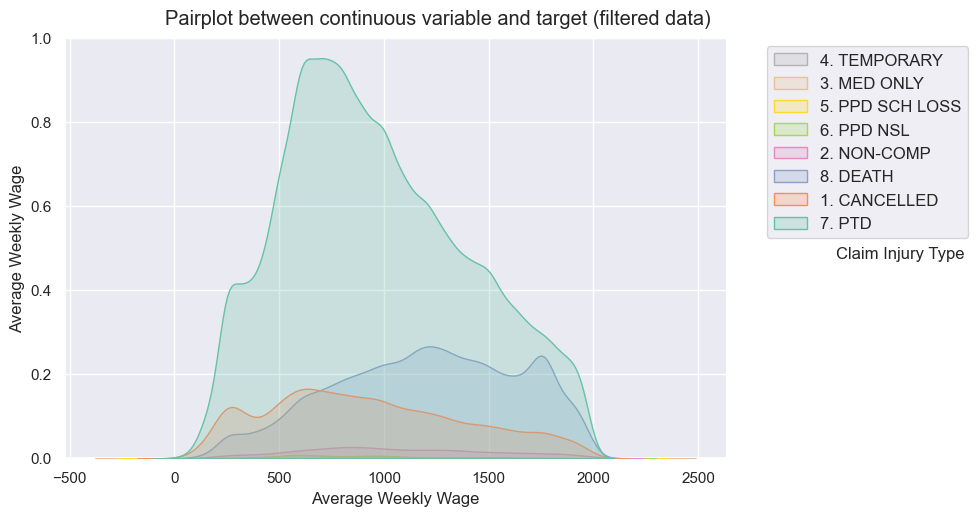

In [78]:
# Filtering the dataset to remove rows with 'Average Weekly Wage' equal to zero and extreme values
filtered_df = df[(df['Average Weekly Wage'] > 0) & (df['Average Weekly Wage'] < df['Average Weekly Wage'].quantile(0.95))]

# Set figure size and plot pairplot
g = sns.pairplot(filtered_df, vars=['Average Weekly Wage'], hue='Claim Injury Type', palette='Set2', height=5, aspect=1.5)

# Add a title to the pairplot
g.fig.suptitle("Pairplot between continuous variable and target (filtered data)", y=1.02)

# Manually add legend outside of plot
plt.legend(
    labels=filtered_df['Claim Injury Type'].unique(),
    bbox_to_anchor=(1.05, 1),
    loc='upper left',
    fontsize='medium'
)

plt.show()

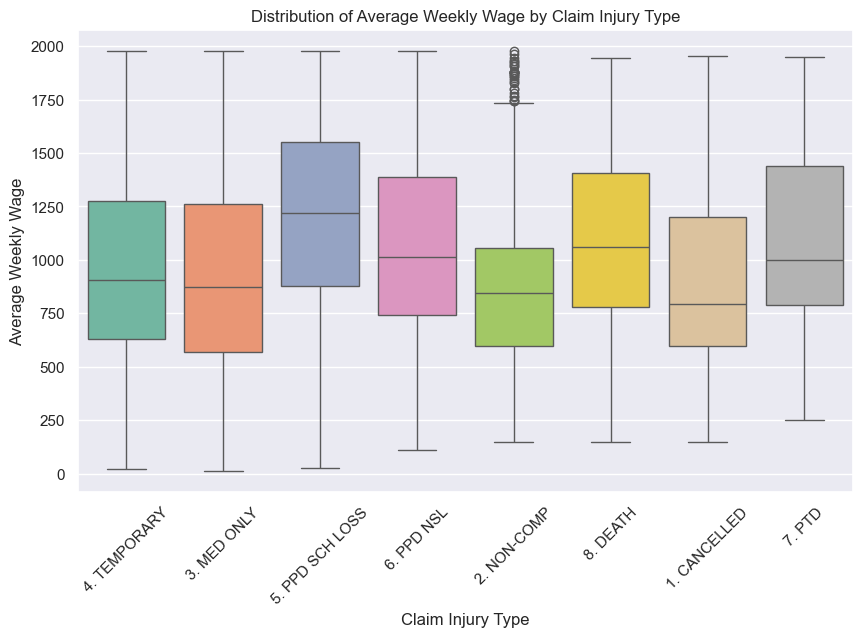

In [79]:
plt.figure(figsize=(10, 6))  # Increased figure size for better visibility
sns.boxplot(data=filtered_df, x='Claim Injury Type', y='Average Weekly Wage', palette='Set2')
plt.title(f'Distribution of Average Weekly Wage by Claim Injury Type')
plt.xlabel('Claim Injury Type')  # Adding labels for better clarity
plt.ylabel('Average Weekly Wage')
plt.xticks(rotation=45)
plt.show()

### **Categorical Variables** <br>

Now we will create plots for the categorical variables. Since some categorical features have a high number of unique values, we will limit our analysis to the top 10 most frequent values within each categorical feature, with the target variable as the hue for better visualization.

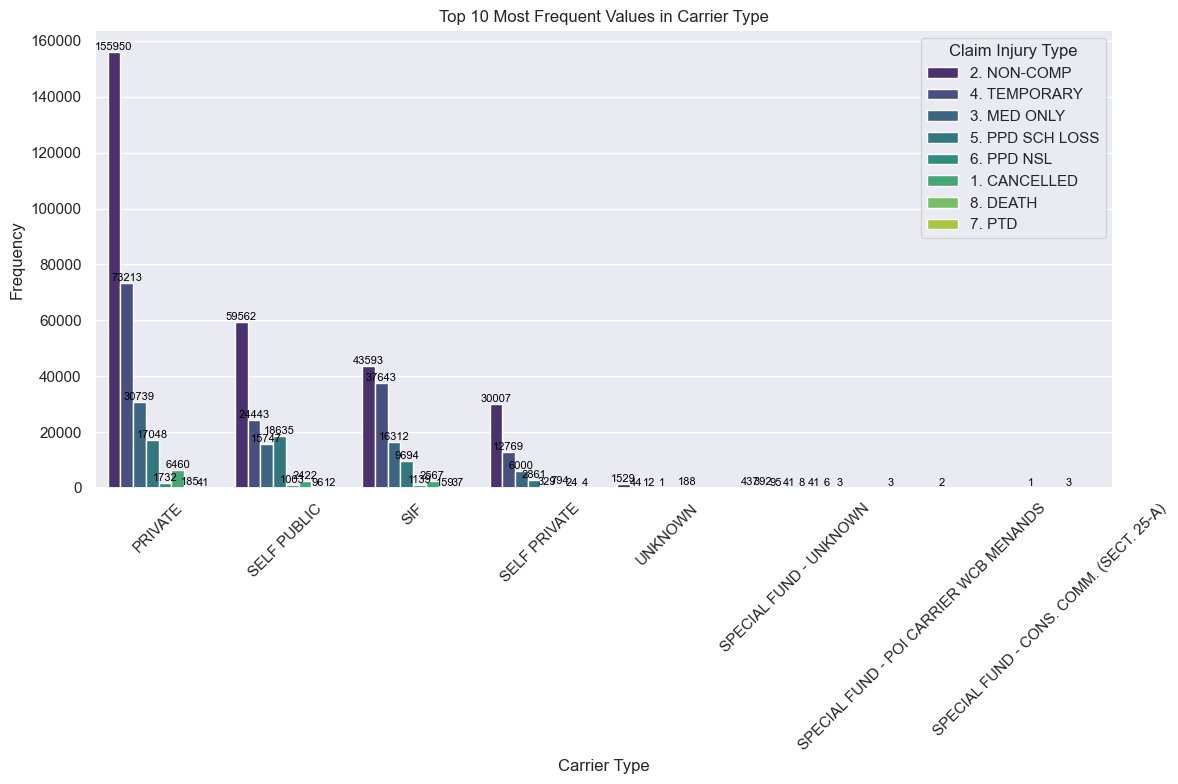

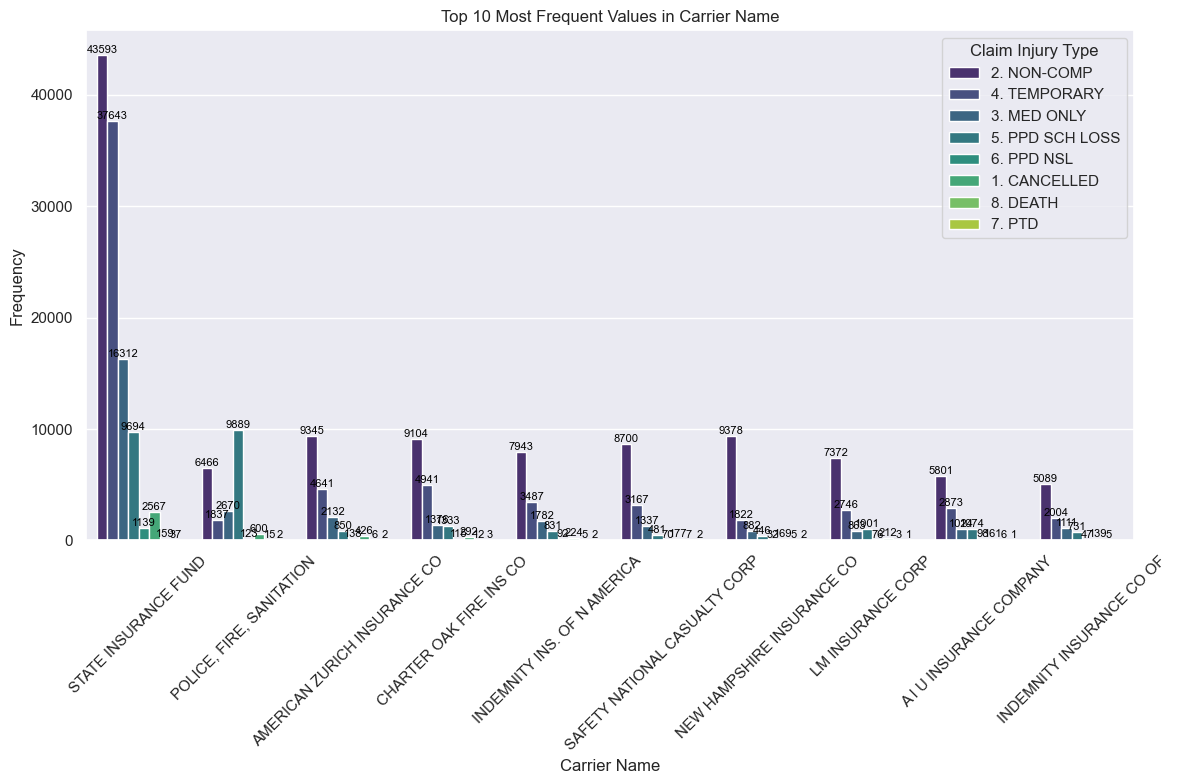

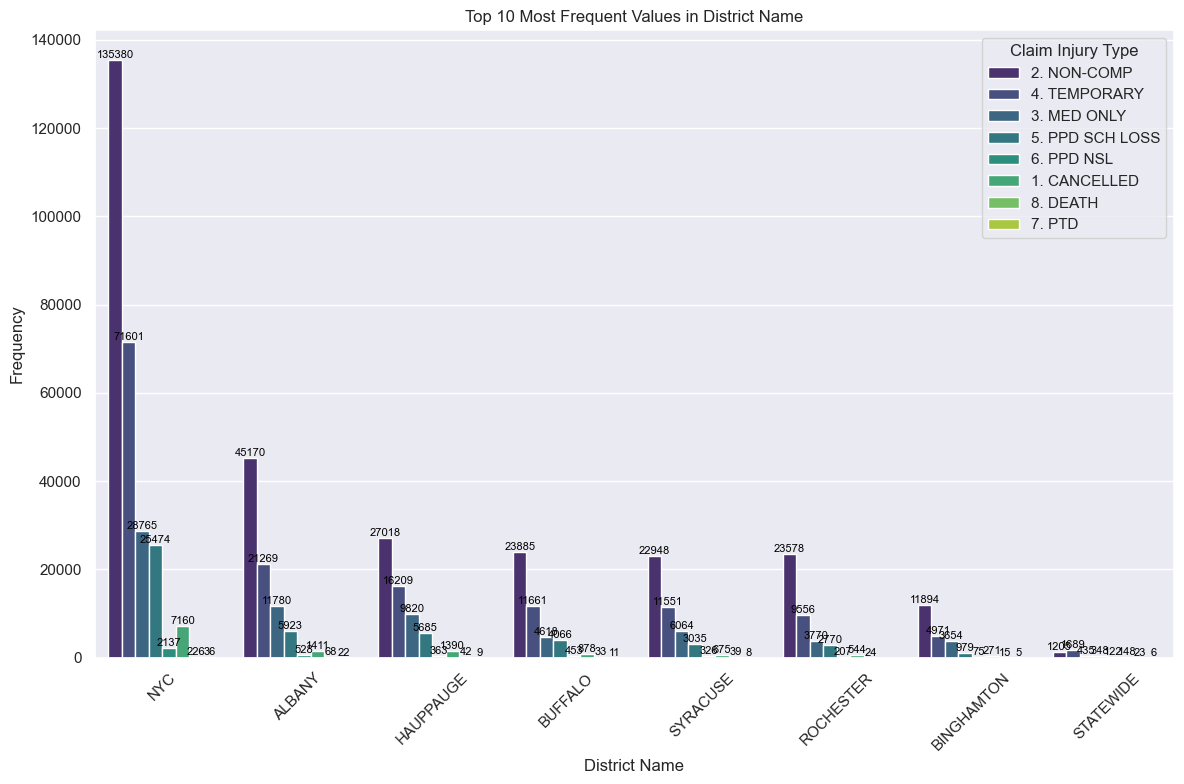

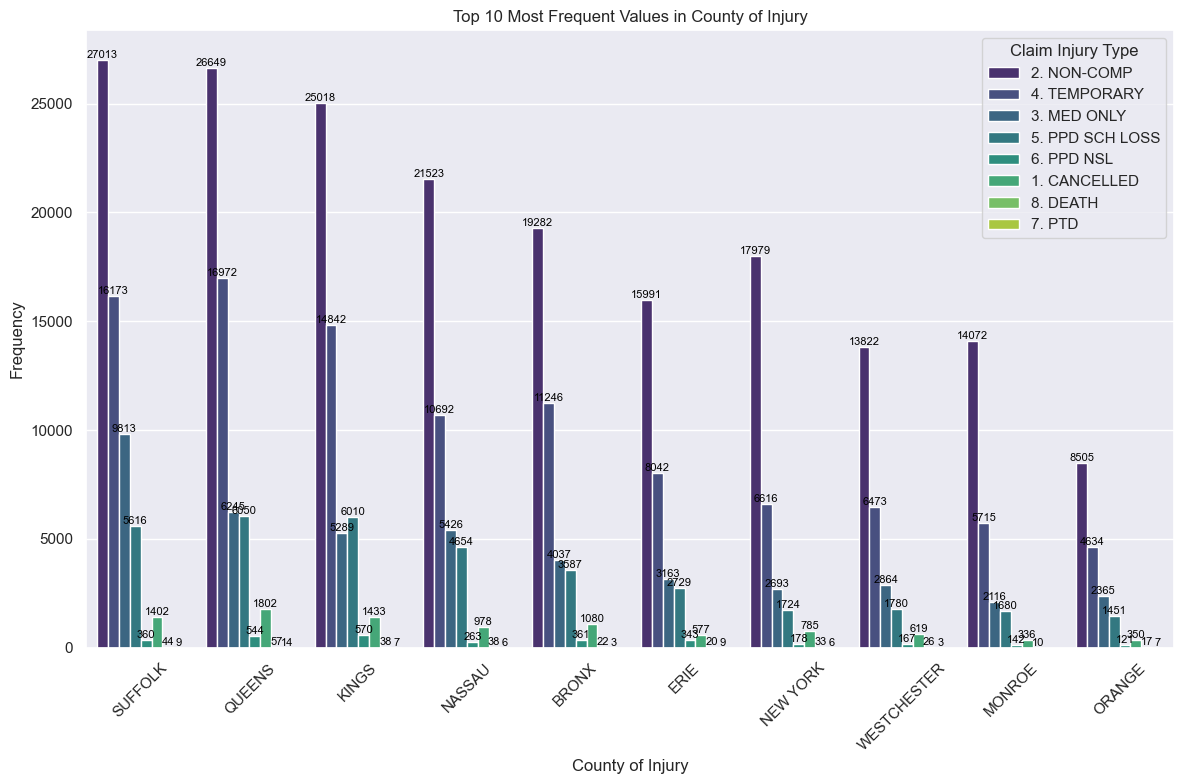

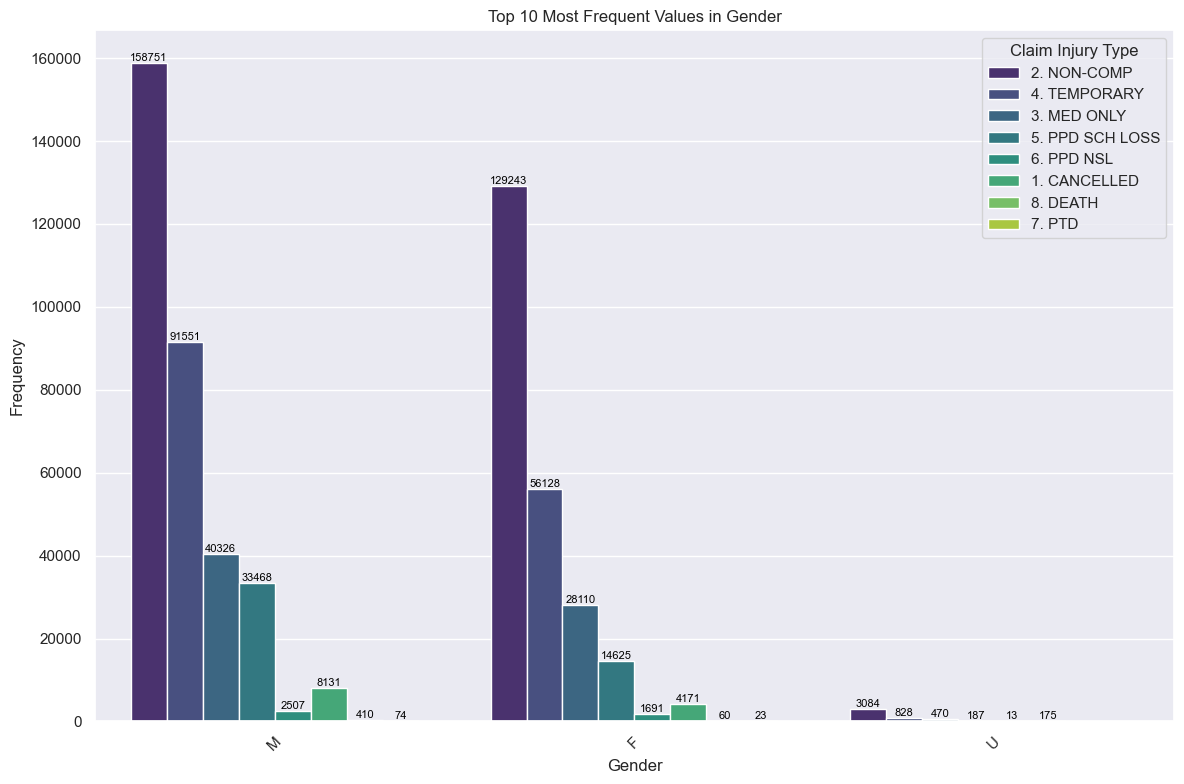

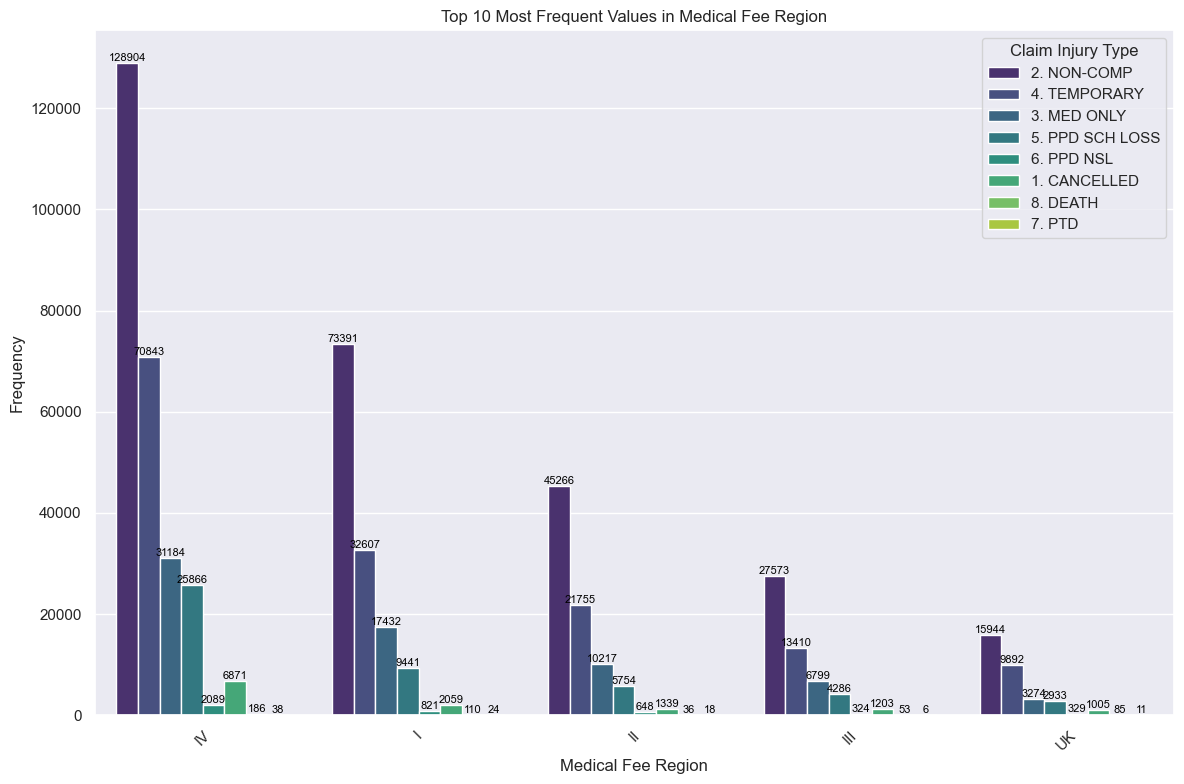

In [80]:
# Categorical Columns: Plotting Frequency Distributions with Target as Hue
categorical_columns = ['Carrier Type', 'Carrier Name', 'District Name', 'County of Injury', 'Gender', 'Medical Fee Region']

# Loop through categorical columns and create separate figures
for column in categorical_columns:
    plt.figure(figsize=(12, 8))
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df, x=column, hue='Claim Injury Type', palette='viridis', order=df[column].value_counts().iloc[:10].index)
    
    # Set title and labels
    plt.title(f'Top 10 Most Frequent Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

### Analysis of Categorical Variables

#### 1. Carrier Type

The "Carrier Type" chart shows the distribution of claims across different carrier types with "Claim Injury Type" as the hue, indicating the frequency of each injury type within each carrier type. 

Observations:
- **Private** carriers have the highest number of claims, with a significant number of "NON-COMP" (Non-compensable) injury claims. This is followed by "TEMPORARY" claims.
- **Self-Public** and **Self-Private** carriers have notable numbers of "NON-COMP" and "TEMPORARY" injury types but at a much lower frequency than private carriers.
- "UNKNOWN" carrier type has a small number of claims distributed across various injury types, indicating possible data quality issues or lack of information.
  
Conclusion:
The private sector appears to handle the majority of claims, particularly for non-compensable injury types. Other carrier types have fewer claims, possibly due to the smaller scale or specific operational areas.

#### 2. Carrier Name

The "Carrier Name" chart highlights the top 10 carriers by the number of claims with "Claim Injury Type" as the hue. 

Observations:
- **State Insurance Fund** is the leading carrier in terms of claim numbers, predominantly with "NON-COMP" and "TEMPORARY" injury claims.
- Other carriers, like **Police, Fire, Sanitation** and **American Zurich Insurance Co**, also have a high frequency of claims, but with varying distributions across injury types.
- There is a visible drop in claim numbers for carriers outside the top few, showing a long tail in the claim distribution.

Conclusion:
The State Insurance Fund handles a large volume of claims, potentially indicating its role as a major carrier in the region or its handling of a specific sector. Other carriers follow, but none reach the claim volume of the State Insurance Fund.


#### 3. District Name

The "District Name" chart shows the distribution of claims by district, with "Claim Injury Type" displayed as the hue. 

Observations:
- **NYC** (New York City) has the highest claim frequency by a significant margin, mostly for "NON-COMP" and "TEMPORARY" injury types.
- **Albany** and **Hauppauge** follow, with much lower numbers but a similar distribution pattern across injury types.
- Other districts like **Buffalo** and **Rochester** show diverse injury types but with a focus on "NON-COMP".

Conclusion:
NYC is a major hub for claims, possibly due to its population density or the concentration of industries. The distribution across other districts suggests that claim volumes vary greatly by region, with injury type distributions remaining relatively consistent.

#### 4. County of Injury

The "County of Injury" chart illustrates the top 10 counties by the number of claims, broken down by "Claim Injury Type".

Observations:
- **Suffolk** and **Queens** counties show the highest frequencies, particularly in "NON-COMP" and "TEMPORARY" injury types.
- The **Bronx** and **Kings** counties also report substantial claims, with similar injury type distributions to the leading counties.
- There is a steady decline in claim frequency as we move down the list of counties, with a more varied mix of injury types in counties with fewer claims.

Conclusion:
Certain counties like Suffolk and Queens lead in claim volumes, possibly due to larger populations or higher-risk industries. The injury type distribution remains largely similar across counties, highlighting regional patterns in claim types.

### 5. Gender

The "Gender" chart shows the distribution of claims by gender, with "Claim Injury Type" as the hue.

Observations:
- **Males (M)** have the highest number of claims, especially for "NON-COMP" and "TEMPORARY" injury types, followed by "MED ONLY".
- **Females (F)** also show significant claim numbers but at a notably lower volume than males, with a similar injury type distribution.
- Claims labeled with **U** (unspecified) gender are few but still show a diverse mix of injury types.

Conclusion:
Males have a significantly higher number of claims than females, which might suggest higher-risk roles or industries. Unspecified gender claims are minimal but should be considered for completeness.

### 6. Medical Fee Region

The "Medical Fee Region" chart illustrates the distribution of claims across different regions, with "Claim Injury Type" represented by the hue.

Observations:
- Regions **IV**, **I**, and **II** show the highest number of claims, with "NON-COMP" and "TEMPORARY" injury types being the most prevalent across these regions.
- The **UK** (United Kingdom) region also has a significant number of claims, which may indicate involvement in international cases or coverage for individuals/entities with connections to the UK.
- Region **III** has lower claim frequencies than IV, I, and II but still follows the same general pattern of injury types.
- The distribution across regions highlights that claims are concentrated in a few key areas, with a substantial number of cases likely linked to industry activities or regional policies in these zones.

Conclusion:
Regions IV, I, and II are central hubs for claims, potentially due to high industry density or specific regulatory policies that influence claim volumes. The presence of claims in the UK region indicates international aspects in the dataset, suggesting cross-border coverage or claims related to international entities.

### **Discrete Variables** <br>
Next, we will plot the discrete columns, focusing on the 15 most frequent values for each feature, with the target variable as the hue to enhance interpretability.

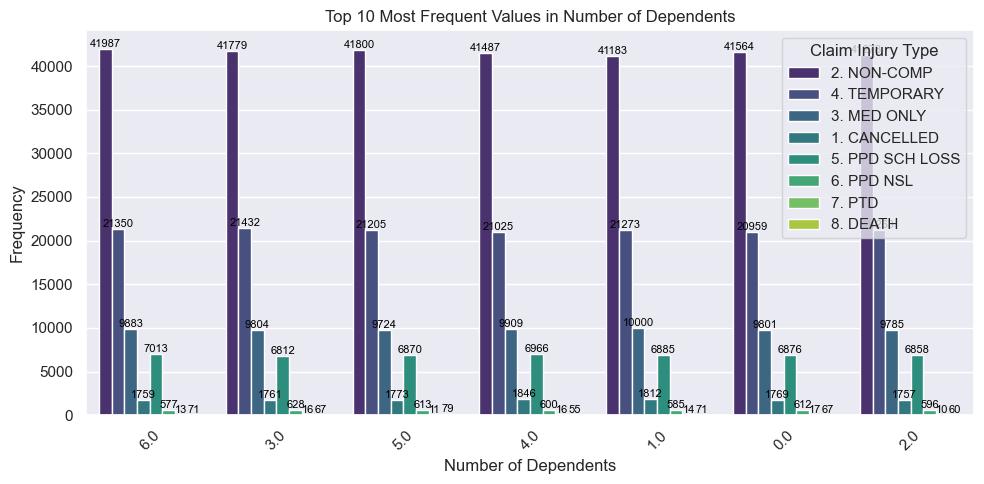

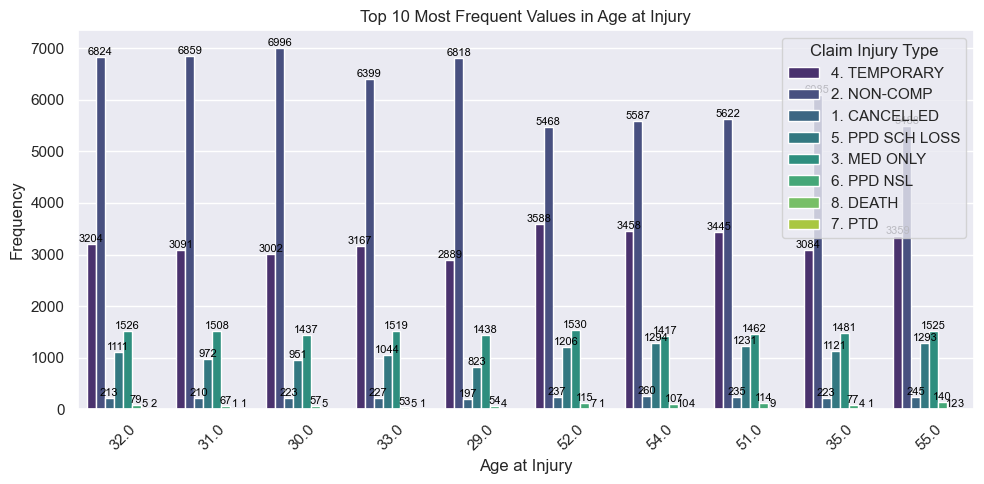

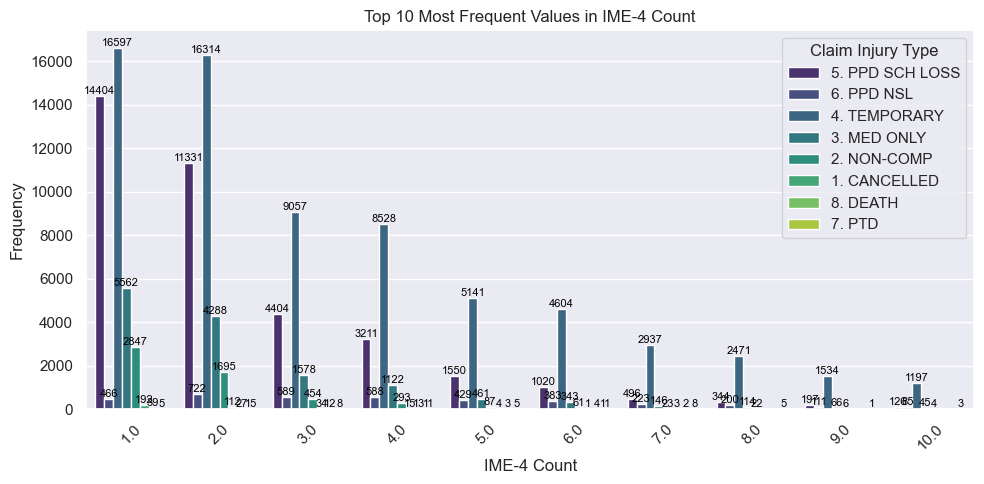

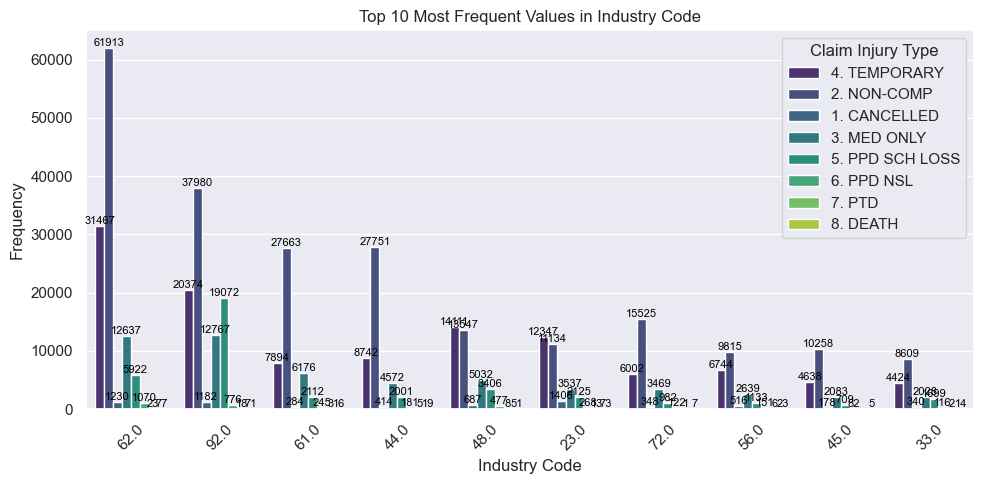

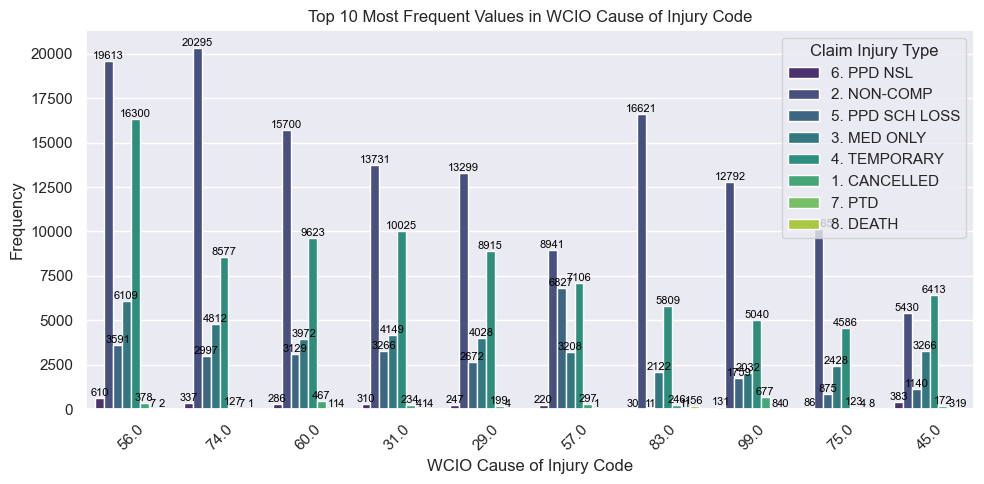

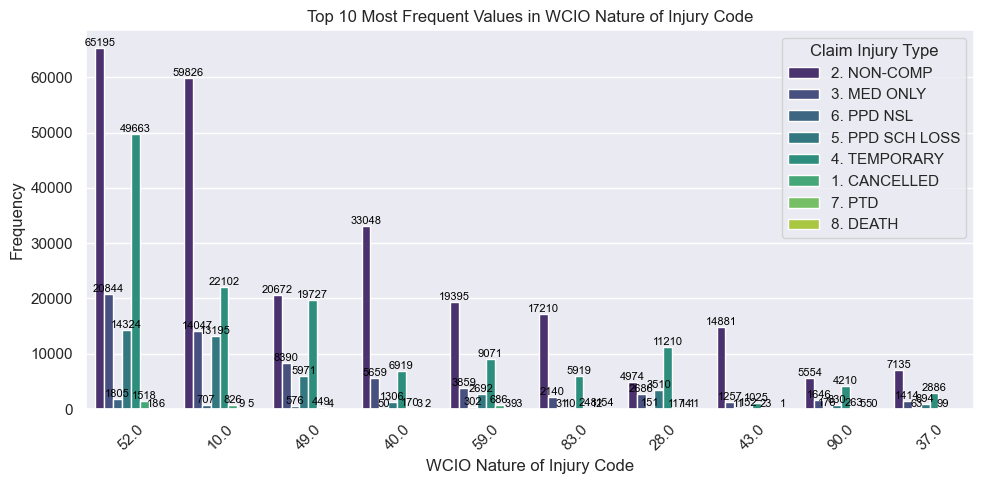

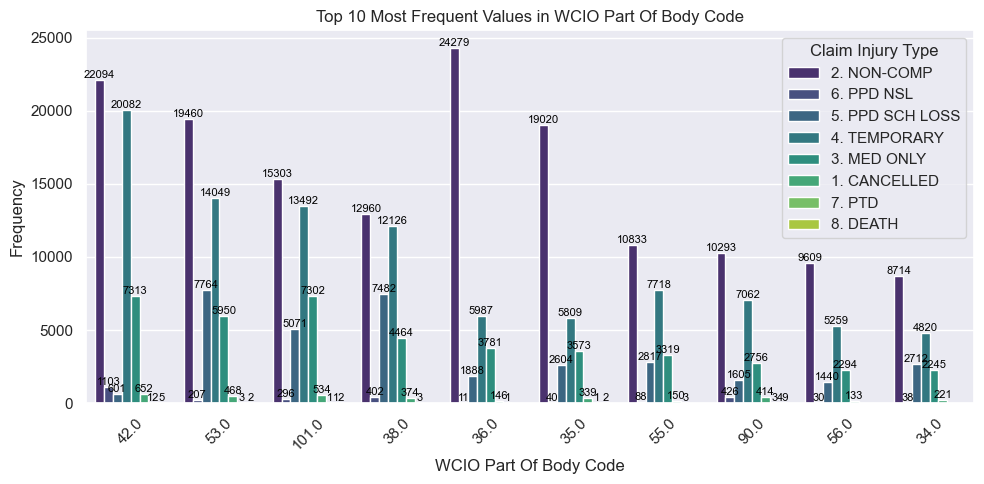

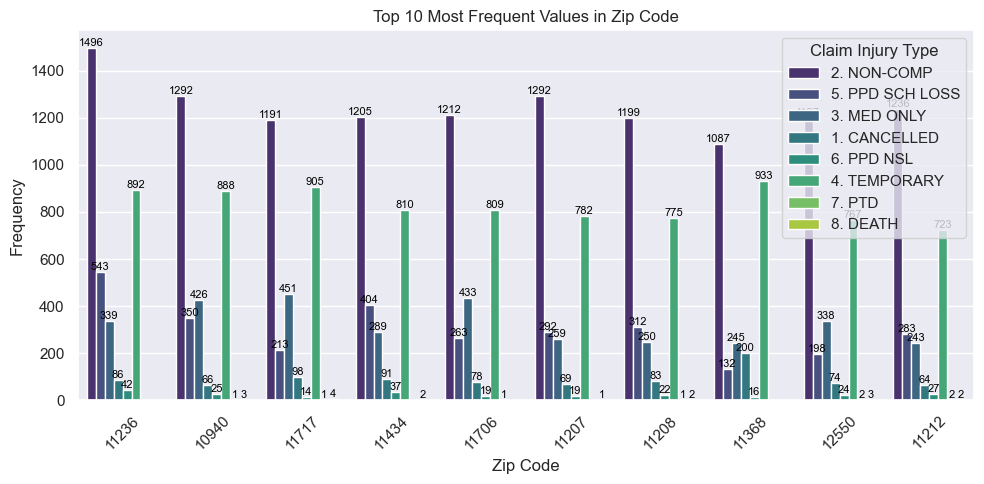

In [81]:
# Discrete Columns: Plotting Top 15 Most Frequent Values with Target as Hue
discrete_columns = ['Number of Dependents', 'Age at Injury', 'IME-4 Count', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code']

# Loop through discrete columns and create separate figures
for column in discrete_columns:
    plt.figure(figsize=(10, 5))
    
    # Select the top 10 most frequent values for the current column
    top_10_values = df[column].value_counts().nlargest(10).index
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df[df[column].isin(top_10_values)], x=column, hue='Claim Injury Type', palette='viridis', order=top_10_values)
    
    # Set title and labels
    plt.title(f'Top 10 Most Frequent Values in {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=45)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

### Analysis of Discrete Variables

#### 1. Number of Dependents
- **Insight**: The majority of records have `0`, `1`, or `2` dependents, with a significantly higher frequency in the `NON-COMP` claim injury type.
- **Distribution**: Higher counts of dependents are less common, with a steep drop after `3` dependents.
- **Claim Injury Type Distribution**: `NON-COMP` and `TEMPORARY` types are more common among records with `0` to `3` dependents, while other claim types appear relatively less frequently across all dependent numbers.

#### 2. Age at Injury
- **Insight**: Ages around `32`, `52`, and `35` have the highest frequency, suggesting certain age groups may be more prone to injury in this dataset.
- **Claim Injury Type Trends**: Similar to other variables, the `NON-COMP` claim type dominates across all age groups, especially in the 30s and 50s.
- **Observations**: This could indicate specific age ranges where the workforce may be more susceptible to injuries, possibly due to experience or physical demands related to the work.

#### 3. IME-4 Count
- **Insight**: The `IME-4 Count` values are highly concentrated around `1`, `2`, and `3`, showing a lower count as the value increases.
- **Claim Injury Type Distribution**: `TEMPORARY` and `PPD SCH LOSS` claim types are more common in cases with lower `IME-4 Count`, suggesting fewer medical evaluations for these injury types.
- **Trend**: Higher `IME-4 Count` values appear less frequently, indicating that the number of independent medical exams is limited for most claims.

#### 4. Industry Code
- **Insight**: Codes `62.0`, `92.0`, and `61.0` are the most frequent, which may correspond to specific industries more prone to injuries.
- **Claim Type Distribution**: `NON-COMP` claims are notably high across these industry codes, showing that certain industries may have different injury claim distributions.
- **Observation**: Industries corresponding to these codes might have higher injury risks, warranting further investigation or preventive measures.

#### 5. WCIO Cause of Injury Code
- **Insight**: Codes `56.0`, `74.0`, and `60.0` are the top causes of injuries, with varying distribution across claim types.
- **Claim Type Trends**: `MED ONLY` and `NON-COMP` types are more prevalent in these injury causes, possibly indicating the nature and severity associated with each code.
- **Observation**: Understanding which injury causes lead to `TEMPORARY` or `PPD` claims may help in assessing injury prevention efforts.

#### 6. WCIO Nature of Injury Code
- **Insight**: `52.0` and `10.0` codes dominate in injury nature, which may represent specific injury types (like sprains, fractures, etc.).
- **Claim Type Distribution**: Consistently, `NON-COMP` is prevalent across these injury codes, though other types like `TEMPORARY` also appear frequently.
- **Observation**: This variable provides insight into the types of injuries commonly associated with higher claim counts.

#### 7. WCIO Part of Body Code
- **Insight**: Parts `42.0` and `53.0` are the most affected, suggesting particular body parts are more prone to workplace injuries.
- **Claim Type Trends**: `TEMPORARY` claims are frequently associated with these body parts, possibly indicating less severe injuries that lead to temporary disability.
- **Observation**: This can guide ergonomic adjustments or protective equipment focus to reduce injuries in these body parts.

#### 8. Zip Code
- **Insight**: Certain ZIP codes (`11236`, `10940`, etc.) have notably higher injury frequencies, which may point to geographic regions with higher claims.
- **Claim Type Distribution**: Distribution across claim types varies, with `NON-COMP` frequently leading in many of these areas.
- **Observation**: Regional analysis of injury claims can be insightful for targeted interventions or support in high-claim ZIP codes.

### **Binary Variables** <br>


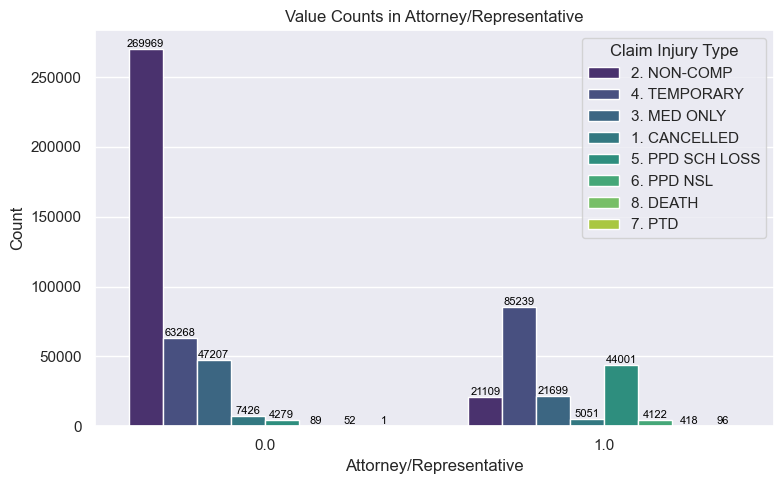

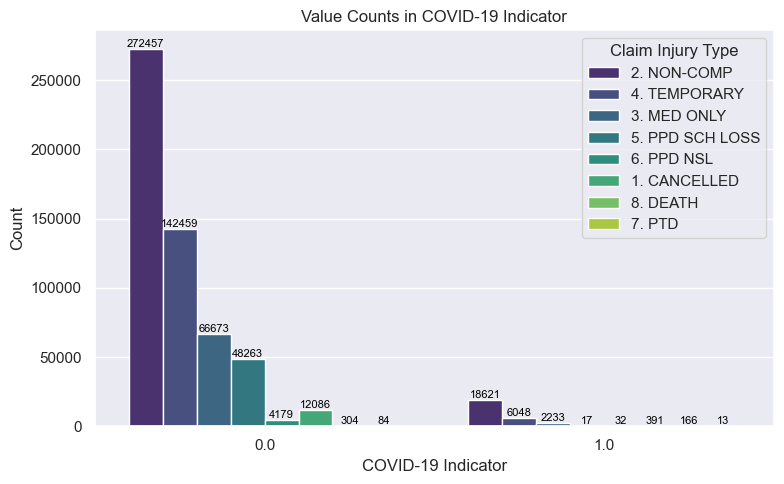

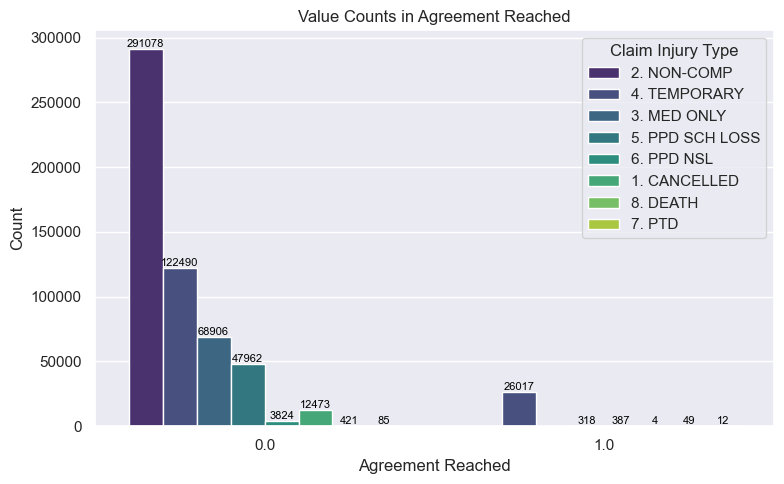

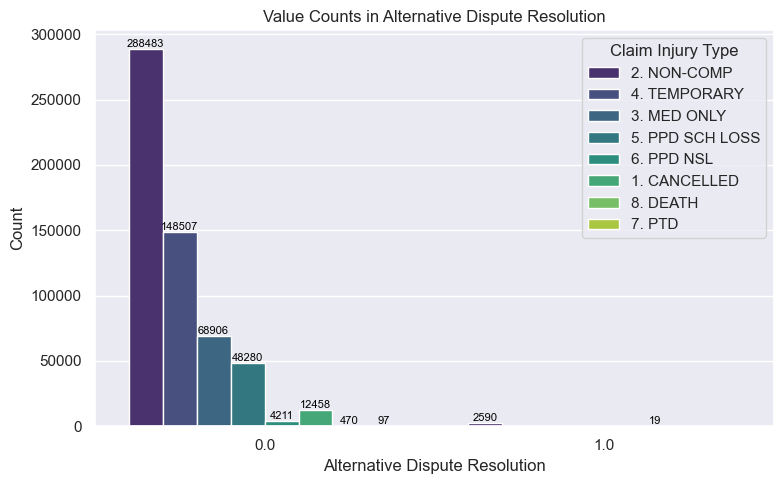

In [82]:
# Binary Columns: Plotting Counts of Values with Target as Hue
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator', 'Agreement Reached','Alternative Dispute Resolution']

# Loop through binary columns and create separate figures
for column in binary_columns:
    plt.figure(figsize=(8, 5))
    
    # Plot using seaborn to include hue (target column)
    ax = sns.countplot(data=df, x=column, hue='Claim Injury Type', palette='viridis')
    
    # Set title and labels
    plt.title(f'Value Counts in {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=0)
    
    # Add count labels above each bar
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            ax.annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2., height),
                        ha='center', va='bottom', fontsize=8, color='black')

    # Show the plot
    plt.tight_layout()
    plt.show()

### Analysis of Binary Variables

#### Attorney/Representative

- This chart displays the count of cases based on whether they had an Attorney or Representative involved (`1`) or not (`0`).
- Cases without an attorney or representative are the majority, especially for the `NON-COMP` and `TEMPORARY` injury types.
- The presence of an attorney or representative is more common among cases with `TEMPORARY` and `MED ONLY` injury types but significantly lower in number than cases without representation across all injury types.

#### COVID-19 Indicator

- This plot shows the distribution of cases based on whether they were associated with COVID-19 (`1`) or not (`0`).
- Cases not related to COVID-19 dominate across all injury types, with a significant majority in `NON-COMP` and `TEMPORARY` injury types.
- COVID-19-related cases are present but in much smaller numbers, primarily impacting `NON-COMP` and `TEMPORARY` injury types.

#### Agreement Reached

- This chart illustrates whether an agreement was reached (`1`) or not (`0`) in claims across different injury types.
- The majority of cases did not reach an agreement, with a high count in the `NON-COMP`, `TEMPORARY`, and `MED ONLY` categories.
- Cases where an agreement was reached are relatively fewer but still show some presence, mainly in `TEMPORARY` and `MED ONLY` injury types.

#### Alternative Dispute Resolution

- This plot represents the use of alternative dispute resolution (ADR) in claims, indicating `1` if used and `0` otherwise.
- ADR was not utilized in the majority of cases, with high counts for `NON-COMP` and `TEMPORARY` injury types.
- For cases where ADR was employed, it is relatively more common in `TEMPORARY` and `MED ONLY` injury types, although the numbers are still low compared to cases without ADR.

### 3.3.2. Multivariate Analyses <a class="anchor" id="sub_section_3_3_2"></a>
In this section, we will conduct multivariate analyses with two primary objectives:
- Understanding the correlation between different variables.
- Examining the relationship between the features and the target variable (Claim Injury Type).

In the following code, we will explore binary and categorical variables by visualizing how binary features impact different categorical variables.

Binary Variable: Alternative Dispute Resolution


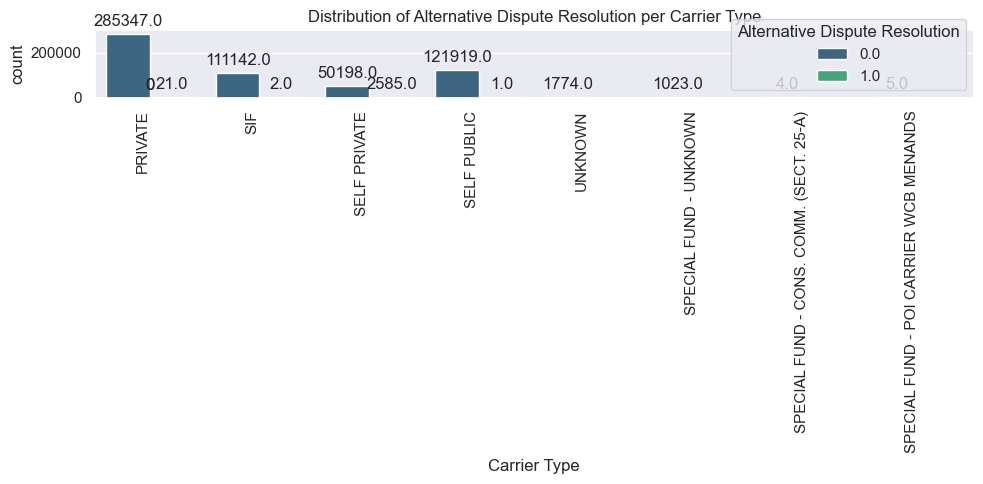

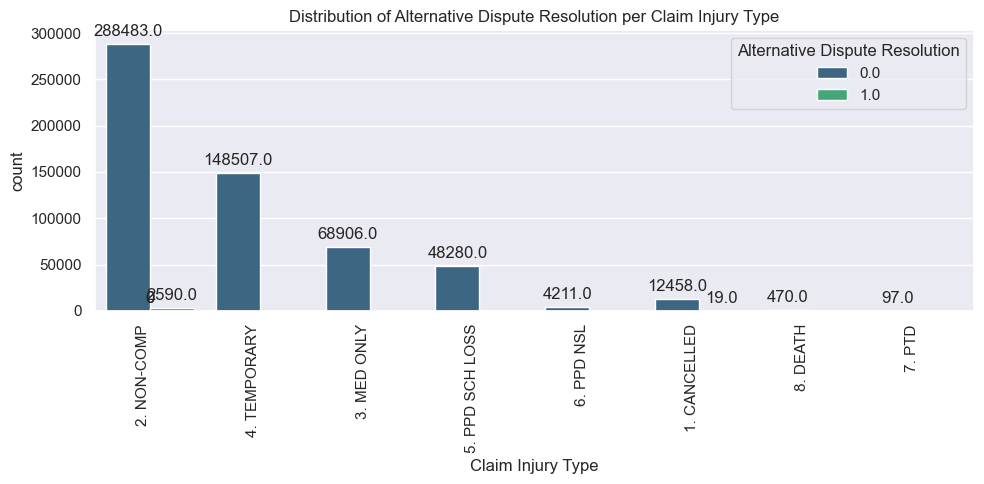

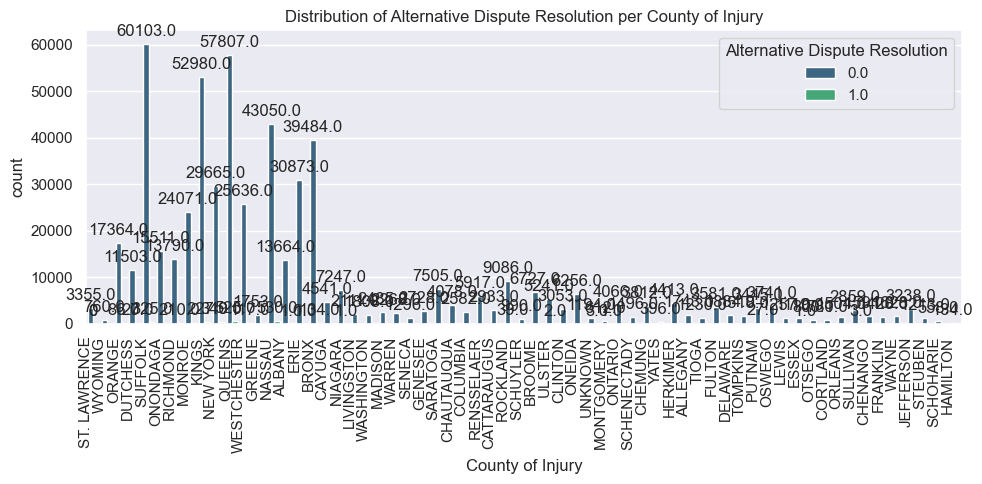

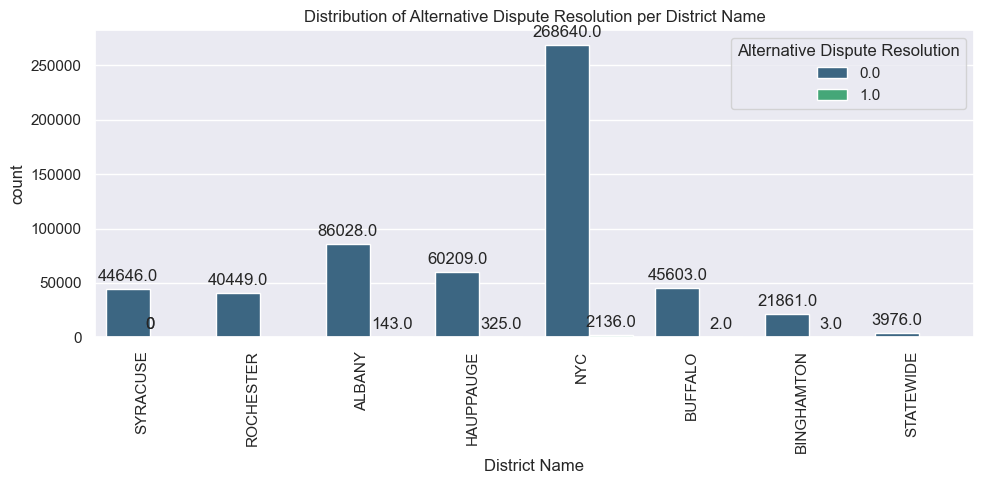

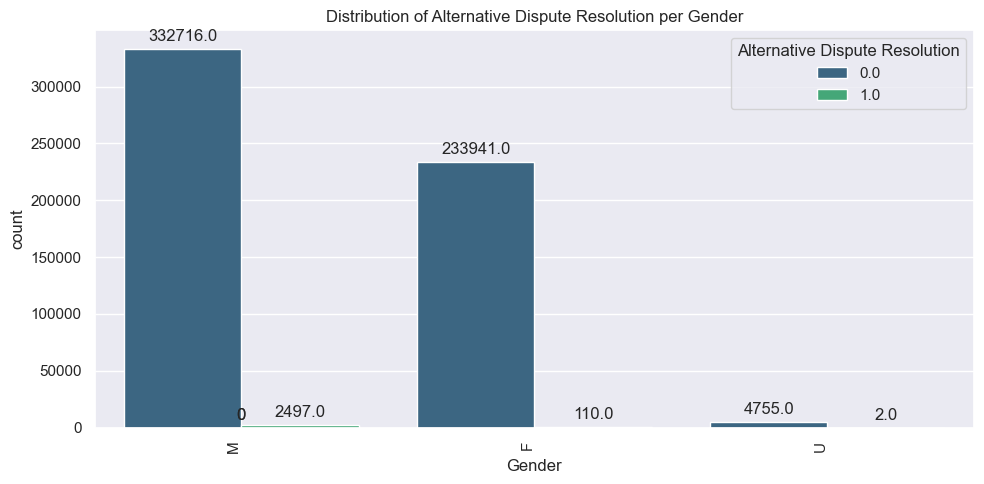

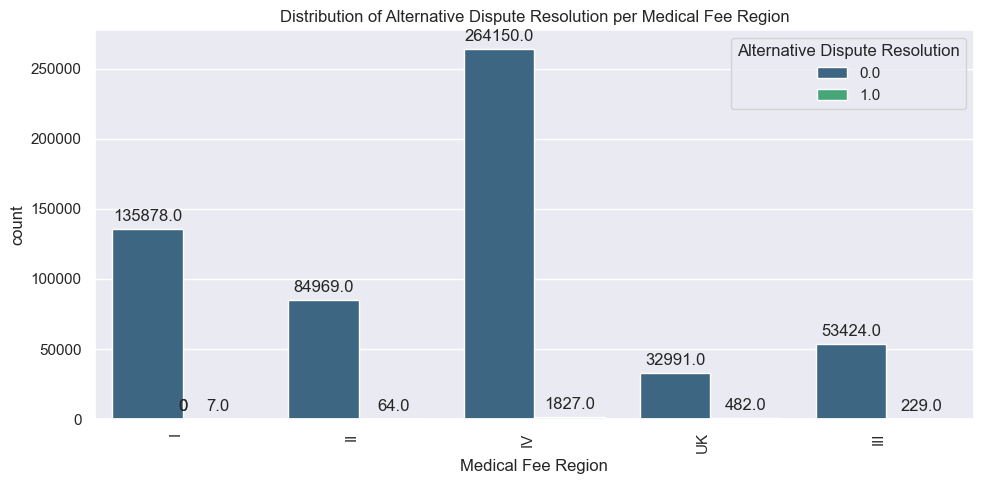

Binary Variable: Attorney/Representative


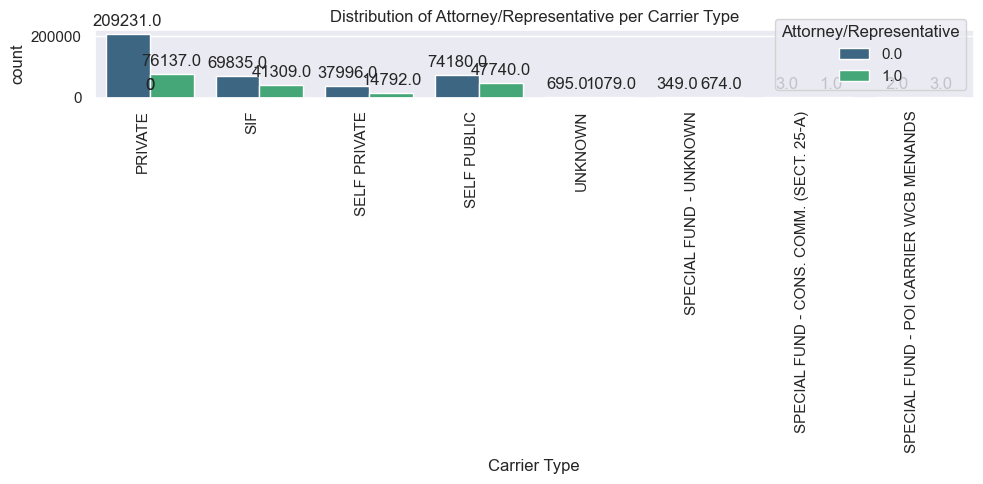

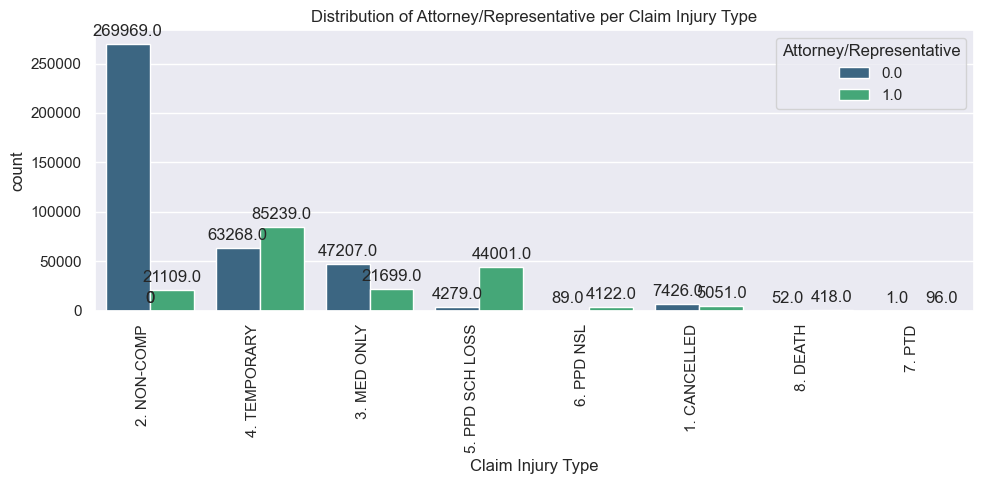

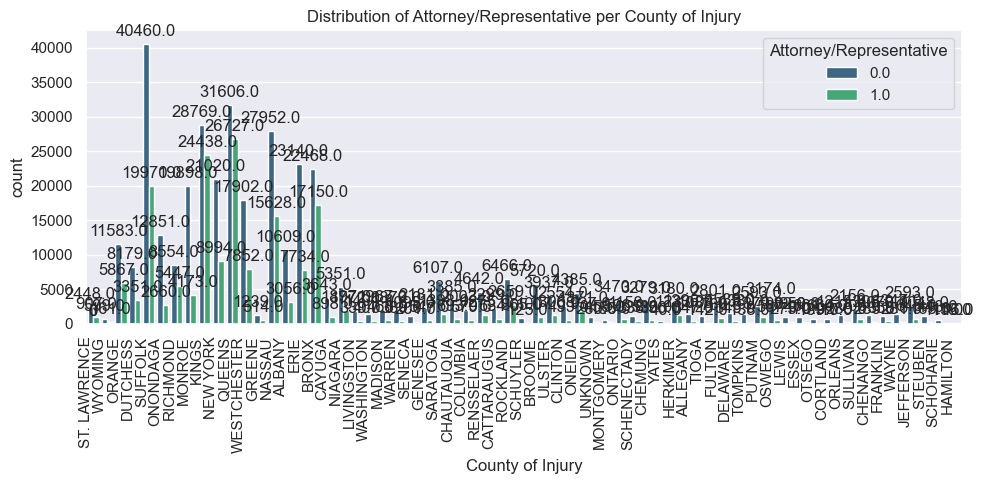

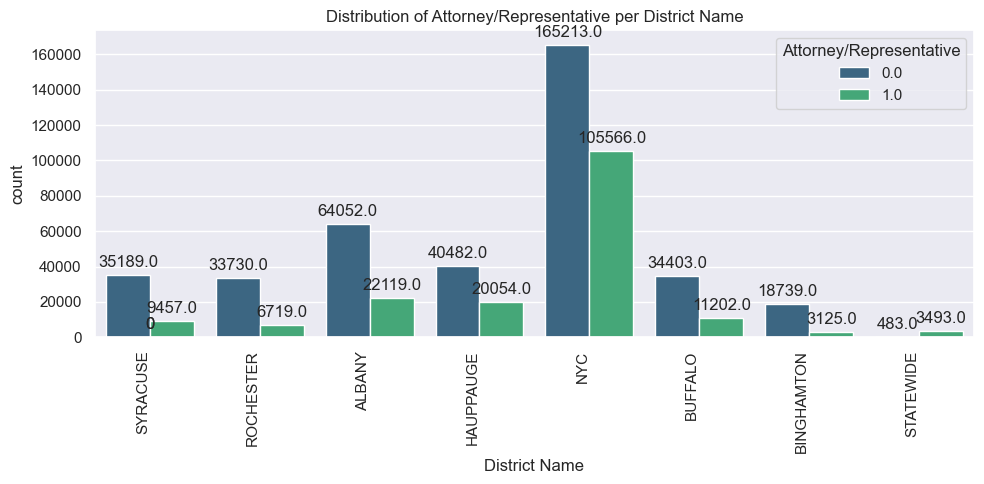

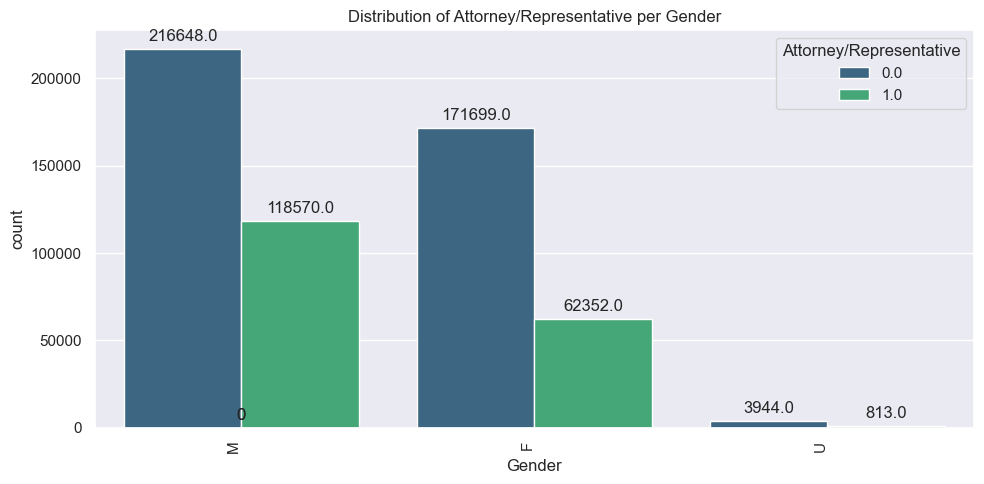

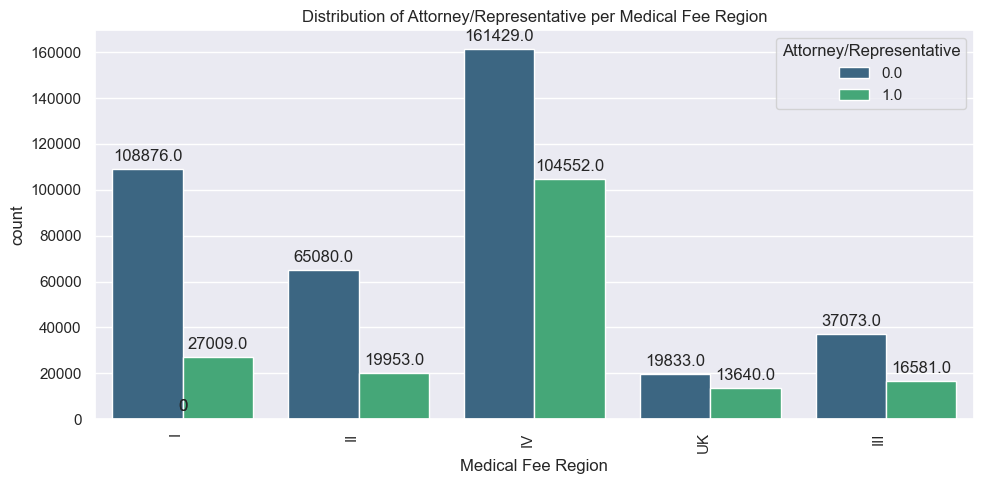

Binary Variable: COVID-19 Indicator


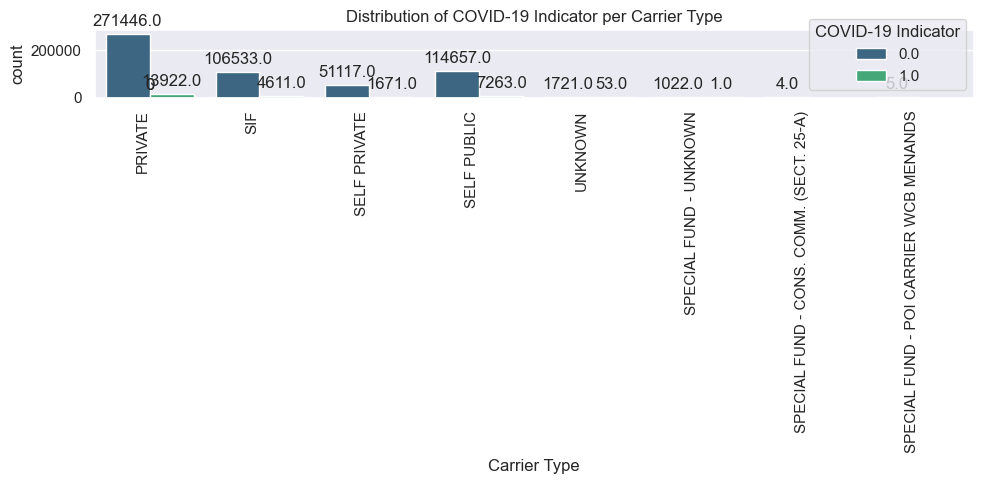

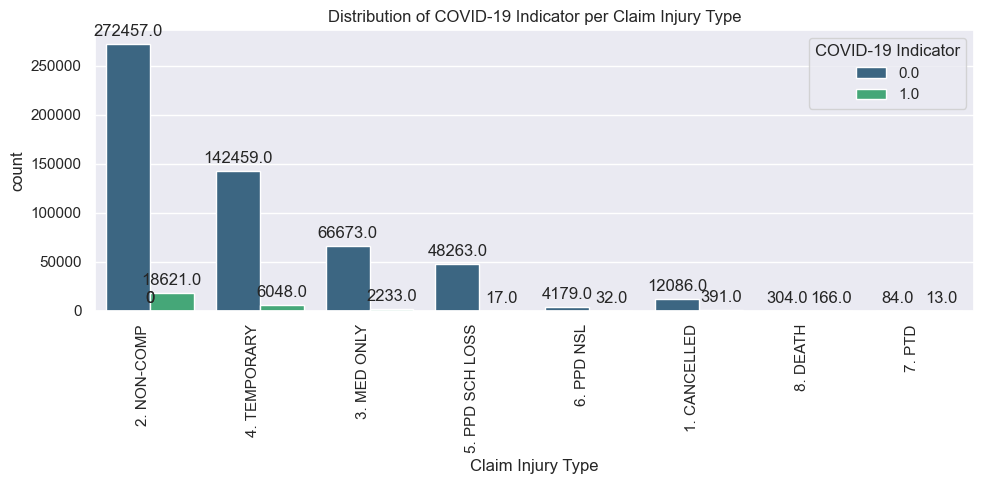

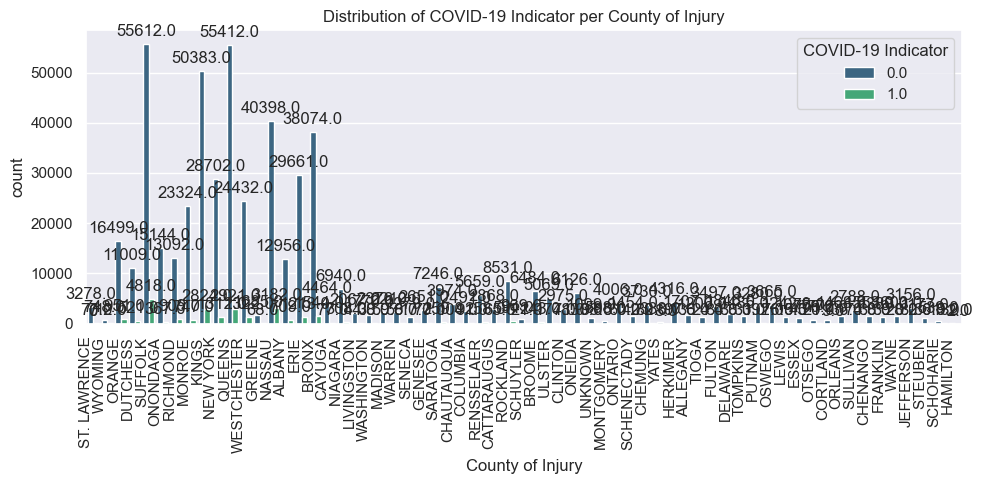

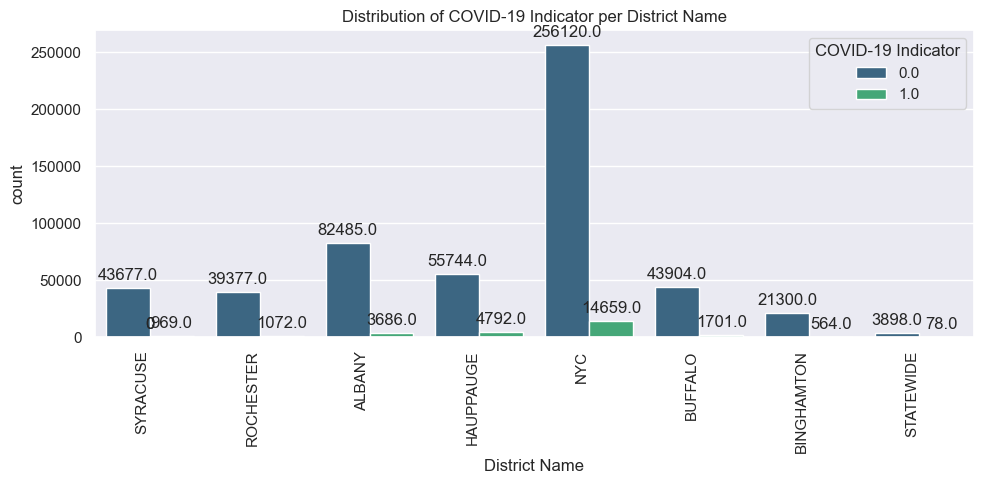

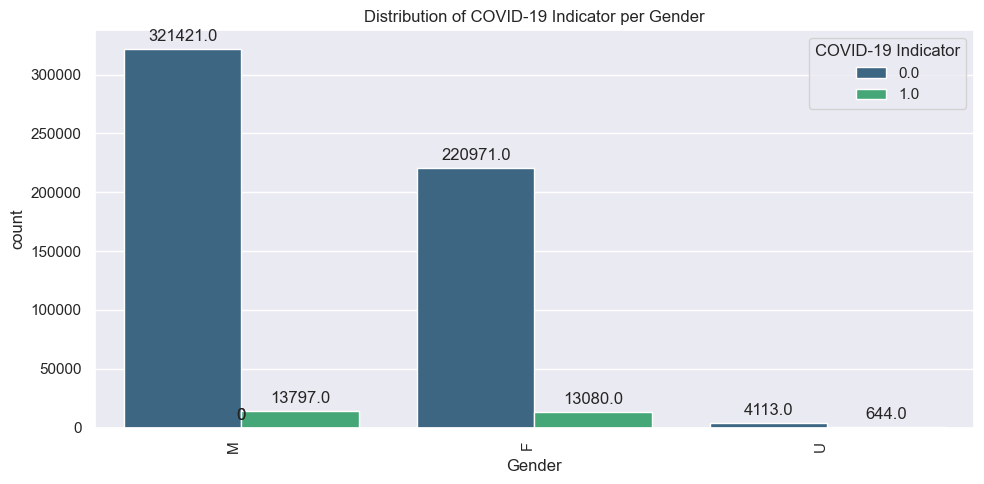

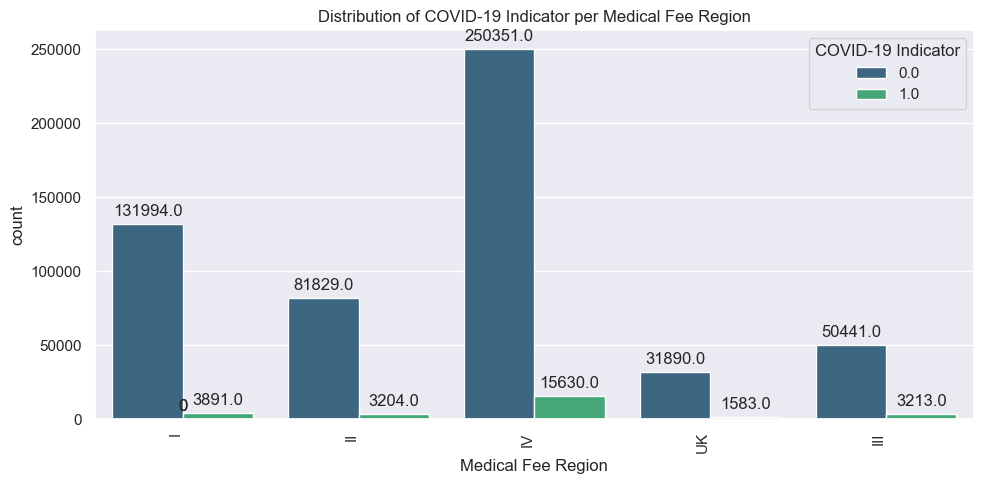

Binary Variable: Agreement Reached


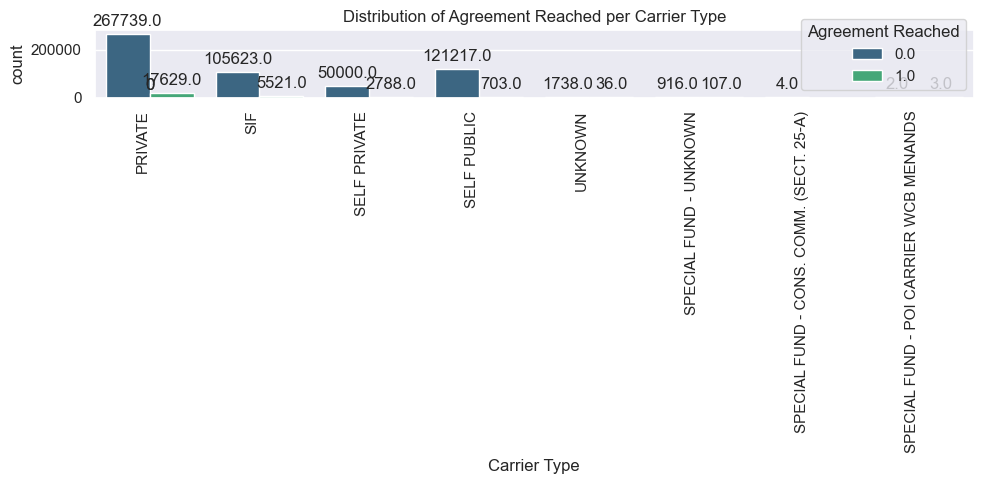

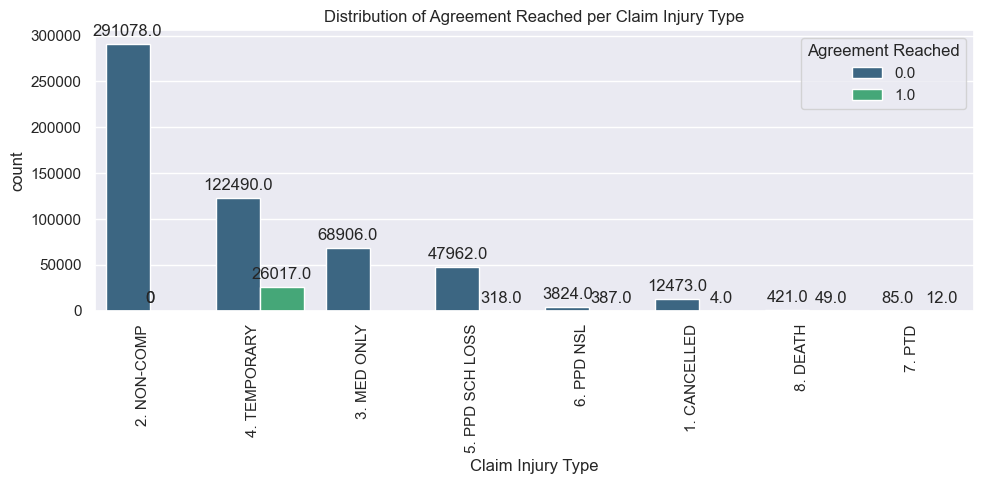

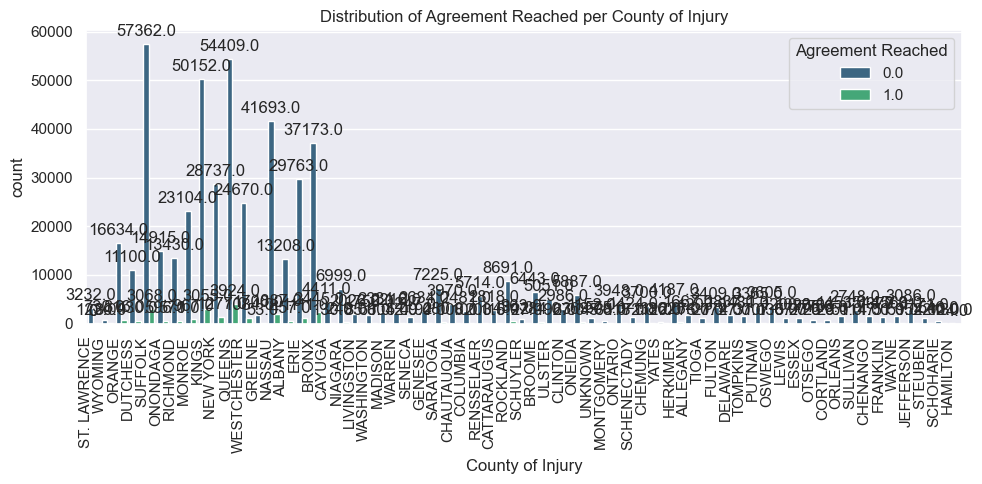

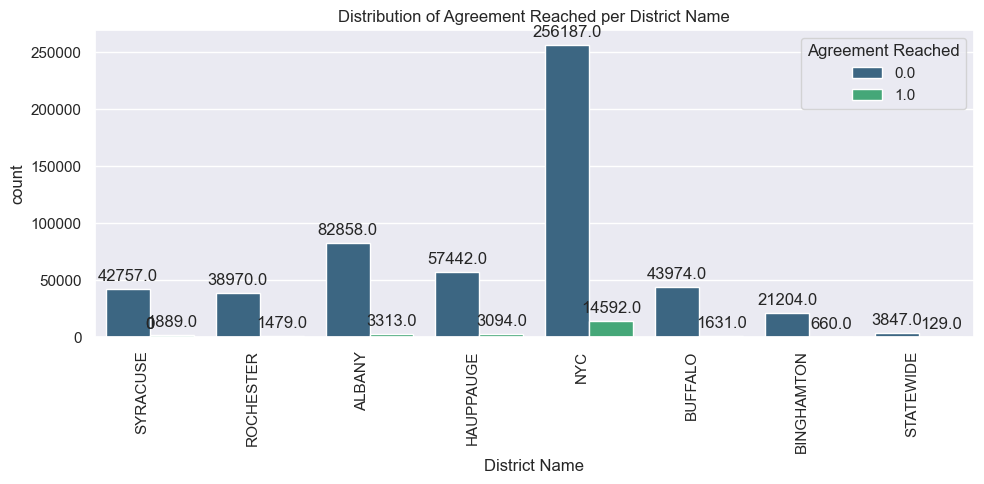

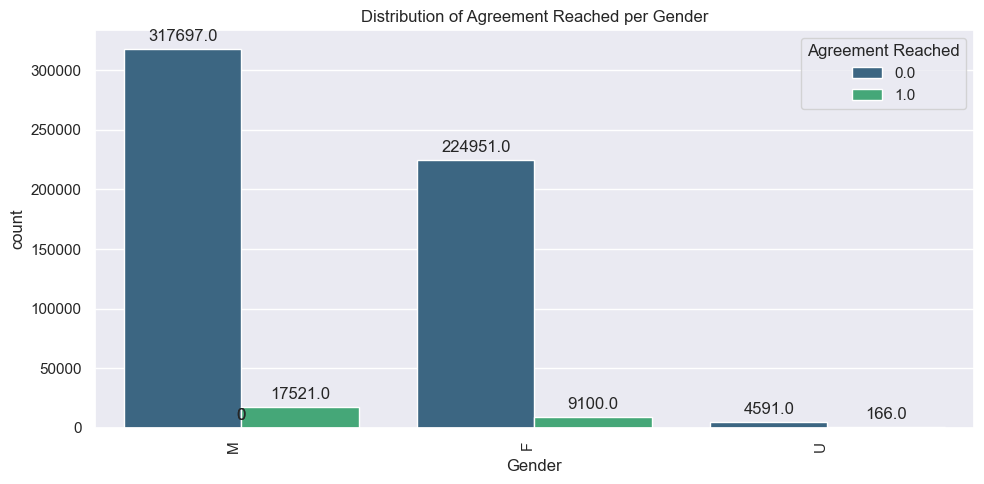

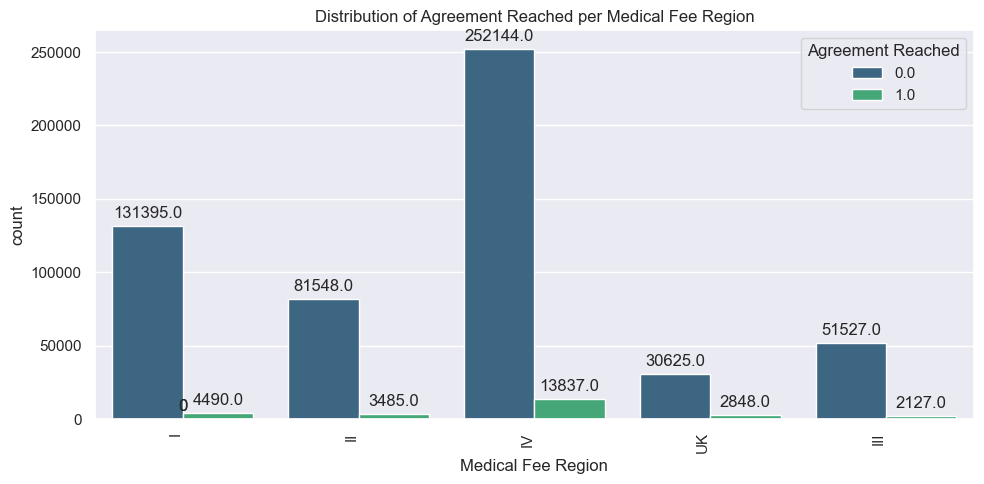

In [83]:
def plot_count_for_binary_and_categorical(data, binary_vars, categorical_vars):
    for binary_var in binary_vars:
        print(f"Binary Variable: {binary_var}")
        for cat_var in categorical_vars:
            plt.figure(figsize=(10, 5))
            ax = sns.countplot(data=data, x=cat_var, hue=binary_var, palette='viridis')
            plt.title(f'Distribution of {binary_var} per {cat_var}')
            plt.xticks(rotation=90, ha='right')  
            
            # Add counts above bars
            for p in ax.patches:
                ax.annotate(f'{p.get_height()}', 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', va = 'center', 
                            xytext = (0, 9), 
                            textcoords = 'offset points')
                
            plt.tight_layout() 
            plt.show()

# Filtering binary and categorical variables from your dataframe
binary_vars = [col for col in df.columns if df[col].nunique() == 2]  # Binary variables

# Define the columns to exclude
exclude_columns = ['Zip Code', 'Carrier Name']

# Get categorical variables excluding the specified columns
categorical_vars = [col for col in df.columns if df[col].dtype == 'object' and col not in exclude_columns]

# Generate count plots for binary and categorical variables
plot_count_for_binary_and_categorical(df, binary_vars, categorical_vars)

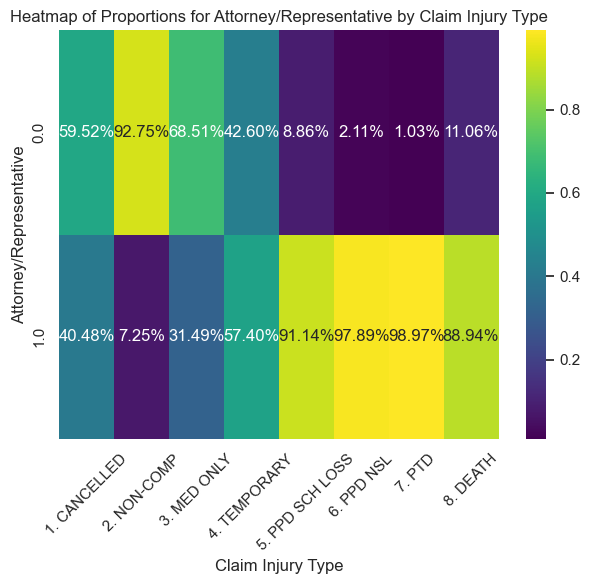

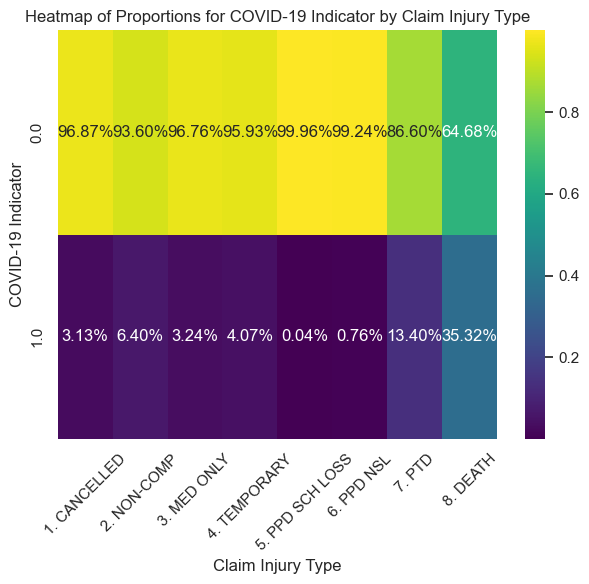

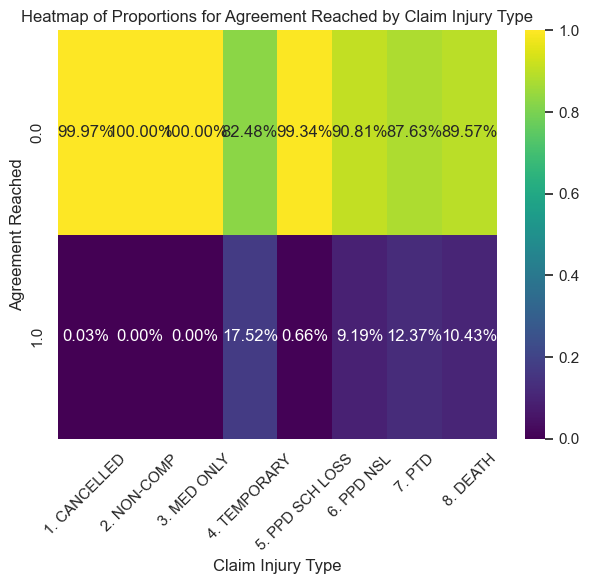

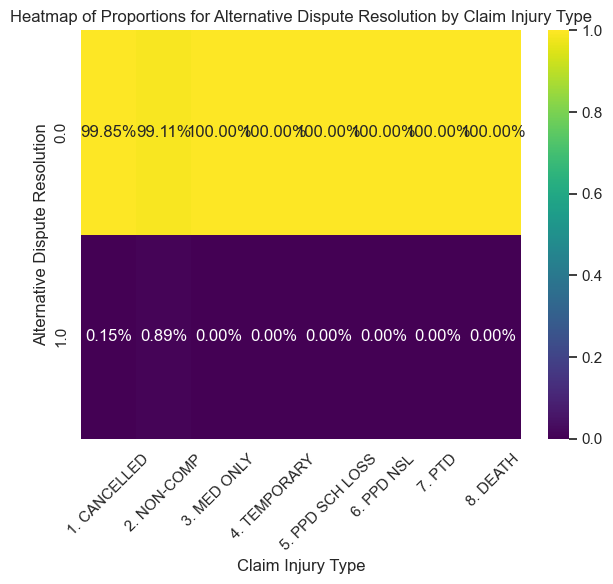

In [84]:
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator', 'Agreement Reached', 'Alternative Dispute Resolution']

# Loop through binary columns and create a heatmap for each
for column in binary_columns:
    plt.figure(figsize=(12, 6))
    
    # Create a pivot table counting the occurrences of each combination
    count_data = df.groupby([column, 'Claim Injury Type']).size().unstack(fill_value=0)
    
    # Calculate proportions
    proportions = count_data.div(count_data.sum(axis=0), axis=1)
    
    # Plot heatmap of proportions
    ax2 = plt.subplot(1, 2, 2)
    sns.heatmap(proportions, annot=True, fmt=".2%", cmap="viridis", cbar=True, ax=ax2)
    ax2.set_title(f'Heatmap of Proportions for {column} by Claim Injury Type')
    ax2.set_xlabel('Claim Injury Type')
    ax2.set_ylabel(column)
    ax2.tick_params(axis='x', rotation=45)
    
    plt.tight_layout()
    plt.show()

From the plots above, we observe that when the binary variable 'Alternative Dispute Resolution' is analyzed against categorical variables, it rarely has a value of 1, and is predominantly 0. This suggests that 'Alternative Dispute Resolution' has minimal or no impact on other variables. Therefore, we have decided to remove this variable from further analysis.

In [85]:
#Delete Alternative Dispute Resolution
df = df.drop(['Alternative Dispute Resolution'], axis=1)

#Apply to the test set
df_test = df_test.drop(['Alternative Dispute Resolution'], axis=1)

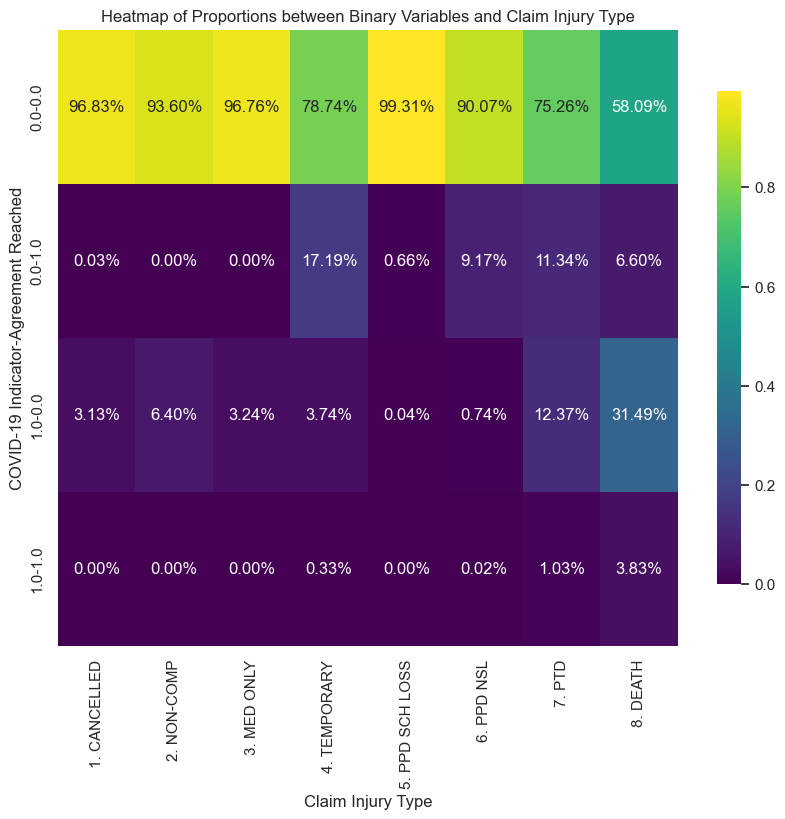

In [86]:
# Calculate the contingency table
contingency_table = pd.crosstab([df['COVID-19 Indicator'], df['Agreement Reached']], df['Claim Injury Type'])

# Calculate proportions
proportions = contingency_table.div(contingency_table.sum(axis=0), axis=1)

# Plot the heatmap of proportions
plt.figure(figsize=(10, 8))
sns.heatmap(proportions, annot=True, cmap="viridis", fmt=".2%", cbar_kws={"shrink": .8})
plt.title("Heatmap of Proportions between Binary Variables and Claim Injury Type")
plt.show()

This heatmap highlights the proportions of different claim injury types for each binary variable.

Notable findings include:

- High Proportions in No COVID-19 Cases: The "0.0-0.0" category, representing cases with no COVID-19 association and no agreement reached, shows high proportions across most claim injury types, suggesting a strong pattern in non-COVID-19 related claims.

- Specific Injury Types and Agreement Reached: Categories like "1.0-0.0" (COVID-19 associated, no agreement) show significant proportions for serious claim types such as PTD and DEATH. This indicates that COVID-19 related claims with no agreement reached are more likely to result in severe outcomes.

These observations suggest potential areas for focused interventions and adjustments in handling claims based on COVID-19 association and agreement status.

In [87]:
binary_columns = ['Attorney/Representative', 'COVID-19 Indicator', 'Agreement Reached']

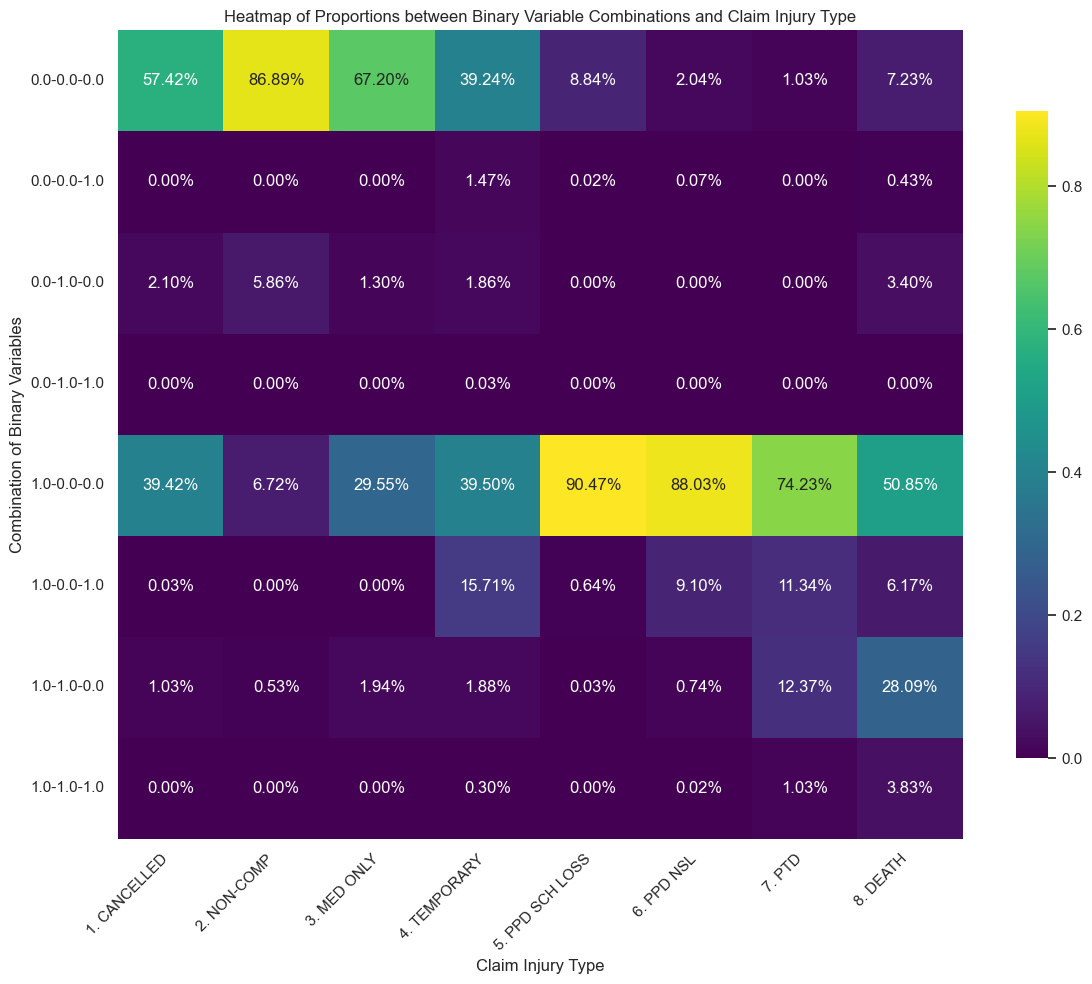

In [88]:
# Combine binary variables into a single column
df['Binary Combination'] = df[binary_columns].astype(str).agg('-'.join, axis=1)

# Calculate the contingency table
contingency_table = pd.crosstab(df['Binary Combination'], df['Claim Injury Type'])

# Calculate proportions
proportions = contingency_table.div(contingency_table.sum(axis=0), axis=1)

# Plot the heatmap of proportions
plt.figure(figsize=(12, 10))
sns.heatmap(proportions, annot=True, cmap="viridis", fmt=".2%", cbar_kws={"shrink": .8})
plt.title("Heatmap of Proportions between Binary Variable Combinations and Claim Injury Type")
plt.xlabel("Claim Injury Type")
plt.ylabel("Combination of Binary Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

| Columns \ Binary Values | Attorney/ Representative | COVID-19 Indicator | Agreement Reached |
|-------------------------|--------------------------|--------------------|-------------------|
| 0                       | No                       | Not associated     | Needed WCB        | 
| 1                       | Yes                      | Associated         | Didn't need WCB   | 


1. Impact of COVID-19 Indicator:

The 1.0-0.0 combination (claims with an Attorney/Representative but no COVID-19 association) shows significantly high proportions for serious claim types such as PPD NSL (90.47%) and PPD SCH LOSS (88.03%). This suggests a strong pattern in non-COVID-19 related claims with attorney involvement.

2. Agreement Reached:

The 0.0-0.0-1.0 combination (claims without an Attorney/Representative, not associated with COVID-19, but with an agreement reached) generally shows very low proportions across all claim injury types. This indicates that agreements are less common in claims without attorney involvement.

3. Attorney/Representative:

Claims involving an Attorney/Representative (1.0) have higher proportions in serious claim types such as PPD NSL, PPD SCH LOSS, and PTD. This highlights the critical role of attorney involvement in more severe or complex claims.

By focusing on the binary variables Attorney/Representative, COVID-19 Indicator, and Agreement Reached, the heatmap helps identify key patterns and relationships that can inform better decision-making and targeted interventions. This streamlined approach provides a clearer and more focused view of the data.

In [89]:
#Delete Binary Combination
df = df.drop(['Binary Combination'], axis=1)

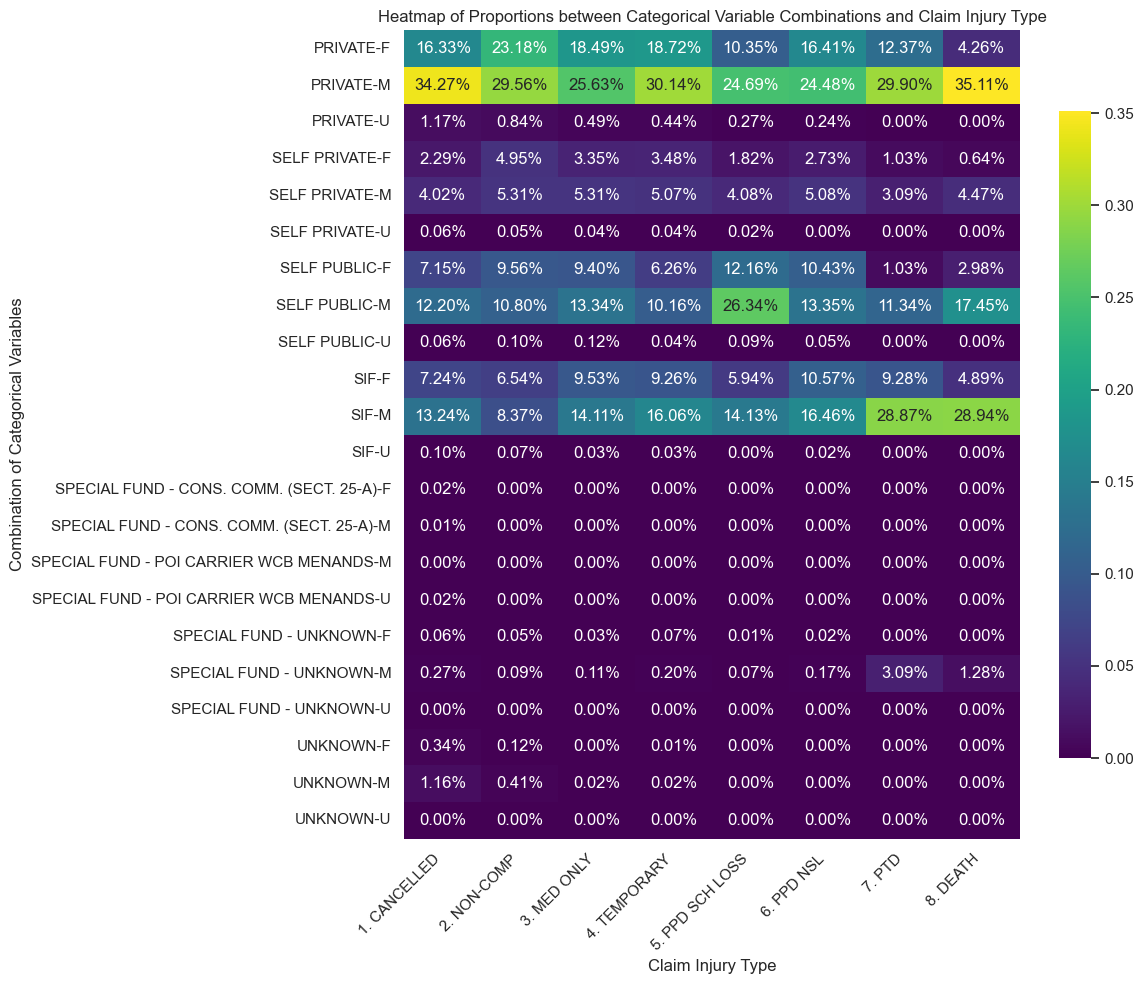

In [90]:
# Example of how to adapt the code using only two categorical variables
categorical_columns = ['Carrier Type', 'Gender']  # Choose a few columns to avoid high cardinality

# Create a new column that combines the chosen categorical variables
df['Category Combination'] = df[categorical_columns].astype(str).agg('-'.join, axis=1)

# Create the contingency table between the combination of categorical variables and Claim Injury Type
contingency_table = pd.crosstab(df['Category Combination'], df['Claim Injury Type'])

# Calculate proportions
proportions = contingency_table.div(contingency_table.sum(axis=0), axis=1)

# Plot the heatmap of proportions
plt.figure(figsize=(12, 10))
sns.heatmap(proportions, annot=True, cmap="viridis", fmt=".2%", cbar_kws={"shrink": .8})
plt.title("Heatmap of Proportions between Categorical Variable Combinations and Claim Injury Type")
plt.xlabel("Claim Injury Type")
plt.ylabel("Combination of Categorical Variables")
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()

From the heatmap, several insights and potential actions can be identified:

- Merging Special Funds: The proportions for the different SPECIAL FUND categories are quite low and similar across most claim injury types. This suggests that these categories (like CONS. COMM. (SECT. 25-A), POI CARRIER WCB MENANDS, UNKNOWN) could be merged into a single SPECIAL FUND category to simplify the data without losing significant information. This consolidation could help streamline the analysis process and make the insights more manageable.

- Gender Differences: There are noticeable differences in proportions between genders within the same carrier type. For instance, PRIVATE-M has higher proportions across several claim injury types compared to PRIVATE-F and PRIVATE-U. This indicates that gender-specific analysis could be important for deriving more accurate and relevant insights.

- High Proportions in Specific Categories: Certain combinations stand out with significantly higher proportions in specific claim injury types. For example, PRIVATE-M has a high proportion in the DEATH category, and SIF-M shows high proportions in TEMPORARY and PTD. These high proportions could indicate areas that need targeted interventions or further investigation.

- Low Proportions in UNKNOWN Categories: The UNKNOWN categories generally have very low proportions across all claim injury types. This suggests that these categories might not be as relevant and could potentially be merged to reduce complexity without affecting the overall insights.

In [91]:
# Count the number of rows where C-2 Date is earlier than Accident Date
num_negative_values = (df['C-2 Date'] < df['Accident Date']).sum()

# Print the number of rows with negative values
print(f"Number of rows where C-2 Date is earlier than Accident Date: {num_negative_values}")

Number of rows where C-2 Date is earlier than Accident Date: 0


# 4. Train Test Split <a class="anchor" id="chapter4"></a>

Splitting the dataset into training and test sets is a crucial step in building a machine learning model. In this project, we perform the train-test split after correcting inconsistencies but before data preprocessing, such as handling missing values, outlier treatment, and feature scaling. This sequence helps in maintaining the integrity of our data and ensures that the model is trained and evaluated fairly.

The train-test split is performed after fixing inconsistencies but before preprocessing to ensure that we do not inadvertently introduce information from the test set into the training set. This allows us to maintain the integrity of our model evaluation and helps ensure that the results obtained during model evaluation are unbiased and reflect the model’s performance on truly unseen data.

In [92]:
X= df.drop('Claim Injury Type',axis=1)
y= df['Claim Injury Type']

# Encode o target
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)

X_train, X_val, y_train, y_val = train_test_split(X,y, test_size = 0.3, 
                                                  random_state = 42, 
                                                  stratify = y, 
                                                  shuffle = True)

# 5. Preprocessing the Dataset ⚒️ <a class="anchor" id="chapter5"></a>

In this chapter, we will perform the basic steps to get to know our dataset.


## 5.1. Outliers

The columns below are those that may have outliers in our dataset:

- **Age at Injury** – The age of the person at the time of the accident.
- **Average Weekly Wage** – Average weekly wage.
- **Number of Dependents** – Number of dependents (may have outliers in cases with a high number of dependents).
- **Accident Year** – Year of the accident.
- **WCIO Cause of Injury Code, WCIO Nature of Injury Code, WCIO Part Of Body Code** – Although these are codes, if they have continuously high numerical values, they may contain outliers.
- **Zip Code** – Although it is a geographic identifier, we can check for unusual or infrequent postal codes.

In [93]:
columns_to_check= [
    'Age at Injury', 'Average Weekly Wage', 
    'Number of Dependents', 'Accident Year'
]

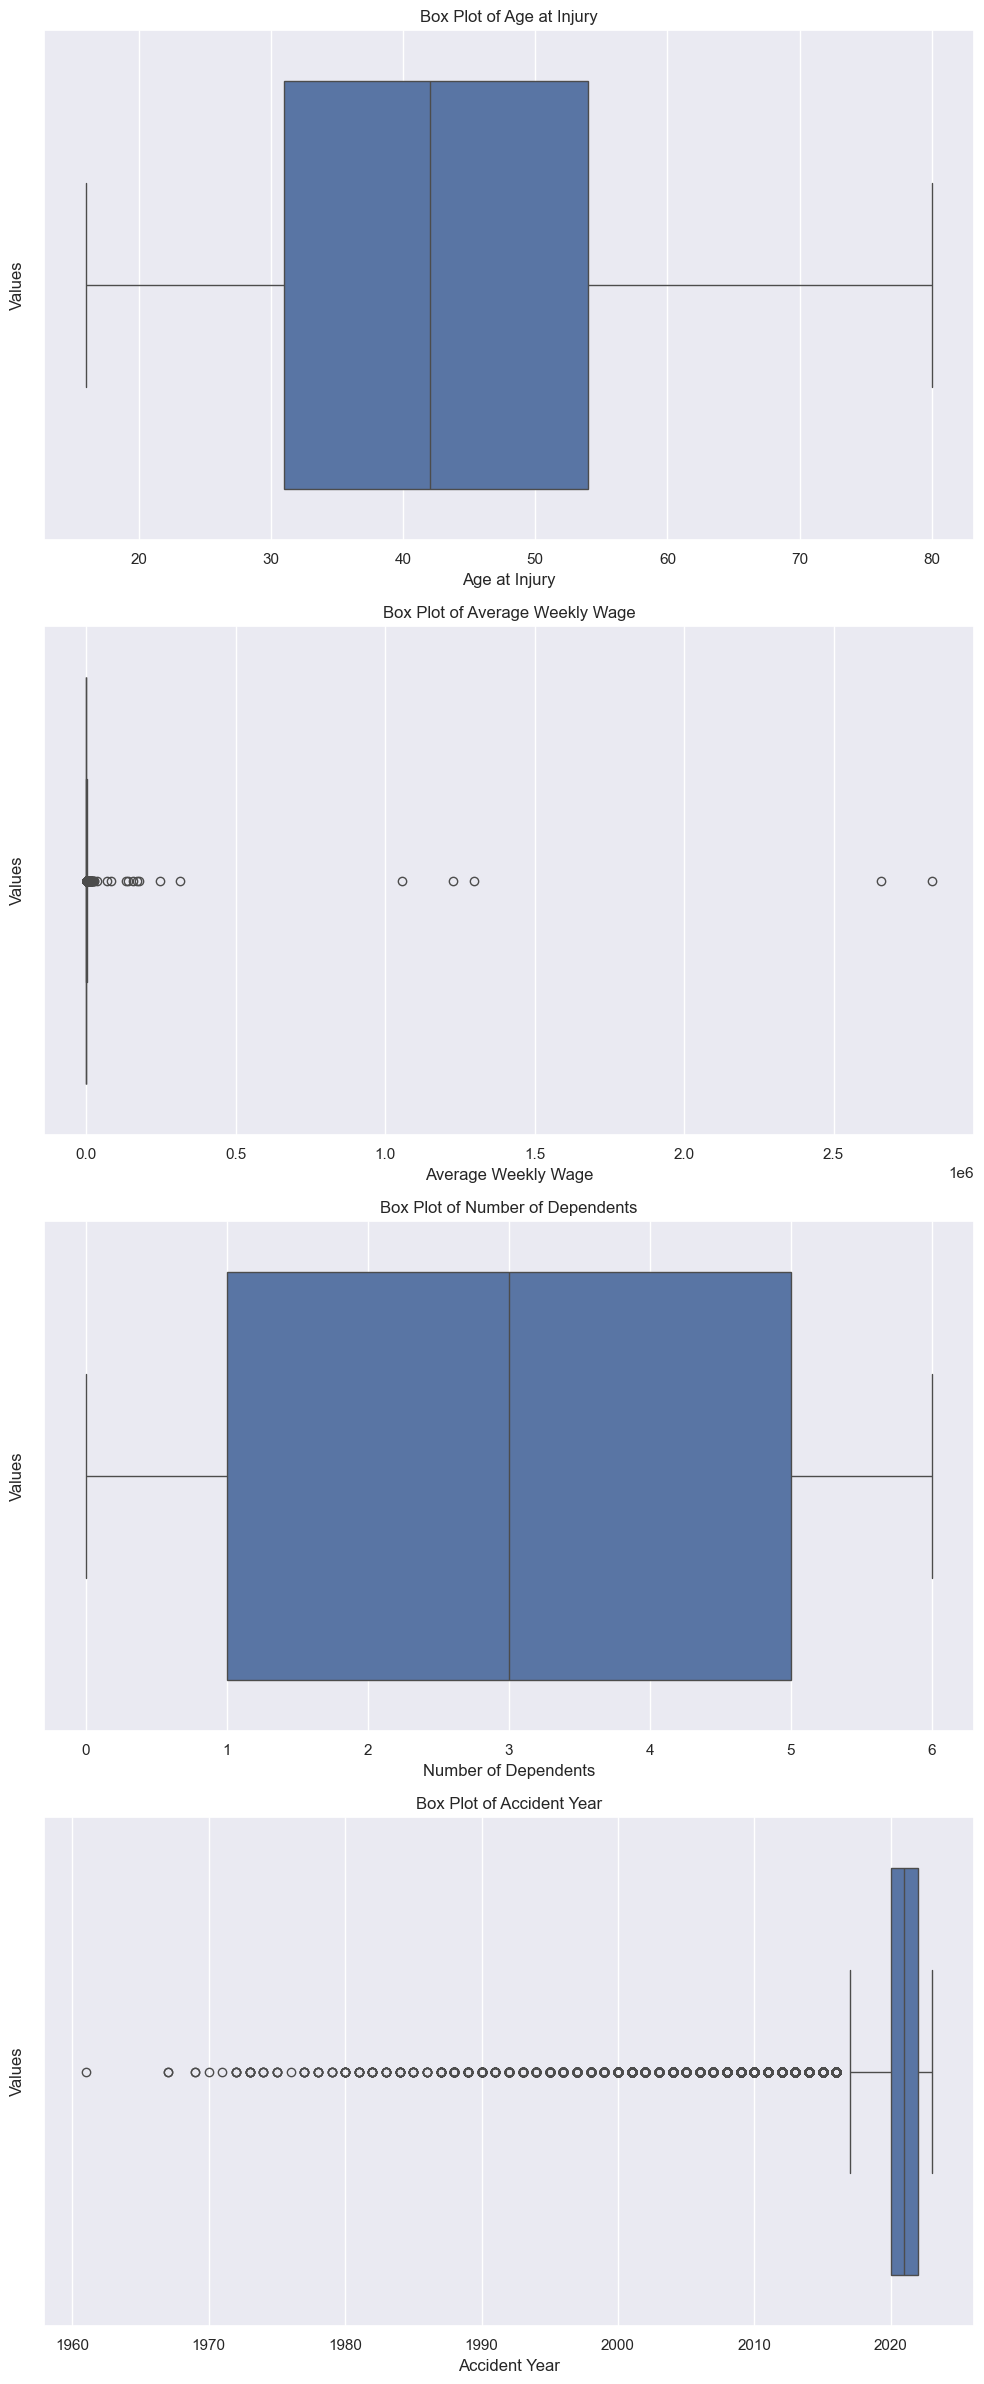

In [94]:
plt.figure(figsize=(10, 6 * len(columns_to_check)))

# Loop through each numeric column and plot a separate box plot
for i, col in enumerate(columns_to_check, 1):
    plt.subplot(len(columns_to_check), 1, i)
    sns.boxplot(x=X_train[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

Analysis of Outliers
1. Age at Injury
The box plot for "Age at Injury" shows a fairly symmetrical distribution with no significant outliers.
The data primarily falls between ages 20 and 80, which aligns with typical working age ranges, indicating there are no major age outliers in the data.
2. Average Weekly Wage
The "Average Weekly Wage" plot shows extreme outliers on the high end.
A few values exceed the million mark, which is likely unusual for weekly wages and suggests possible outliers or data entry errors.
This variable will likely need further investigation and treatment for these high outliers.
3. Number of Dependents
The distribution of "Number of Dependents" appears well-contained within 0 to 6 dependents.
No significant outliers are observed, suggesting a reasonable distribution for this variable.
4. Accident Year
The "Accident Year" box plot shows several outliers before the year 2000.
Most of the data is concentrated in recent years (post-2000), which is expected in a modern claims dataset.
Outliers in earlier years could represent older claims or data entry errors and may warrant further review.

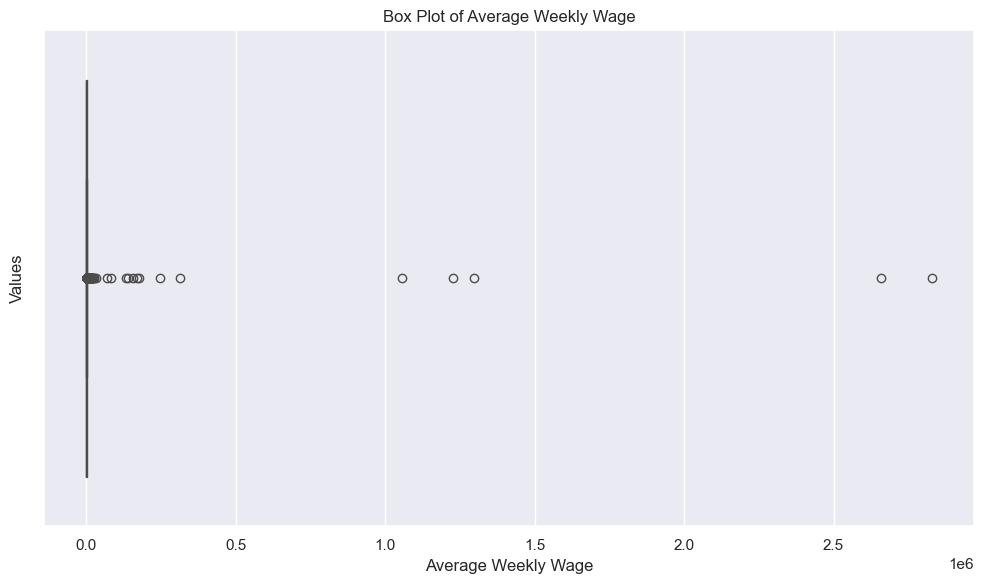

In [95]:
# Filtrar o DataFrame para remover valores zero na coluna 'Average Weekly Wage'
X_train_filtered = X_train[X_train['Average Weekly Wage'] != 0]

# Colunas numéricas selecionadas
columns_to_check_3 = [ 'Average Weekly Wage']

plt.figure(figsize=(10, 6 * len(columns_to_check_3)))

# Loop para criar um boxplot para cada coluna
for i, col in enumerate(columns_to_check_3, 1):
    plt.subplot(len(columns_to_check_3), 1, i)
    sns.boxplot(x=X_train_filtered[col].dropna())  # Remove NaNs e exibe o boxplot
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')

# Ajustar layout para evitar sobreposição
plt.tight_layout()
plt.show()

#### Analysis of Outliers in `Average Weekly Wage`

The box plot for `Average Weekly Wage` indicates significant outliers. Most values are close to the lower end of the distribution, with only a few observations spread across a wide range up to approximately 2.5.

##### Observations:
- The box plot shows a high concentration of wages near the lower end, with some extreme outliers extending significantly beyond the upper whisker.
- Outliers may represent exceptionally high wages, which could be legitimate high-income cases or data entry anomalies.
- Further analysis is recommended to determine if these high values align with known wage distributions or if they could impact model performance negatively.

In [96]:
X_train_ver=X_train[X_train['Average Weekly Wage']>10000]
X_train_ver.head(5)

Accident Date  Age at Injury Assembly Date  \
Claim Identifier                                              
6015269             2022-05-17            NaN    2022-06-15   
5694134             2021-03-31           55.0    2021-04-05   
5522076             2020-06-05           37.0    2020-07-23   
5932389             2022-02-22           30.0    2022-02-28   
6142349             2022-11-22           53.0    2022-11-28   

                  Attorney/Representative  Average Weekly Wage  Birth Year  \
Claim Identifier                                                             
6015269                               0.0             83850.00         NaN   
5694134                               1.0             17458.09      1966.0   
5522076                               0.0            158160.52      1983.0   
5932389                               0.0           1297304.00      1992.0   
6142349                               1.0             22374.68      1969.0   

                   C-2 Date   C-3 Date                 Carrier Name  \
Claim Identifier                                                      
6015269          2022-06-14        NaT  SELECTIVE INSURANCE COMPANY   
5694134          2021-04-03 2021-04-01    INDEMNITY INSURANCE CO OF   
5522076          2020-07-23        NaT        PORT AUTH. OF NY & NJ   
5932389          2022-02-28        NaT      A I U INSURANCE COMPANY   
6142349          2022-11-28 2022-12-07           TOWN OF OYSTER BAY   

                 Carrier Type  ... Industry Code  Medical Fee Region  \
Claim Identifier               ...                                     
6015269               PRIVATE  ...          81.0                  II   
5694134               PRIVATE  ...          44.0                  IV   
5522076           SELF PUBLIC  ...          92.0                  IV   
5932389               PRIVATE  ...          51.0                  II   
6142349           SELF PUBLIC  ...          92.0                  IV   

                 WCIO Cause of Injury Code WCIO Nature of Injury Code  \
Claim Identifier                                                        
6015269                               99.0                       28.0   
5694134                               25.0                       49.0   
5522076                               60.0                       52.0   
5932389                               76.0                       59.0   
6142349                               53.0                       52.0   

                 WCIO Part Of Body Code  Zip Code  Agreement Reached  \
Claim Identifier                                                       
6015269                            55.0     12203                0.0   
5694134                            55.0     11364                0.0   
5522076                            53.0     11371                0.0   
5932389                            36.0     12547                0.0   
6142349                            53.0     11758                0.0   

                 Number of Dependents  Accident Year  Category Combination  
Claim Identifier                                                            
6015269                           3.0         2022.0             PRIVATE-M  
5694134                           1.0         2021.0             PRIVATE-M  
5522076                           0.0         2020.0         SELF PUBLIC-M  
5932389                           2.0         2022.0             PRIVATE-M  
6142349                           1.0         2022.0         SELF PUBLIC-M  

[5 rows x 26 columns]

In [97]:
indices_to_remove = X_train_ver.index

# Remover as linhas de X_train com valores em 'Average Weekly Wage' maiores que 10,000
X_train_novo = X_train.drop(X_train_ver.index)

# Verificar a proporção de dados restantes em X_train_novo
print(len(X_train_novo) / len(X_train))

# Remover as mesmas linhas de y_train
# Obter os índices dos valores a serem removidos

# Remover os valores de y_train nos mesmos índices
#y_train_novo = np.delete(y_train, indices_to_remove)

0.9999004524436437


In [98]:
industry_means_train = X_train.groupby('Industry Code')['Average Weekly Wage'].mean()
industry_means_train_1 = X_train_novo.groupby('Industry Code')['Average Weekly Wage'].mean()

In [99]:
industry_means_train

Industry Code
11.0     366.637720
21.0     540.485358
22.0    1039.627840
23.0     779.009404
31.0     419.365651
32.0     396.653758
33.0     432.777854
42.0     482.215512
44.0     231.929954
45.0     260.486777
48.0     673.378682
49.0     601.785870
51.0    1066.201041
52.0     373.632610
53.0     499.382243
54.0     289.671190
55.0     318.708125
56.0     380.259936
61.0     283.196738
62.0     455.769035
71.0     311.370480
72.0     226.330284
81.0     364.127307
92.0     834.954353
Name: Average Weekly Wage, dtype: float64

In [100]:
industry_means_train_1

Industry Code
11.0     366.637720
21.0     540.485358
22.0    1039.627840
23.0     640.964387
31.0     419.365651
32.0     395.173848
33.0     431.603790
42.0     482.215512
44.0     231.337114
45.0     258.717772
48.0     617.194979
49.0     361.674920
51.0     845.149193
52.0     367.275649
53.0     446.113962
54.0     289.671190
55.0     318.708125
56.0     380.259936
61.0     283.196738
62.0     435.971773
71.0     289.370712
72.0     226.330284
81.0     354.638119
92.0     825.266057
Name: Average Weekly Wage, dtype: float64

**Conclusion:** We must remove these outliers before entering salaries based on the industry code

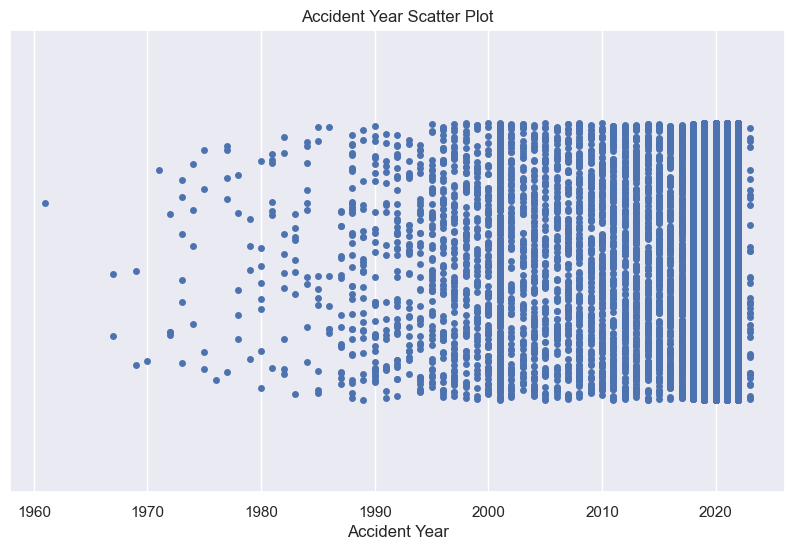

In [101]:
# Scatter plot to check the possible separation of points by year
plt.figure(figsize=(10, 6))
sns.stripplot(data=X_train, x='Accident Year', jitter=0.3)
plt.title('Accident Year Scatter Plot')
plt.xlabel('Accident Year')
plt.show()

#### Analysis of `Accident Year` Distribution

The scatter plot of `Accident Year` shows a dense distribution of incidents over the years, with most events concentrated from the 1980s onward. 

##### Observations:
- **Pre-1980**: There are sparse data points, suggesting fewer recorded incidents or less complete data in earlier years.
- **1980 and later**: There is a dense concentration, which increases as we move towards recent years. This may reflect more comprehensive data collection and record-keeping.
- **Post-2010**: There is a consistently high density, indicating active and robust data recording in recent years.


In [102]:
X_train[X_train['Accident Year']<1970].head(3)

Accident Date  Age at Injury Assembly Date  \
Claim Identifier                                              
5439830             1969-04-01           28.0    2020-02-28   
5946151             1967-04-05            NaN    2022-03-17   
5483928             1961-09-06            NaN    2020-05-18   

                  Attorney/Representative  Average Weekly Wage  Birth Year  \
Claim Identifier                                                             
5439830                               0.0                  0.0      1941.0   
5946151                               0.0                  0.0         NaN   
5483928                               0.0                  0.0         NaN   

                   C-2 Date   C-3 Date            Carrier Name  \
Claim Identifier                                                 
5439830                 NaT 2020-01-30  SPECIAL FUNDS SEC 25-A   
5946151          2022-03-17        NaT    STATE INSURANCE FUND   
5483928          2020-05-18        NaT  TRAVELERS INDEMNITY CO   

                            Carrier Type  ... Industry Code  \
Claim Identifier                          ...                 
5439830           SPECIAL FUND - UNKNOWN  ...           NaN   
5946151                              SIF  ...          81.0   
5483928                          PRIVATE  ...          92.0   

                  Medical Fee Region WCIO Cause of Injury Code  \
Claim Identifier                                                 
5439830                           II                       NaN   
5946151                           UK                       NaN   
5483928                           UK                      56.0   

                 WCIO Nature of Injury Code WCIO Part Of Body Code  Zip Code  \
Claim Identifier                                                               
5439830                                 NaN                    NaN     12304   
5946151                                 NaN                   48.0     31717   
5483928                                52.0                   42.0     24382   

                  Agreement Reached Number of Dependents  Accident Year  \
Claim Identifier                                                          
5439830                         0.0                  2.0         1969.0   
5946151                         0.0                  5.0         1967.0   
5483928                         0.0                  0.0         1961.0   

                      Category Combination  
Claim Identifier                            
5439830           SPECIAL FUND - UNKNOWN-M  
5946151                              SIF-M  
5483928                          PRIVATE-F  

[3 rows x 26 columns]

In [103]:
X_train['Assembly Date Year'] = X_train['Assembly Date'].dt.year
X_train['C-2 Date Year'] = X_train['C-2 Date'].dt.year

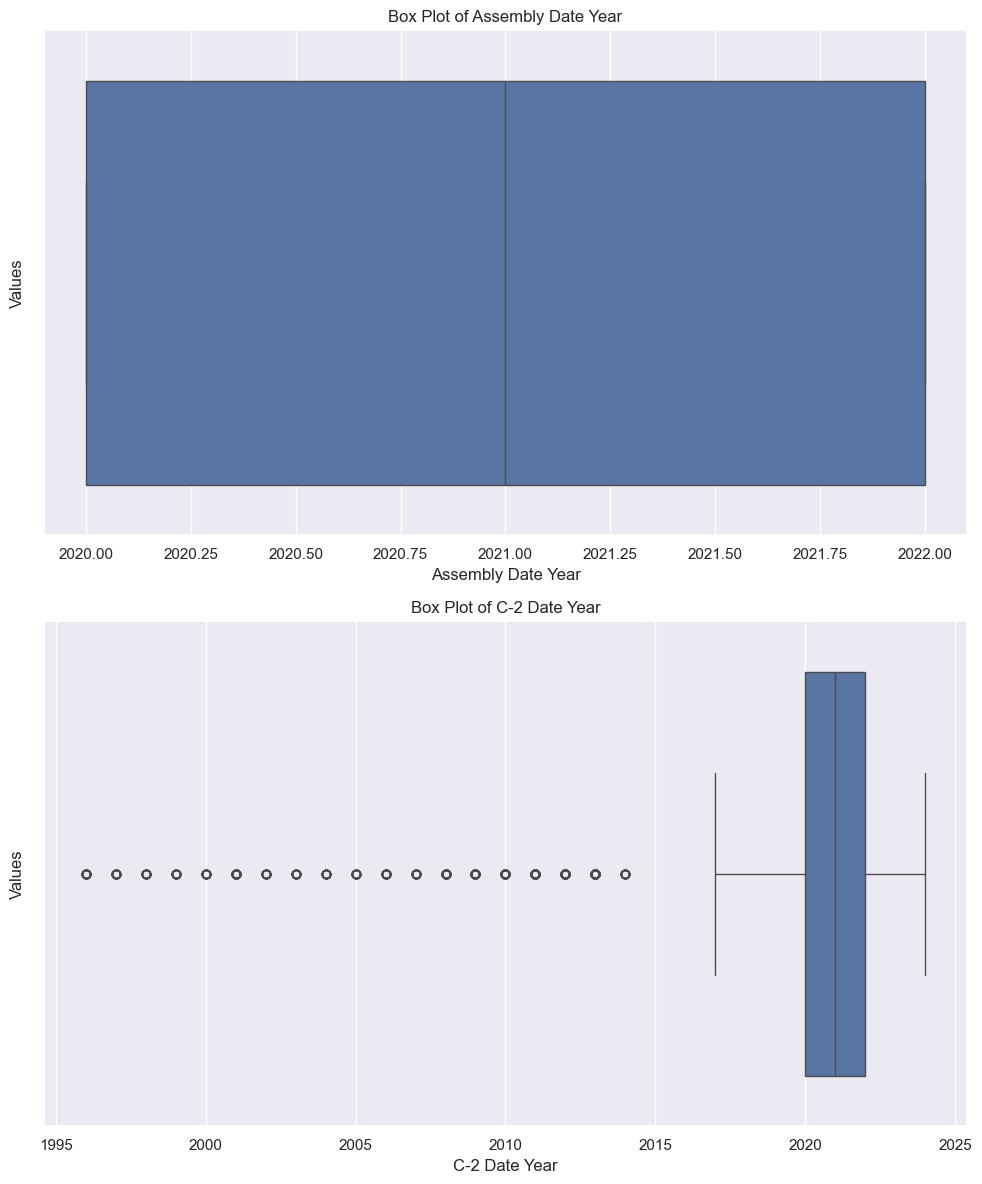

In [104]:
# Define columns to check for date-based outliers
columns_to_check_3 = ['Assembly Date Year', 'C-2 Date Year']

# Plot box plots for each date column
plt.figure(figsize=(10, 6 * len(columns_to_check_3)))
for i, col in enumerate(columns_to_check_3, 1):
    plt.subplot(len(columns_to_check_3), 1, i)
    sns.boxplot(x=X_train[col])
    plt.title(f'Box Plot of {col}')
    plt.xlabel(col)
    plt.ylabel('Values')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

#### Analysis of `Assembly Date Year` and `C-2 Date Year` Distributions

##### 1. Assembly Date Year
The box plot for `Assembly Date Year` shows a narrow range of data, with all values clustered between 2020 and 2022. This indicates that the assembly records in this dataset are concentrated in recent years, as it is mentioned in the Project Description.

- **Observation**: The absence of outliers suggests that data is consistently collected within this timeframe.

##### 2. C-2 Date Year
The box plot for `C-2 Date Year` displays a wider range, with data points spanning from 1995 to 2022. There are some older values that appear as individual points, which may indicate isolated entries or events from prior years. Most data points are recent, around the 2015-2022 range, with a few older records extending back to the late 1990s.

- **Observation**: The presence of isolated older values suggests occasional reporting from earlier years.

##### Overall Insights:
The data appears to be recent and concentrated around 2020-2022 for assembly dates, with `C-2 Date Year` showing a slightly broader historical context. This distribution may reflect changes in data availability or policy for data retention.

In [105]:
X_train[X_train['C-2 Date Year']<2015].head(3)

Accident Date  Age at Injury Assembly Date  \
Claim Identifier                                              
5432557             1999-01-22            NaN    2020-02-19   
5690331             2011-01-26           54.0    2021-03-31   
5395060             2003-03-17           48.0    2020-01-03   

                  Attorney/Representative  Average Weekly Wage  Birth Year  \
Claim Identifier                                                             
5432557                               0.0                  0.0         NaN   
5690331                               0.0                  0.0      1957.0   
5395060                               1.0                  0.0      1955.0   

                   C-2 Date C-3 Date                   Carrier Name  \
Claim Identifier                                                      
5432557          1999-02-22      NaT     LIBERTY MUTUAL FIRE INS CO   
5690331          2011-01-28      NaT  TRAVELERS CASUALTY CO OF CONN   
5395060          2003-03-21      NaT   UNIVERSITY OF ROCHESTER 1979   

                  Carrier Type  ... WCIO Cause of Injury Code  \
Claim Identifier                ...                             
5432557                PRIVATE  ...                      52.0   
5690331                PRIVATE  ...                      27.0   
5395060           SELF PRIVATE  ...                      99.0   

                  WCIO Nature of Injury Code WCIO Part Of Body Code Zip Code  \
Claim Identifier                                                               
5432557                                 37.0                   56.0    08022   
5690331                                 10.0                   50.0      NaN   
5395060                                 25.0                   14.0    14609   

                 Agreement Reached  Number of Dependents  Accident Year  \
Claim Identifier                                                          
5432557                        1.0                   0.0         1999.0   
5690331                        0.0                   0.0         2011.0   
5395060                        1.0                   1.0         2003.0   

                 Category Combination  Assembly Date Year  C-2 Date Year  
Claim Identifier                                                          
5432557                     PRIVATE-M              2020.0         1999.0  
5690331                     PRIVATE-F              2021.0         2011.0  
5395060                SELF PRIVATE-M              2020.0         2003.0  

[3 rows x 28 columns]

In [106]:
#Drop Assembly Date Year column from the train
X_train.drop(['Assembly Date Year','C-2 Date Year'], axis=1, inplace=True)

## 5.2. Missing Values <a class="anchor" id="section_5_2"></a>

We may also have missing values that are incorrectly set to zero. Therefore, we will use `.eq(0)` to identify if there are any columns with zeros that are not supposed to have them.


In [107]:
# Count the number of zeros in each column
X_train.eq(0).sum()

Accident Date                      0
Age at Injury                      0
Assembly Date                      0
Attorney/Representative       274690
Average Weekly Wage           234703
Birth Year                         0
C-2 Date                           0
C-3 Date                           0
Carrier Name                       0
Carrier Type                       0
County of Injury                   0
COVID-19 Indicator            382530
District Name                      0
First Hearing Date                 0
Gender                             0
IME-4 Count                        0
Industry Code                      0
Medical Fee Region                 0
WCIO Cause of Injury Code          0
WCIO Nature of Injury Code         0
WCIO Part Of Body Code             0
Zip Code                           0
Agreement Reached             383137
Number of Dependents           57117
Accident Year                      0
Category Combination               0
dtype: int64

In [108]:
X_train.shape

(401818, 26)

In [109]:
X_val.shape

(172208, 26)

In this section, we identify columns with a high number of zero values, which might indicate potential missing values represented by zero instead of NaN. This helps us to locate inconsistencies or placeholders that we need to address during data preprocessing.

Key observations from the output:

Alternative Dispute Resolution: 399,988 entries are zeros, potentially representing missing values.

Attorney/Representative: 274,491 entries are zeros, likely to be placeholders.

Average Weekly Wage: 234,796 entries have zeros, indicating potential data issues.

COVID-19 Indicator: 382,695 entries are zeros, which may represent cases without a COVID-related claim.

Agreement Reached: 382,972 entries have zeros, which could indicate missing or null agreements.

Number of Dependents: 57,123 entries with zeroes might indicate missing values in this column.

This analysis allows us to consider the necessity of replacing or imputing these zero values during the data preprocessing steps, ensuring they do not interfere with model training and evaluation.

### Handling High Zero Columns

In [110]:
# Set the threshold for zero values (e.g., more than 20% zeros)
threshold = 0.2

# Calculate the percentage of zeros for each column
zero_percentage = X_train.eq(0).mean()

# Filter columns that have more than the threshold of zero values
high_zero_columns = zero_percentage[zero_percentage > threshold]

# Display the columns with their zero percentage
print(high_zero_columns*100)

Attorney/Representative    68.361796
Average Weekly Wage        58.410275
COVID-19 Indicator         95.199817
Agreement Reached          95.350880
dtype: float64


We set a threshold to identify columns with a high proportion of zero values (more than 20%). This analysis helps us determine if any columns contain zeros that might represent missing data instead of actual values.

The columns that have more than 20% of zero values are:
- **Attorney/Representative**: 68.31% zeros
- **Average Weekly Wage**: 58.43% zeros
- **COVID-19 Indicator**: 95.24% zeros
- **Agreement Reached**: 95.31% zeros

We found that **Average Weekly Wage** contains an unexpectedly high number of zeros, which is likely incorrect for this dataset. Since every employee should have a weekly wage, these zeros should be treated as missing values. Therefore, we will replace the zeros in the **Average Weekly Wage** column with `NaN`.


We found that only one column, Average Weekly Wage, contains an unexpectedly high number of zeros. Since this dataset is related to work insurance, every employee must have a weekly wage, meaning these zeros are likely incorrect and should be treated as missing values. Therefore, we will replace the zeros in the Average Weekly Wage column with NaN.

In [111]:
# Replace zeros in 'Average Weekly Wage' with NaN in the train, validation, and test sets
X_train['Average Weekly Wage'] = X_train['Average Weekly Wage'].replace(0, np.nan)
X_val['Average Weekly Wage'] = X_val['Average Weekly Wage'].replace(0, np.nan)
df_test['Average Weekly Wage'] = df_test['Average Weekly Wage'].replace(0, np.nan)

### Identifying Remaining Missing Values

After treating zeros as missing values in the **Average Weekly Wage** column, we will now examine the dataset for any remaining `NaN` values. This step ensures that all missing data points are identified, enabling us to address them systematically.

The table below displays the count of missing values (NaN) for each column in the dataset. Some columns, such as **First Hearing Date** and **IME-4 Count**, contain a significant number of missing values, which may require further investigation and treatment.

In [112]:
# Display count of NaN values for each column in the training dataset
X_train.isnull().sum()

Accident Date                   2587
Age at Injury                  40880
Assembly Date                   1022
Attorney/Representative            0
Average Weekly Wage           254769
Birth Year                     38491
C-2 Date                       10903
C-3 Date                      271096
Carrier Name                       0
Carrier Type                       0
County of Injury                   0
COVID-19 Indicator                 0
District Name                      0
First Hearing Date            296368
Gender                             0
IME-4 Count                   308855
Industry Code                   6969
Medical Fee Region                 0
WCIO Cause of Injury Code      10945
WCIO Nature of Injury Code     10956
WCIO Part Of Body Code         11919
Zip Code                       20201
Agreement Reached                  0
Number of Dependents               0
Accident Year                   2587
Category Combination               0
dtype: int64

### Columns with High Percentage of Missing Values

In [113]:
# Set the threshold for missing values (e.g., more than 30% missing)
threshold = 0.2

# Calculate the percentage of missing values for each column
missing_percentage = X_train.isnull().mean()

# Filter columns that have more than the threshold of missing values
high_missing_columns = missing_percentage[missing_percentage > threshold]

# Display the columns with their missing percentage
print(high_missing_columns*100)

Average Weekly Wage    63.404078
C-3 Date               67.467361
First Hearing Date     73.756775
IME-4 Count            76.864401
dtype: float64


Using a threshold of 20%, we identified columns with a high percentage of missing values. Columns such as **First Hearing Date** and **IME-4 Count** have more than 70% missing data, which makes them candidates for potential feature engineering or alternative handling.

In particular:
- **First Hearing Date**: Given its high missing rate, this feature could potentially be transformed into a binary indicator, where 0 indicates missing and 1 indicates available data. This approach allows us to retain any signal that might be present in the presence or absence of this information.

Let's explore more about the rest of missing values.

> #### Handling Missing Values in `IME-4 Count`

The `IME-4 Count` feature represents the number of independent medical audit examinations. A missing value (`NaN`) in this column likely indicates that no audits were conducted for a specific case. Therefore, we have decided to replace all `NaN` values with 0 to indicate that there was no audit.



In [114]:
# Display unique values in 'IME-4 Count' to understand the range
X_train['IME-4 Count'].unique()

array([nan,  4.,  2.,  1., 19.,  8.,  5.,  6.,  3., 10., 11.,  7.,  9.,
       21., 15., 22., 14., 17., 18., 12., 13., 16., 23., 24., 20., 27.,
       31., 25., 26., 28., 37., 32., 36., 29., 73., 39., 30., 35., 48.,
       47., 34.])

As IME-4 represents the number of independent medical audicts examination we decided to convert nan to 0 meaning that there wasn't any.

In [115]:
# Replace NaN values in 'IME-4 Count' with 0 in the training, validation, and test sets
X_train['IME-4 Count'].fillna(0, inplace=True)
X_val['IME-4 Count'].fillna(0, inplace=True)
df_test['IME-4 Count'].fillna(0, inplace=True)

# Confirm replacement by displaying unique values again
X_train['IME-4 Count'].unique()

array([ 0.,  4.,  2.,  1., 19.,  8.,  5.,  6.,  3., 10., 11.,  7.,  9.,
       21., 15., 22., 14., 17., 18., 12., 13., 16., 23., 24., 20., 27.,
       31., 25., 26., 28., 37., 32., 36., 29., 73., 39., 30., 35., 48.,
       47., 34.])

> #### Handling Missing Values in `C-3 Date`

The `C-3 Date` feature was dropped because it exceeded the threshold for missing values that we predefined. This indicates that the feature likely lacks sufficient predictive power due to the high amount of missing information.

We decided to drop C-3 Date based on the threshold that we pre defined meaning those features don't have enough predictive power based on the amount of missing information.


In [116]:
# Drop 'C-3 Date' column from training, validation, and test sets
X_train = X_train.drop('C-3 Date', axis=1)

# Apply to the validation set
X_val = X_val.drop('C-3 Date', axis=1)

# Apply to the test set
df_test = df_test.drop('C-3 Date', axis=1)

> #### Defining a threshold for missing values


In [117]:
# Set the threshold for missing values - in this case, 30% of the columns
threshold = X_train.shape[1] * 0.30

# Count the number of NaNs in each row
nan_counts_per_row = X_train.isna().sum(axis=1)

# Find rows with more than 30% NaNs
rows_with_high_nan = nan_counts_per_row > threshold

# Calculate the percentage of rows with more than 30% NaNs
percentage_rows_with_high_nan = (rows_with_high_nan.sum() / X_train.shape[0]) * 100

print(f"Percentage of rows with more than 30% missing values: {percentage_rows_with_high_nan:.4f}%")

Percentage of rows with more than 30% missing values: 0.7028%


In [118]:
# Delete rows with more than 30% NaNs from X_train and update y_train accordingly
rows_to_keep = ~rows_with_high_nan  # Rows that we are keeping in X_train
X_train = X_train[rows_to_keep].copy()
y_train = y_train[rows_to_keep].copy()  # Keep the same indices in y_train

# Print the shape of the cleaned training set
print(f"Shape of X_train after removing rows with more than 30% NaNs: {X_train.shape}")
print(f"Shape of y_train after removing corresponding rows: {y_train.shape}")

Shape of X_train after removing rows with more than 30% NaNs: (398994, 25)
Shape of y_train after removing corresponding rows: (398994,)


1. **Threshold for Missing Values**:
   - We have decided to focus on rows with **more than 30% missing values** in `X_train` dataset. 

2. **Remove Rows with High Missing Values**:
   - We will **delete the rows in `X_train`** that have **more than 30% of the columns with missing values**. Since this only affects **0.25% of the rows**, it won't significantly reduce your dataset size and will help maintain a good quality of training data.

3. **Preserve Data Quality in `X_train`**:
   - The purpose of removing rows from `X_train` is to have a **high-quality training dataset**. By improving the quality of `X_train`, we will also have better statistics (mean/mode) for imputing missing values in X_val and df_test. This ensures that your imputation values are more reliable, coming from data that has less noise and fewer inconsistencies.

4. **Impute Missing Values in X_val and df_test**:
    - After deleting the rows with high missing values in `X_train`, we will use the mode or mean from X_train to impute the missing values in both X_val and df_test to maintain consistency across datasets.

In [119]:
X_train.isnull().sum()

Accident Date                   1498
Age at Injury                  38284
Assembly Date                   1020
Attorney/Representative            0
Average Weekly Wage           251950
Birth Year                     36818
C-2 Date                        8113
Carrier Name                       0
Carrier Type                       0
County of Injury                   0
COVID-19 Indicator                 0
District Name                      0
First Hearing Date            293664
Gender                             0
IME-4 Count                        0
Industry Code                   5248
Medical Fee Region                 0
WCIO Cause of Injury Code       8122
WCIO Nature of Injury Code      8133
WCIO Part Of Body Code          9113
Zip Code                       19824
Agreement Reached                  0
Number of Dependents               0
Accident Year                   1498
Category Combination               0
dtype: int64

> #### Imputing Missing Values in `Industry Code`

To impute missing values in the `Industry Code` feature, we calculate the mode of `Industry Code` based on the combination of `Carrier Name` and `Carrier Type`. This approach allows us to assign the most common `Industry Code` for each carrier and carrier type combination, providing a relevant approximation for missing values.

In [120]:
# Calculate the mode of 'Industry Code' for each ('Carrier Name', 'Carrier Type') pair in the training dataset
industry_code_mode_train = X_train.groupby(['Carrier Name', 'Carrier Type'])['Industry Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Define a function to impute 'Industry Code' based on 'Carrier Name' and 'Carrier Type' using training mode
def impute_industry_code(row):
    if pd.isna(row['Industry Code']):
        # Get the mode of the industry code for the given carrier name and carrier type from training set
        return industry_code_mode_train.get((row['Carrier Name'], row['Carrier Type']), row['Industry Code'])
    return row['Industry Code']

# Apply the function to fill missing values in 'Industry Code' for X_train, X_val, and df_test
X_train['Industry Code'] = X_train.apply(lambda row: impute_industry_code(row) if pd.isna(row['Industry Code']) else row['Industry Code'], axis=1)
X_val['Industry Code'] = X_val.apply(lambda row: impute_industry_code(row) if pd.isna(row['Industry Code']) else row['Industry Code'], axis=1)
df_test['Industry Code'] = df_test.apply(lambda row: impute_industry_code(row) if pd.isna(row['Industry Code']) else row['Industry Code'], axis=1)

> #### Imputing Missing Values in `Average Weekly Wage`

For now, we will impute the missing values in the `Average Weekly Wage` feature based on the mean values grouped by `Industry Code`. This allows us to approximate the missing values by considering the industry context of each entry.

In [121]:
# Calculate the mean of 'Average Weekly Wage' for each 'Industry Code' in the training dataset
industry_means_train = X_train.groupby('Industry Code')['Average Weekly Wage'].mean()

# Define a function to fill missing values based on 'Industry Code' using training means
def impute_average_weekly_wage(row):
    if pd.isna(row['Average Weekly Wage']):
        return industry_means_train.get(row['Industry Code'], row['Average Weekly Wage'])
    return row['Average Weekly Wage']

# Apply the function to fill missing values in 'Average Weekly Wage' for X_train, X_val, and df_test
X_train['Average Weekly Wage'] = X_train.apply(lambda row: impute_average_weekly_wage(row) if pd.isna(row['Average Weekly Wage']) else row['Average Weekly Wage'], axis=1)
X_val['Average Weekly Wage'] = X_val.apply(lambda row: impute_average_weekly_wage(row) if pd.isna(row['Average Weekly Wage']) else row['Average Weekly Wage'], axis=1)  
df_test['Average Weekly Wage'] = df_test.apply(lambda row: impute_average_weekly_wage(row) if pd.isna(row['Average Weekly Wage']) else row['Average Weekly Wage'], axis=1)

> #### Imputing Missing Values in `Zip Code`

To impute missing values in the `Zip Code` feature, we use the mode of `Zip Code` based on the combination of `County of Injury` and `District Name`. This approach ensures that missing values are filled with the most frequent `Zip Code` for each unique combination of county and district, providing a region-specific approximation.


In [122]:
# Calculate the mode of 'Zip Code' for each ('County of Injury', 'District Name') pair in the training dataset
zip_code_mode_train = X_train.groupby(['County of Injury', 'District Name'])['Zip Code'].agg(lambda x: x.mode()[0] if not x.mode().empty else None)

# Define a function to impute 'Zip Code' based on 'County of Injury' and 'District Name' using training mode
def impute_zip_code(row):
    if pd.isna(row['Zip Code']):
        # Get the mode of the zip code for the given county and district from training set
        return zip_code_mode_train.get((row['County of Injury'], row['District Name']), row['Zip Code'])
    return row['Zip Code']

# Apply the imputation function only for missing values in 'Zip Code' for X_train, X_val, and df_test
X_train['Zip Code'] = X_train.apply(lambda row: impute_zip_code(row) if pd.isna(row['Zip Code']) else row['Zip Code'], axis=1)
X_val['Zip Code'] = X_val.apply(lambda row: impute_zip_code(row) if pd.isna(row['Zip Code']) else row['Zip Code'], axis=1)
df_test['Zip Code'] = df_test.apply(lambda row: impute_zip_code(row) if pd.isna(row['Zip Code']) else row['Zip Code'], axis=1)

#### Imputing `Birth Year`

To impute missing values in the `Birth Year` feature, we use the `Assembly Date` and `Age at Injury`. If both `Assembly Date` and `Age at Injury` are available, we can calculate the `Birth Year` by subtracting `Age at Injury` from the year of `Assembly Date`.

In [123]:
# Ensure 'Assembly Date' is in datetime format for all datasets
X_train['Assembly Date'] = pd.to_datetime(X_train['Assembly Date'], errors='coerce')
X_val['Assembly Date'] = pd.to_datetime(X_val['Assembly Date'], errors='coerce')
df_test['Assembly Date'] = pd.to_datetime(df_test['Assembly Date'], errors='coerce')

# Define a function to impute 'Birth Year' based on 'Assembly Date' and 'Age at Injury'
def impute_birth_year(row):
    if pd.isna(row['Birth Year']):
        if pd.notna(row['Assembly Date']) and pd.notna(row['Age at Injury']):
            # Calculate birth year by subtracting age at injury from assembly year
            assembly_year = row['Assembly Date'].year
            return float(assembly_year - row['Age at Injury'])
    return row['Birth Year']

# Apply the imputation function only for missing values in 'Birth Year' for X_train, X_val, and df_test
X_train['Birth Year'] = X_train.apply(lambda row: impute_birth_year(row) if pd.isna(row['Birth Year']) else row['Birth Year'], axis=1)
X_val['Birth Year'] = X_val.apply(lambda row: impute_birth_year(row) if pd.isna(row['Birth Year']) else row['Birth Year'], axis=1)
df_test['Birth Year'] = df_test.apply(lambda row: impute_birth_year(row) if pd.isna(row['Birth Year']) else row['Birth Year'], axis=1)

> Age at Injury

The column `Age at Injury` contains missing values which represent key data about the age of the person at the time of the injury. We observe that by retaining this feature and carefully imputing its missing values, we ensure that we preserve potentially valuable information for the predictive model.


In [124]:
# # Drop 'Birth Year' from X_train, X_val, and df_test
# X_train = X_train.drop(columns=['Birth Year'])
# X_val = X_val.drop(columns=['Birth Year'])
# df_test = df_test.drop(columns=['Birth Year'])

After addressing `Birth Year`, we check the percentage of missing values in `df_test`. This will guide us on further preprocessing steps to handle any remaining missing data.


In [125]:
# Calculate the percentage of missing values in df_test
missing_percentage = df_test.isnull().mean() * 100
missing_percentage

Accident Date                  0.629937
Age at Injury                 10.942973
Assembly Date                  0.057220
Attorney/Representative        0.000000
Average Weekly Wage            0.004897
Birth Year                    10.322830
C-2 Date                       2.400928
Carrier Name                   0.000000
Carrier Type                   0.000000
County of Injury               0.000000
COVID-19 Indicator             0.000000
District Name                  0.000000
First Hearing Date            88.911914
Gender                         0.000000
IME-4 Count                    0.000000
Industry Code                  0.005155
Medical Fee Region             0.000000
WCIO Cause of Injury Code      2.667182
WCIO Nature of Injury Code     2.721825
WCIO Part Of Body Code         2.461241
Zip Code                       0.000258
Number of Dependents           0.000000
Accident Year                  0.629937
dtype: float64

In [126]:
#Delete Accident Year
X_train.drop(['Accident Year'], axis=1, inplace=True)
X_val.drop(['Accident Year'], axis=1, inplace=True)
df_test.drop(['Accident Year'], axis=1, inplace=True)

**1. Exclude `First Hearing Date`**:  
We check the percentage of rows with missing values after excluding `First Hearing Date`, which has a high percentage of missing entries.


In [127]:
# Check percentage of rows with missing values, excluding 'First Hearing Date'
missing_values = X_train[X_train.columns.difference(['First Hearing Date'])].isna().any(axis=1)
percentage_missing = (missing_values.sum() / len(X_train)) * 100
print(f"Percentage of rows with missing values (excluding 'First Hearing Date'): {percentage_missing:.2f}%")

Percentage of rows with missing values (excluding 'First Hearing Date'): 12.11%


**2. Exclude `Age at Injury`**:  
Additionally, we explore the impact of excluding both `First Hearing Date` and `Age at Injury` to see how much of the data remains usable.

In [128]:
# Check percentage of rows with missing values, excluding both 'First Hearing Date' and 'Age at Injury'
missing_values = X_train[X_train.columns.difference(['First Hearing Date', 'Age at Injury','Birth Year'])].isna().any(axis=1)
percentage_missing = (missing_values.sum() / len(X_train)) * 100
print(f"Percentage of rows with missing values (excluding 'First Hearing Date' and 'Age at Injury'): {percentage_missing:.2f}%")

Percentage of rows with missing values (excluding 'First Hearing Date' and 'Age at Injury'): 3.08%


## we can consider this: We decrease a lot the percentage of rows with missing values, so, for this motive we will delete the variable Age at Injury.

In [129]:
# #Drop Age at Injury from the train, val and test set
# X_train = X_train.drop(columns=['Age at Injury'])
# X_val = X_val.drop(columns=['Age at Injury'])
# df_test = df_test.drop(columns=['Age at Injury']) 3.72??

Since only 3.89% of the values are missing, we decided to use KNNImputer to fill in these missing values. It’s important to note that we are not including 'First Hearing Date' in this imputation, as missing values in this column have a specific meaning. We plan to create a new feature based on the presence or absence of 'First Hearing Date' as part of the feature engineering process, after which the original column will be dropped.

In [130]:
# Create copies of the datasets to avoid modifying the original
X_train_copy = X_train.copy()
X_val_copy = X_val.copy()
df_test_copy = df_test.copy()

# Drop the column 'Agreement Reached' if it's not in the test set
columns_to_drop = ['Agreement Reached']
X_train_copy.drop(columns=columns_to_drop, errors='ignore', inplace=True)
X_val_copy.drop(columns=columns_to_drop, errors='ignore', inplace=True)
df_test_copy.drop(columns=columns_to_drop, errors='ignore', inplace=True)

# Define lists for categorical/code features and numeric features
categorical_features = ['Zip Code', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']
numeric_features = ['Age at Injury', 'Average Weekly Wage']

# Mode imputation for categorical/code features (using mode of X_train)
for col in categorical_features:
    if col in X_train_copy.columns:
        mode_value = X_train_copy[col].mode()[0]  # Calculate mode from the training set

        # Apply mode imputation to X_train, X_val, and df_test
        X_train_copy[col].fillna(mode_value, inplace=True)
        X_val_copy[col].fillna(mode_value, inplace=True)
        if col in df_test_copy.columns:
            df_test_copy[col].fillna(mode_value, inplace=True)

# Mean imputation for numeric features (using mean of X_train)
for col in numeric_features:
    if col in X_train_copy.columns:
        mean_value = X_train_copy[col].mean()  # Calculate mean from the training set

        # Apply mean imputation to X_train, X_val, and df_test
        X_train_copy[col].fillna(mean_value, inplace=True)
        X_val_copy[col].fillna(mean_value, inplace=True)
        if col in df_test_copy.columns:
            df_test_copy[col].fillna(mean_value, inplace=True)

# Convert date features to datetime before imputation
date_columns = ['Accident Date', 'Assembly Date', 'C-2 Date']
for col in date_columns:
    X_train_copy[col] = pd.to_datetime(X_train_copy[col], errors='coerce')
    X_val_copy[col] = pd.to_datetime(X_val_copy[col], errors='coerce')
    df_test_copy[col] = pd.to_datetime(df_test_copy[col], errors='coerce')

# Impute 'Accident Date' before 'C-2 Date'
# Impute missing 'Accident Date' with mean or some logical estimate
accident_date_mean = X_train_copy['Accident Date'].mean()
X_train_copy['Accident Date'].fillna(accident_date_mean, inplace=True)
X_val_copy['Accident Date'].fillna(accident_date_mean, inplace=True)
df_test_copy['Accident Date'].fillna(accident_date_mean, inplace=True)

# Impute missing 'Assembly Date Date' with mean or some logical estimate
assembly_date_mean = X_train_copy['Assembly Date'].mean()
X_train_copy['Assembly Date'].fillna(assembly_date_mean, inplace=True)
X_val_copy['Assembly Date'].fillna(assembly_date_mean, inplace=True)
df_test_copy['Assembly Date'].fillna(assembly_date_mean, inplace=True)


# Define a function to impute or adjust 'C-2 Date' based on 'Accident Date'
def correct_c2_date(row):
    accident_date = row['Accident Date']
    c2_date = row['C-2 Date']

    # If 'C-2 Date' is missing or earlier than 'Accident Date', impute
    if pd.isna(c2_date) or (pd.notna(accident_date) and c2_date < accident_date):
        return accident_date + pd.Timedelta(days=30)
    return c2_date

# Apply the correction to all rows in 'C-2 Date' for X_train, X_val, and df_test
X_train_copy['C-2 Date'] = X_train_copy.apply(correct_c2_date, axis=1)
X_val_copy['C-2 Date'] = X_val_copy.apply(correct_c2_date, axis=1)
df_test_copy['C-2 Date'] = df_test_copy.apply(correct_c2_date, axis=1)

# Convert date features back to datetime (to ensure correct type after operations)
for col in date_columns:
    X_train_copy[col] = pd.to_datetime(X_train_copy[col], errors='coerce')
    X_val_copy[col] = pd.to_datetime(X_val_copy[col], errors='coerce')
    df_test_copy[col] = pd.to_datetime(df_test_copy[col], errors='coerce')

# Final dataframes after mode and mean imputation with type corrections
X_train_processed = X_train_copy
X_val_processed = X_val_copy
df_test_processed = df_test_copy

# Print confirmation
print("Missing values imputed using mode for categorical features and mean for numeric features. Types corrected for integer and date columns.")

Missing values imputed using mode for categorical features and mean for numeric features. Types corrected for integer and date columns.


In [131]:
#Now that we impute the Age at Injury, we can recalculate the Birth Year
X_train_processed['Birth Year'] = X_train_processed['Accident Date'].dt.year - X_train_processed['Age at Injury']
X_val_processed['Birth Year'] = X_val_processed['Accident Date'].dt.year - X_val_processed['Age at Injury']
df_test_processed['Birth Year'] = df_test_processed['Accident Date'].dt.year - df_test_processed['Age at Injury']

In [132]:
X_train_processed.isnull().mean() * 100

Accident Date                  0.000000
Age at Injury                  0.000000
Assembly Date                  0.000000
Attorney/Representative        0.000000
Average Weekly Wage            0.000000
Birth Year                     0.000000
C-2 Date                       0.000000
Carrier Name                   0.000000
Carrier Type                   0.000000
County of Injury               0.000000
COVID-19 Indicator             0.000000
District Name                  0.000000
First Hearing Date            73.601107
Gender                         0.000000
IME-4 Count                    0.000000
Industry Code                  0.000000
Medical Fee Region             0.000000
WCIO Cause of Injury Code      0.000000
WCIO Nature of Injury Code     0.000000
WCIO Part Of Body Code         0.000000
Zip Code                       0.000000
Number of Dependents           0.000000
Category Combination           0.000000
dtype: float64

In [133]:
X_val_processed.isnull().mean() * 100

Accident Date                  0.0000
Age at Injury                  0.0000
Assembly Date                  0.0000
Attorney/Representative        0.0000
Average Weekly Wage            0.0000
Birth Year                     0.0000
C-2 Date                       0.0000
Carrier Name                   0.0000
Carrier Type                   0.0000
County of Injury               0.0000
COVID-19 Indicator             0.0000
District Name                  0.0000
First Hearing Date            73.7097
Gender                         0.0000
IME-4 Count                    0.0000
Industry Code                  0.0000
Medical Fee Region             0.0000
WCIO Cause of Injury Code      0.0000
WCIO Nature of Injury Code     0.0000
WCIO Part Of Body Code         0.0000
Zip Code                       0.0000
Number of Dependents           0.0000
Category Combination           0.0000
dtype: float64

In [134]:
df_test_processed.isnull().mean() * 100

Accident Date                  0.000000
Age at Injury                  0.000000
Assembly Date                  0.000000
Attorney/Representative        0.000000
Average Weekly Wage            0.000000
Birth Year                     0.000000
C-2 Date                       0.000000
Carrier Name                   0.000000
Carrier Type                   0.000000
County of Injury               0.000000
COVID-19 Indicator             0.000000
District Name                  0.000000
First Hearing Date            88.911914
Gender                         0.000000
IME-4 Count                    0.000000
Industry Code                  0.000000
Medical Fee Region             0.000000
WCIO Cause of Injury Code      0.000000
WCIO Nature of Injury Code     0.000000
WCIO Part Of Body Code         0.000000
Zip Code                       0.000000
Number of Dependents           0.000000
dtype: float64

In [135]:
int_columns=['Age at Injury','WCIO Cause of Injury Code','WCIO Nature of Injury Code','WCIO Part Of Body Code','Industry Code']
# Convert numeric features back to integer where needed

for col in int_columns:
    # Round the column values to ensure they are integer-compatible
    X_train_processed[col] = X_train_processed[col].round().astype('Int64')  # Convert to nullable integer type
    X_val_processed[col] = X_val_processed[col].round().astype('Int64')
    df_test_processed[col] = df_test_processed[col].round().astype('Int64')

## 5.3. Categorical Features <a class="anchor" id="section_5_3"></a>

In this section, we will handle the categorical features by selecting them for encoding and transformation.

The categorical features selected for encoding are listed below.

In [136]:
features_categorical= [
 'Attorney/Representative',
 'COVID-19 Indicator',
 'County of Injury',
 'Carrier Type',
 'District Name',
 'Gender',
 'Medical Fee Region']

### Visualizing Categorical Features

Below, we visualize the distributions of each categorical feature in our dataset. Each plot provides an overview of the value counts for each category, helping us understand the distribution of these features.


Attorney/Representative
float64


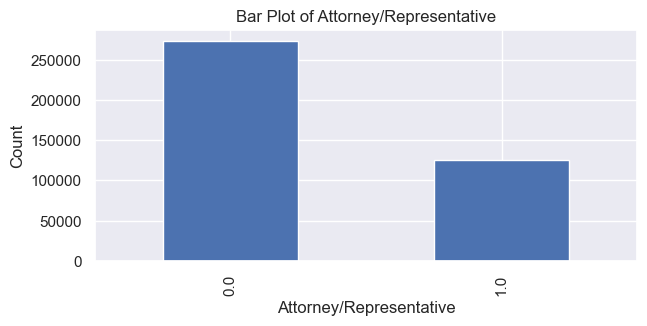

COVID-19 Indicator
float64


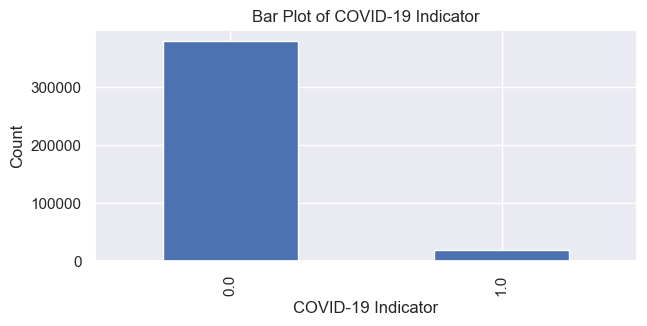

County of Injury
object


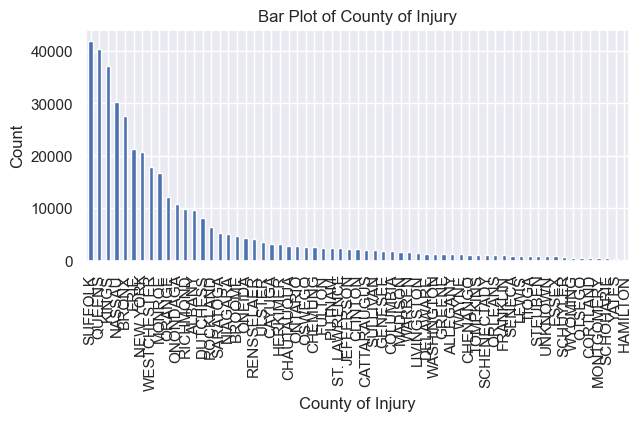

Carrier Type
object


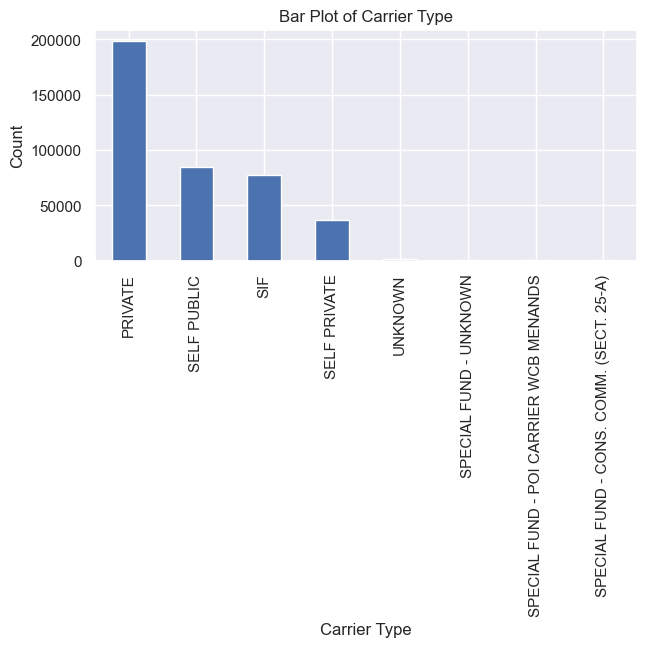

District Name
object


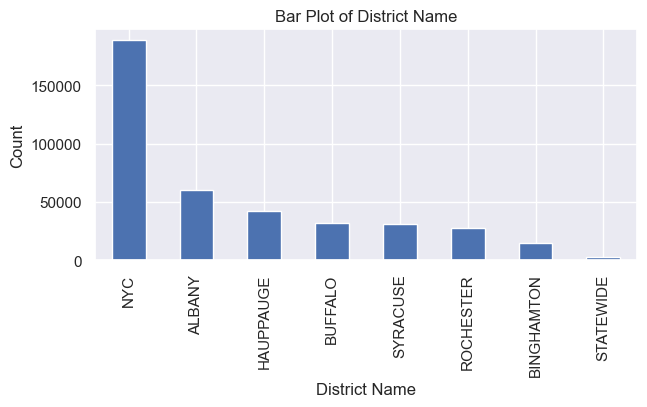

Gender
object


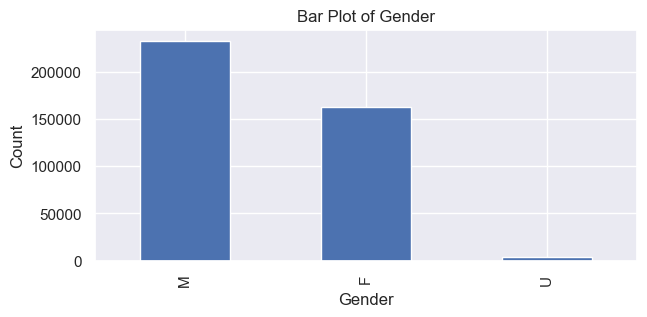

Medical Fee Region
object


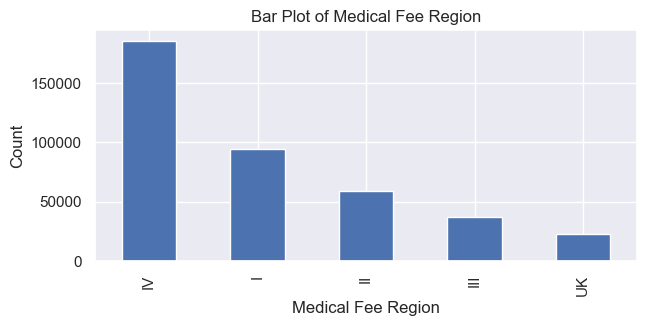

In [137]:
for feature in features_categorical:
    print(feature)
    print(X_train_processed[feature].dtype)
    X_train_processed[feature].value_counts().plot(kind='bar', figsize=(7, 3))
    plt.title(f'Bar Plot of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.show()

### 1. Attorney/Representative
Most cases do not have an attorney or representative involved (0).
Cases with attorney/representative involvement (1) are fewer but still significant.
This could be a factor in the complexity or severity of the case.

### 2. COVID-19 Indicator
The vast majority of records do not have the COVID-19 indicator marked (0).
Only a minimal amount (1) has this indicator, reflecting cases potentially affected by COVID-19.

### 3. County of Injury
The distribution of injuries across counties is highly uneven.
Some counties (e.g., SUFFOLK and NYC) show a much higher count than others, possibly reflecting population density or workplace concentration.
Counties with few entries could be combined to prevent sparsity issues in further analysis.

### 4. Carrier Type
The majority of carriers are private, followed by self-public and SIF.
There are a few specific types, such as UNKNOWN and SPECIAL FUND, with lower frequencies.
The private carrier type dominance may be significant in understanding claim patterns.

### 5. District Name
NYC has the highest number of claims by a large margin, followed by ALBANY and other regions.
This distribution suggests that urban areas like NYC have a higher frequency of incidents.
Lesser-known districts could be grouped to manage sparsity.

### 6. Gender
The gender distribution shows a higher frequency of male (M) entries, followed by female (F).
There is also a small category marked with an empty or undefined gender, which may need addressing.
The imbalance could impact analyses related to gender if not properly managed.


### 7. Medical Fee Region
Region IV has the highest number of entries, followed by '-', '=', and '≡'.
There's a small number marked as 'UK' (Unknown), which may require imputation or separate handling.
The distribution across regions could correlate with regional policies or practices in medical fees.



# 6. Feature Engineering <a class="anchor" id="chapter6"></a>

Feature engineering is the process of preparing data for machine learning models by transforming raw data into meaningful features that enhance model performance. In this section, we create, select, and modify variables to capture significant patterns within the data, making it more informative and useful for the model’s learning process. Through these transformations, we aim to improve the model’s accuracy and effectiveness.

## 6.1. Carrier-District Interaction <a class="anchor" id="section_6_1"></a>
Combining **Carrier Type** with **District Name** may reveal regional preferences for certain insurance carriers, which could be useful in understanding regional biases or regulations.

In [138]:
# Creating a new feature by combining Carrier Type and District Name
X_train_processed['Carrier_District_Interaction'] = X_train_processed['Carrier Type'] + "_" + X_train_processed['District Name']

# Apply to the val set
X_val_processed['Carrier_District_Interaction'] = X_val_processed['Carrier Type'] + "_" + X_val_processed['District Name']

# Apply to the test set
df_test_processed['Carrier_District_Interaction'] = df_test_processed['Carrier Type'] + "_" + df_test_processed['District Name']

## 6.2. Income Category  <a class="anchor" id="section_6_2"></a>

Creating categories for **Average Weekly Wage** can simplify the continuous nature of income into meaningful segments such as Low, Average, and High, which could help the model understand different socioeconomic statuses.

In [139]:
# Calculate key percentiles
percentiles = X_train_processed['Average Weekly Wage'].quantile([0.25, 0.5, 0.75, 0.9])
print(percentiles)

0.25     865.022500
0.50    1197.862575
0.75    1530.970000
0.90    1682.631004
Name: Average Weekly Wage, dtype: float64


In [140]:
# Defining the bins and labels for categorizing income based on percentiles
income_bins = [0, 865.022500, 1197.862575, 1530.970000, float('inf')]  # float('inf') allows us to set an open-ended range
income_labels = ['Low Income', 'Lower-Middle Income', 'Upper-Middle Income', 'High Income']

# Creating the new feature for income categories for the train set
X_train_processed['Income_Category'] = pd.cut(X_train_processed['Average Weekly Wage'], bins=income_bins, labels=income_labels)

# Apply to the val set
X_val_processed['Income_Category'] = pd.cut(X_val_processed['Average Weekly Wage'], bins=income_bins, labels=income_labels)

# Apply to the test set
df_test_processed['Income_Category'] = pd.cut(df_test_processed['Average Weekly Wage'], bins=income_bins, labels=income_labels)

After creating this categorical feature, we drop the original Average Weekly Wage column since it’s now represented by Income_Category.

In [141]:
# # Drop the 'Average Weekly Wage' column as it's represented by 'Income_Category'
# X_train_processed = X_train_processed.drop(columns=['Average Weekly Wage'])
# X_val_processed = X_val_processed.drop(columns=['Average Weekly Wage'])
# df_test_processed = df_test_processed.drop(columns=['Average Weekly Wage'])

## 6.3. Days_To_First_Hearing  <a class="anchor" id="section_6_3"></a>

The feature **Days_To_First_Hearing** was created to capture the number of days between the Accident Date and the First Hearing Date. If a First Hearing Date is available, the feature represents the time elapsed, which can help the model understand the speed of the claim process. If the First Hearing Date is missing, it is represented as 0, indicating that a hearing has not occurred yet. This approach provides more nuanced information than simply indicating whether the hearing occurred or not, allowing the model to learn from both the presence and timing of the first hearing.

In [142]:
# Define a function to calculate the number of days between 'Accident Date' and 'First Hearing Date'
def calculate_hearing_days(row):
    if pd.notna(row['First Hearing Date']):
        return (row['First Hearing Date'] - row['Accident Date']).days
    return 0  # If no hearing date exists, represent as 0

# Apply the function to create the new feature
X_train_copy['Days_To_First_Hearing'] = X_train_copy.apply(calculate_hearing_days, axis=1)
X_val_copy['Days_To_First_Hearing'] = X_val_copy.apply(calculate_hearing_days, axis=1)
df_test_copy['Days_To_First_Hearing'] = df_test_copy.apply(calculate_hearing_days, axis=1)

After creating this binary feature, we can drop the original First Hearing Date column from the training, validation, and test sets.

In [143]:
# Drop First Hearing Date from the train, val, and test sets
X_train_processed = X_train_processed.drop(columns=['First Hearing Date'])
X_val_processed = X_val_processed.drop(columns=['First Hearing Date'])
df_test_processed = df_test_processed.drop(columns=['First Hearing Date'])

## 6.4. Accident Quarter  <a class="anchor" id="section_6_4"></a>

Temporal data can often influence outcomes. Extracting the quarter of the accident (e.g., 1st, 2nd, etc.) helps the model capture seasonal patterns that may impact accidents.

In [144]:
# Extracting the quarter of the Accident Date
X_train_processed['Accident_Quarter'] = pd.to_datetime(X_train_processed['Accident Date'], errors='coerce').dt.quarter

# Apply to the val set
X_val_processed['Accident_Quarter'] = pd.to_datetime(X_val_processed['Accident Date'], errors='coerce').dt.quarter

# Apply to the test set
df_test_processed['Accident_Quarter'] = pd.to_datetime(df_test_processed['Accident Date'], errors='coerce').dt.quarter


## 6.5. Accident Year <a class="anchor" id="section_6_5"></a>
The year can help the model understand seasonal or yearly effects, like accident patterns during different times of the year.

In [145]:
# Extracting the year from the Accident Date
X_train_processed['Accident_Year'] = pd.to_datetime(X_train_processed['Accident Date'], errors='coerce').dt.year

# Apply to the val set
X_val_processed['Accident_Year'] = pd.to_datetime(X_val_processed['Accident Date'], errors='coerce').dt.year

# Apply to the test set
df_test_processed['Accident_Year'] = pd.to_datetime(df_test_processed['Accident Date'], errors='coerce').dt.year

## 6.6. Accident on Day and Weekend <a class="anchor" id="section_6_6"></a>

The day of the accident could be significant, as weekends might have different risk factors compared to weekdays. We will extract the day of the week and create a feature to indicate if the accident occurred on a weekend.

In [146]:
# Extracting the day of the week and creating a feature to indicate if the accident occurred on a weekend
X_train_processed['Accident Day'] = pd.to_datetime(X_train_processed['Accident Date'], errors='coerce').dt.dayofweek
X_train_processed['Accident on Weekend'] = X_train_processed['Accident Day'].apply(lambda x: 1 if x >= 5 else 0)

# Apply to the val set
X_val_processed['Accident Day'] = pd.to_datetime(X_val_processed['Accident Date'], errors='coerce').dt.dayofweek
X_val_processed['Accident on Weekend'] = X_val_processed['Accident Day'].apply(lambda x: 1 if x >= 5 else 0)

# Apply to the test set
df_test_processed['Accident Day'] = pd.to_datetime(df_test_processed['Accident Date'], errors='coerce').dt.dayofweek
df_test_processed['Accident on Weekend'] = df_test_processed['Accident Day'].apply(lambda x: 1 if x >= 5 else 0)


## 6.7. Age Group <a class="anchor" id="section_6_7"></a>
Grouping ages can help simplify the model’s understanding of different age demographics (e.g., Youth, Young Adult, Middle Age, Senior). This could potentially improve model interpretability and performance.

In [147]:
# Display unique values in 'Age at Injury' to understand the range
np.sort(X_train_processed['Age at Injury'].unique())

array([16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32,
       33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49,
       50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66,
       67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80])

In [148]:
# Creating bins and labels for age groups
age_bins = [0, 25, 45, 65, float('inf')]
age_labels = ['Youth', 'Young Adult', 'Middle Age', 'Senior']

# Creating a new feature for age groups
X_train_processed['Age Group'] = pd.cut(X_train_processed['Age at Injury'], bins=age_bins, labels=age_labels)

# Apply to the val set
X_val_processed['Age Group'] = pd.cut(X_val_processed['Age at Injury'], bins=age_bins, labels=age_labels)

# Apply to the test set
df_test_processed['Age Group'] = pd.cut(df_test_processed['Age at Injury'], bins=age_bins, labels=age_labels)

In [149]:
# # Drop 'Age at Injury' from the train, val and test set
# X_train_processed = X_train_processed.drop(columns=['Age at Injury'])
# X_val_processed = X_val_processed.drop(columns=['Age at Injury'])
# df_test_processed = df_test_processed.drop(columns=['Age at Injury'])

## 6.8. Promptness_category <a class="anchor" id="section_6_8"></a>

The `promptness_category` feature categorizes the time taken between key events in the claims process, specifically measuring the difference between the `Accident Date` and the `Assembly Date`. This feature quantifies the speed or delay in assembling the claim and provides insight into how promptly claims are processed.

In [150]:
def categorize_promptness(df, date1_col, date2_col, new_col_name):
    """
    Calculate and categorize promptness between two date columns.

    Parameters:
    - df: The DataFrame to process.
    - date1_col: The column representing the first date (e.g., Assembly Date).
    - date2_col: The column representing the second date (e.g., Accident Date).
    - new_col_name: The name of the new categorical column for promptness.

    Returns:
    - Updated DataFrame with new categorized promptness column.
    """
    # Calculate promptness in days and categorize it
    df[new_col_name] = pd.cut(
        (df[date1_col] - df[date2_col]).dt.days,
        bins=[0, 7, 14, 30, 90, 180, 365, float('inf')],
        labels=['Until 1 weeks', 'Between 1 and 2 weeks', 'Between 2 weeks and 1 month', 
                '1 to 3 months', '3 to 6 months', '6 months to 1 year', 'More than 1 year'],
        right=True
    )
    return df

# Apply the function to X_train_processed
X_train_processed = categorize_promptness(X_train_processed, 'Assembly Date', 'Accident Date', 'promptness_category')

# Apply the function to X_val_processed
X_val_processed = categorize_promptness(X_val_processed, 'Assembly Date', 'Accident Date', 'promptness_category')

# Apply the function to df_test_processed
df_test_processed = categorize_promptness(df_test_processed, 'Assembly Date', 'Accident Date', 'promptness_category')

In [151]:
# Display value counts for the new column
X_train_processed['promptness_category'].value_counts()

promptness_category
Until 1 weeks                  159574
Between 1 and 2 weeks           85035
Between 2 weeks and 1 month     67163
1 to 3 months                   49620
3 to 6 months                   15111
More than 1 year                 9520
6 months to 1 year               9287
Name: count, dtype: int64

These categories allow us to observe the promptness in claim processing, with the majority falling within Until 1 week, indicating a generally swift assembly of claims. However, a significant portion extends beyond a month, with a small subset taking more than a year. This feature can provide insights into patterns of delays or rapid processing, possibly indicating areas for improvement in claim management.

## 6.9. promptness_C2_category <a class="anchor" id="section_6_9"></a>
The "promptness_C2_category" feature tracks the time taken to register the C-2 Date (the receipt of the employer's report of work-related injury/illness) after the Accident Date. It evaluates employers' promptness in reporting accidents, offering insights into compliance and potential administrative delays.


In [152]:
# Count the number of rows where C-2 Date is earlier than Accident Date
num_negative_values = (X_train_processed['C-2 Date'] < X_train_processed['Accident Date']).sum()

# Print the number of rows with negative values
print(f"Number of rows where C-2 Date is earlier than Accident Date: {num_negative_values}")

Number of rows where C-2 Date is earlier than Accident Date: 0


In [153]:
# Apply the function to X_train_processed
X_train_processed = categorize_promptness(X_train_processed, 'C-2 Date', 'Accident Date', 'promptness_C2_category')

# Apply the function to X_val_processed
X_val_processed = categorize_promptness(X_val_processed, 'C-2 Date', 'Accident Date', 'promptness_C2_category')

# Apply the function to df_test_processed
df_test_processed = categorize_promptness(df_test_processed, 'C-2 Date', 'Accident Date', 'promptness_C2_category')


After creating new features based on the existing date columns, we will remove the original date features to avoid redundancy and simplify the dataset. We believe that the impact of these date features is adequately captured in the newly engineered features.

In [154]:
X_train_processed = X_train_processed.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date'])

#Apply to the val set
X_val_processed = X_val_processed.drop(columns=['Accident Date','Assembly Date', 'C-2 Date'])

# Apply to the test set
df_test_processed = df_test_processed.drop(columns=['Accident Date', 'Assembly Date', 'C-2 Date'])

## 6.10. Zip_Code_Simplified <a class="anchor" id="section_6_10"></a>

To reduce the dimensionality of the Zip Code feature, we will create a new feature called Zip_Code_Simplified. This feature will group all zip codes that appear less than 2,000 times in the training dataset into a category labeled as 'Other'. By doing this, we effectively reduce the number of unique zip codes, simplifying the model while retaining the most significant information.

In [155]:
# Print the most frequent Carrier Names along with their counts
most_frequent_zipcode = X_train_processed['Zip Code'].value_counts().head(25)  # Adjust the number if you need more
print("Most frequent Zip Codes with their counts:")
print(most_frequent_zipcode)

Most frequent Zip Codes with their counts:
Zip Code
11236    4169
11717    4076
11434    3885
11550    3102
10467    3049
10940    2666
10701    2379
10029    2222
14150    2136
10314    1982
11706    1963
11207    1861
14609    1854
11368    1853
11208    1820
11212    1816
12550    1786
12601    1776
11226    1756
11234    1627
10466    1614
11203    1608
10456    1530
10462    1523
11385    1521
Name: count, dtype: int64


In [156]:
# Create a new feature called 'Zip_Code_Simplified' based on 'Zip Code' for train, validation, and test sets
X_train_processed['Zip_Code_Simplified'] = X_train_processed['Zip Code']
X_val_processed['Zip_Code_Simplified'] = X_val_processed['Zip Code']
df_test_processed['Zip_Code_Simplified'] = df_test_processed['Zip Code']

# Identify carrier names that occur fewer than 1000 times in X_train_processed
zipcode_counts = X_train_processed['Zip Code'].value_counts()
zipcode_to_replace = zipcode_counts[zipcode_counts < 1000].index

# Replace carrier names with fewer than 1000 occurrences with 'OTHER' in all datasets using the identified carriers from X_train
for dataset in [X_train_processed, X_val_processed, df_test_processed]:
    dataset['Zip_Code_Simplified'] = dataset['Zip_Code_Simplified'].replace(zipcode_to_replace, 'OTHER')

# Print the counts of the simplified carrier names in X_train_processed to verify the result
print("Counts of 'Zip_Code_Simplified' feature in X_train_processed:")
print(X_train_processed['Zip_Code_Simplified'].value_counts())

Counts of 'Zip_Code_Simplified' feature in X_train_processed:
Zip_Code_Simplified
OTHER    282759
11236      4169
11717      4076
11434      3885
11550      3102
          ...  
14224      1014
11967      1013
11691      1009
10460      1004
14215      1001
Name: count, Length: 77, dtype: int64


In [157]:
# Display unique counts to compare the dimensionality reduction
print(f"Original ZIP Code uniqueness: {X_train_processed['Zip Code'].nunique()}")
print(f"Simplified ZIP Code uniqueness: {X_train_processed['Zip_Code_Simplified'].nunique()}")

Original ZIP Code uniqueness: 6885
Simplified ZIP Code uniqueness: 77


This transformation retains regional information while reducing the feature dimensionality, which can be beneficial for model interpretability and efficiency. The original Zip Code column has been removed to avoid redundancy. For this motive we will delete also the Zip Code, for now.

In [158]:
# X_train_processed = X_train_processed.drop(columns=['Zip Code'])
# # Apply to the val set
# X_val_processed = X_val_processed.drop(columns=['Zip Code'])
# # Apply to the test set
# df_test_processed = df_test_processed.drop(columns=['Zip Code'])

## 6.11. Carrier Type Merged <a class="anchor" id="section_6_11"></a>

Since there are several categories under "Special Fund" with very few occurrences, combining them into a single category can reduce noise in the data and make the feature more manageable for the model.

After merging, we observe the following distribution of Carrier Type Merged values in the training dataset:

In [159]:
# Creating a new feature that merges all 'Special Fund' categories into a single category for train, validation, and test sets
for dataset in [X_train_processed, X_val_processed, df_test_processed]:
    dataset['Carrier Type Merged'] = dataset['Carrier Type'].replace({
        'SPECIAL FUND - UNKNOWN': 'SPECIAL FUND',
        'SPECIAL FUND - POI CARRIER WCB MENANDS': 'SPECIAL FUND',
        'SPECIAL FUND - CONS. COMM. (SECT. 25-A)': 'SPECIAL FUND'
    })

# Verifying the updated column for X_train_processed
print(X_train_processed['Carrier Type Merged'].value_counts())

Carrier Type Merged
PRIVATE         198800
SELF PUBLIC      84894
SIF              77168
SELF PRIVATE     36441
UNKNOWN           1030
SPECIAL FUND       661
Name: count, dtype: int64


In [160]:
# # Now let's delete Carrier Type from the train, val and test set
# X_train_processed = X_train_processed.drop(columns=['Carrier Type'])
# # Apply to the val set
# X_val_processed = X_val_processed.drop(columns=['Carrier Type'])
# # Apply to the test set
# df_test_processed = df_test_processed.drop(columns=['Carrier Type'])

## 6.12. Carrier_Name_Simplified <a class="anchor" id="section_6_12"></a>

The 'Carrier Name' feature has high cardinality, with 1951 unique values. This level of uniqueness can complicate machine learning models, especially if some categories have very few instances. To simplify the analysis and potentially improve model performance, we will group carrier names with fewer than 500 occurrences under a single category called 'OTHER'.


In [161]:
# Print the most frequent Carrier Names along with their counts
most_frequent_carriers = X_train_processed['Carrier Name'].value_counts().head(25)  # Adjust the number if you need more
print("Most frequent Carrier Names with their counts:")
print(most_frequent_carriers)

Most frequent Carrier Names with their counts:
Carrier Name
STATE INSURANCE FUND             77168
POLICE, FIRE, SANITATION         14917
AMERICAN ZURICH INSURANCE CO     12107
CHARTER OAK FIRE INS CO          11975
INDEMNITY INS. OF N AMERICA      10057
SAFETY NATIONAL CASUALTY CORP     9738
NEW HAMPSHIRE INSURANCE CO        8924
LM INSURANCE CORP                 8533
A I U INSURANCE COMPANY           7733
INDEMNITY INSURANCE CO OF         6349
NYC TRANSIT AUTHORITY             5790
HARTFORD ACCIDENT & INDEMNITY     5299
NEW YORK BLACK CAR OPERATORS'     5067
ARCH INDEMNITY INSURANCE CO.      4644
AIU INSURANCE CO                  4491
CNY OTHER THAN ED, HED WATER      4430
HEALTH & HOSPITAL CORP.           3898
ARCH INDEMNITY INSURANCE CO       3723
PENNSYLVANIA MANUFACTURERS'       3383
PUBLIC EMPLOYERS RISK MGMT.       3220
ACE AMERICAN INSURANCE CO.        3159
OLD REPUBLIC INSURANCE CO.        3033
MEMIC INDEMNITY COMPANY           2898
WAL-MART ASSOCIATES, INC.         2757
COUN

In [162]:
# Create a new feature called 'Carrier_Name_Simplified' based on 'Carrier Name' for train, validation, and test sets
X_train_processed['Carrier_Name_Simplified'] = X_train_processed['Carrier Name']
X_val_processed['Carrier_Name_Simplified'] = X_val_processed['Carrier Name']
df_test_processed['Carrier_Name_Simplified'] = df_test_processed['Carrier Name']

# Identify carrier names that occur fewer than 500 times in X_train_processed
carrier_counts = X_train_processed['Carrier Name'].value_counts()
carriers_to_replace = carrier_counts[carrier_counts < 500].index

# Replace carrier names with fewer than 500 occurrences with 'OTHER' in all datasets using the identified carriers from X_train
for dataset in [X_train_processed, X_val_processed, df_test_processed]:
    dataset['Carrier_Name_Simplified'] = dataset['Carrier_Name_Simplified'].replace(carriers_to_replace, 'OTHER')

# Print the counts of the simplified carrier names in X_train_processed to verify the result
print("Counts of 'Carrier_Name_Simplified' feature in X_train_processed:")
print(X_train_processed['Carrier_Name_Simplified'].value_counts())

Counts of 'Carrier_Name_Simplified' feature in X_train_processed:
Carrier_Name_Simplified
OTHER                             85478
STATE INSURANCE FUND              77168
POLICE, FIRE, SANITATION          14917
AMERICAN ZURICH INSURANCE CO      12107
CHARTER OAK FIRE INS CO           11975
                                  ...  
NASSAU HEALTH CARE CORP.            520
EVEREST NATIONAL INS COMPANY        517
TRAVELERS INDEMNITY CO OF AMER      512
VISITING NURSE SERVICE OF NY        511
HARTFORD INSURANCE COMPANY          504
Name: count, Length: 105, dtype: int64


In [163]:
#print the number of unique values in the original 'Carrier Name' feature
print(f"Number of unique values in 'Carrier Name': {X_train_processed['Carrier Name'].nunique()}")

#print the number of unique values in the simplified 'Carrier_Name_Simplified' feature
print(f"Number of unique values in 'Carrier_Name_Simplified': {X_train_processed['Carrier_Name_Simplified'].nunique()}")

Number of unique values in 'Carrier Name': 1960
Number of unique values in 'Carrier_Name_Simplified': 105


In [164]:
# # Drop the 'Carrier Name' column after creating 'Carrier_Name_Simplified'
# X_train_processed = X_train_processed.drop(columns=['Carrier Name'])

# # Apply to the val set
# X_val_processed = X_val_processed.drop(columns=['Carrier Name'])

# # Apply to the test set
# df_test_processed = df_test_processed.drop(columns=['Carrier Name'])

## 6.13. Body_Part_Category <a class="anchor" id="section_6_13"></a>
The Body_Part_Category feature will group the WCIO_Part_of_Body_Code into broader categories. Based on the codes in your document, each range of codes represents a specific body part region (e.g., codes from 10 to 19 represent the head). We’ll map these codes to corresponding regions like “Head,” “Neck,” etc.

In [165]:
# Mapping of WCIO Part of Body codes to broader categories
part_of_body_mapping = {
    **dict.fromkeys(range(10, 20), 'Head'),
    **dict.fromkeys(range(20, 30), 'Neck'),
    **dict.fromkeys(range(30, 40), 'Upper Extremities'),
    **dict.fromkeys(range(40, 50), 'Trunk'),
    **dict.fromkeys(range(50, 60), 'Lower Extremities'),
    **dict.fromkeys([64, 65, 66, 90, 91, 99], 'Multiple Body Parts'),
    **dict.fromkeys([101], 'NonClassificable')

}

# Creating the Body_Part_Category column by mapping Part of Body codes to categories
X_train_processed['Body_Part_Category'] = X_train_processed['WCIO Part Of Body Code'].map(part_of_body_mapping)

#Apply to the val set
X_val_processed['Body_Part_Category'] = X_train_processed['WCIO Part Of Body Code'].map(part_of_body_mapping)

# Apply to the test set
df_test_processed['Body_Part_Category'] = df_test_processed['WCIO Part Of Body Code'].map(part_of_body_mapping)

## 6.14. Injury_Nature_Category <a class="anchor" id="section_6_14"></a>
The Body_Part_Category feature will group the WCIO_Part_of_Body_Code into broader categories. Based on the codes in the document, each range of codes represents a specific body part region (e.g., codes from 10 to 19 represent the head). We will map these codes to corresponding regions like "Head," "Neck," etc.

In [166]:
# Mapping of WCIO Nature of Injury codes to broader categories
nature_of_injury_mapping = {
    **dict.fromkeys([1], 'No Physical Injury'),
    **dict.fromkeys(range(2, 59), 'Specific Injury'),
    **dict.fromkeys(range(60, 80), 'Occupational Disease or Cumulative Injury'),
    **dict.fromkeys([90, 91], 'Multiple Injuries')
}

# Creating the Injury_Nature_Category column by mapping Nature of Injury codes to categories
X_train_processed['Injury_Nature_Category'] = X_train_processed['WCIO Nature of Injury Code'].map(nature_of_injury_mapping)

#Apply to the val set
X_val_processed['Injury_Nature_Category'] = X_val_processed['WCIO Nature of Injury Code'].map(nature_of_injury_mapping)

# Apply to the test set
df_test_processed['Injury_Nature_Category'] = df_test_processed['WCIO Nature of Injury Code'].map(nature_of_injury_mapping)


## 6.15. Injury_Cause_Category <a class="anchor" id="section_6_15"></a>
The Injury_Cause_Category feature will classify the WCIO_Cause_of_Injury_Code values into broader cause categories. For example, codes related to burns or scalds can be grouped together, as well as those for falls or motor vehicle accidents.

In [167]:
# Mapping of WCIO Cause of Injury codes to broader categories
cause_of_injury_mapping = {
    **dict.fromkeys(range(1, 10), 'Burn or Scald'),
    **dict.fromkeys(range(10, 20), 'Caught In, Under, or Between'),
    **dict.fromkeys(range(15, 20), 'Cut, Puncture, Scrape'),
    **dict.fromkeys(range(25, 35), 'Fall, Slip, or Trip'),
    **dict.fromkeys(range(40, 50), 'Motor Vehicle'),
    **dict.fromkeys(range(50, 70), 'Strain or Injury By'),
    **dict.fromkeys(range(70, 90), 'Striking Against or Stepping On'),
    **dict.fromkeys(range(90, 100), 'Miscellaneous Causes')
}

# Creating the Injury_Cause_Category column by mapping Cause of Injury codes to categories
X_train_processed['Injury_Cause_Category'] = X_train_processed['WCIO Cause of Injury Code'].map(cause_of_injury_mapping)

# Apply to the val set
X_val_processed['Injury_Cause_Category'] = X_val_processed['WCIO Cause of Injury Code'].map(cause_of_injury_mapping)

# Apply to the test set
df_test_processed['Injury_Cause_Category'] = df_test_processed['WCIO Cause of Injury Code'].map(cause_of_injury_mapping)


Since we have created new categorical features (Injury_Nature_Category, Body_Part_Category, Injury_Cause_Category) that provide a more meaningful representation of the original codes, it makes sense to remove the original code features. Keeping them would add redundancy, decrease interpretability, and unnecessarily increase the dimensionality of the dataset, potentially affecting model performance.

In [168]:
# # Removing the code features from train, validation, and test datasets
# X_train_processed = X_train_processed.drop(columns=[
#     'WCIO Cause of Injury Code',
#     'WCIO Nature of Injury Code',
#     'WCIO Part Of Body Code'
# ])

# X_val_processed = X_val_processed.drop(columns=[
#     'WCIO Cause of Injury Code',
#     'WCIO Nature of Injury Code',
#     'WCIO Part Of Body Code'
# ])

# df_test_processed = df_test_processed.drop(columns=[
#     'WCIO Cause of Injury Code',
#     'WCIO Nature of Injury Code',
#     'WCIO Part Of Body Code'
# ])

# 7. Feature Selection <a class="anchor" id="chapter7"></a>

The feature selection process involves summarizing the essential features in the dataset to help the model focus on the most relevant information. Here, we assess the categorical and numerical variables in `X_train_processed` by examining unique values, descriptive statistics, and verifying the correctness of categorical bins and continuous feature distributions.

The X_train_processed.describe(include='O').T command provides an overview of the categorical features in the dataset, displaying the count, unique values, top (most frequent) category, and its frequency. This summary helps us understand the distribution and cardinality of each categorical feature, which is essential for feature selection and preprocessing.

#### Descriptive Statistics for Categorical Features

In [169]:
# Displaying descriptive statistics for categorical features in the training dataset
X_train_processed.describe(include='O').T

count unique                   top    freq
Carrier Name                  398994   1960  STATE INSURANCE FUND   77168
Carrier Type                  398994      8               PRIVATE  198800
County of Injury              398994     63               SUFFOLK   41965
District Name                 398994      8                   NYC  188402
Gender                        398994      3                     M  232838
Medical Fee Region            398994      5                    IV  185033
Zip Code                      398994   6885                 11236    4169
Category Combination          398994     22             PRIVATE-M  115379
Carrier_District_Interaction  398994     52           PRIVATE_NYC   92172
Zip_Code_Simplified           398994     77                 OTHER  282759
Carrier Type Merged           398994      6               PRIVATE  198800
Carrier_Name_Simplified       398994    105                 OTHER   85478
Body_Part_Category            382273      7     Upper Extremities  124648
Injury_Nature_Category        353626      4       Specific Injury  332220
Injury_Cause_Category         398599      8   Strain or Injury By  117997

This table provides insight into the number of unique categories within each feature, assisting in identifying high-cardinality features that may need simplification or encoding before modeling.

The next output explores the Income_Category feature specifically, showing its categorical distribution across different income levels.

In [170]:
# Exploring the distribution of Income_Category
X_train_processed['Income_Category']

Claim Identifier
5479022             Low Income
6023025    Lower-Middle Income
5851908             Low Income
5913931    Lower-Middle Income
5845976    Upper-Middle Income
                  ...         
5655355             Low Income
5940234            High Income
6073417            High Income
5822576    Lower-Middle Income
5566085            High Income
Name: Income_Category, Length: 398994, dtype: category
Categories (4, object): ['Low Income' < 'Lower-Middle Income' < 'Upper-Middle Income' < 'High Income']

The `Income_Category` feature categorizes the `Average Weekly Wage` into four levels:
- **Low Income**
- **Lower-Middle Income**
- **Upper-Middle Income**
- **High Income**

This feature provides a socioeconomic context for the claims, allowing the model to account for income-based disparities in claims.

#### Descriptive Statistics for Numerical Features

In [171]:
X_train_processed.describe().T

count         mean         std          min  \
Age at Injury               398994.0    42.908502   12.927821         16.0   
Attorney/Representative     398994.0     0.315416    0.464682          0.0   
Average Weekly Wage         398994.0  1246.125215  7036.44445        17.41   
Birth Year                  398994.0  1977.938823   13.038683  1918.101209   
COVID-19 Indicator          398994.0     0.048058     0.21389          0.0   
IME-4 Count                 398994.0     0.747054     1.92857          0.0   
Industry Code               398994.0    58.553357   19.740185         11.0   
WCIO Cause of Injury Code   398994.0    54.455566   25.606069          1.0   
WCIO Nature of Injury Code  398994.0    41.251708   22.036754          1.0   
WCIO Part Of Body Code      398994.0    47.898392   22.887278         10.0   
Number of Dependents        398994.0     3.006654    2.000803          0.0   
Days_To_First_Hearing       398994.0    88.126303  265.409473       -433.0   
Accident_Quarter            398994.0     2.494311    1.124911          1.0   
Accident_Year               398994.0  2020.837614     1.81082       1961.0   
Accident Day                398994.0     2.515579    1.822475          0.0   
Accident on Weekend         398994.0     0.157471    0.364245          0.0   

                                 25%          50%      75%        max  
Age at Injury                   32.0         43.0     53.0       80.0  
Attorney/Representative          0.0          0.0      1.0        1.0  
Average Weekly Wage         865.0225  1197.862575  1530.97  2828079.0  
Birth Year                    1968.0  1978.101209   1988.0     2006.0  
COVID-19 Indicator               0.0          0.0      0.0        1.0  
IME-4 Count                      0.0          0.0      0.0       73.0  
Industry Code                   45.0         61.0     71.0       92.0  
WCIO Cause of Injury Code       31.0         56.0     75.0       99.0  
WCIO Nature of Injury Code      25.0         49.0     52.0       91.0  
WCIO Part Of Body Code          35.0         42.0     55.0      101.0  
Number of Dependents             1.0          3.0      5.0        6.0  
Days_To_First_Hearing            0.0          0.0     74.0    16373.0  
Accident_Quarter                 1.0          3.0      3.0        4.0  
Accident_Year                 2020.0       2021.0   2022.0     2023.0  
Accident Day                     1.0          2.0      4.0        6.0  
Accident on Weekend              0.0          0.0      0.0        1.0

These features provide comprehensive information across demographics, injury details, socioeconomics, and temporal aspects, making them well-suited to predicting claim outcomes.

In [172]:
X_train_processed.columns

Index(['Age at Injury', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'Carrier Name', 'Carrier Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Number of Dependents', 'Category Combination',
       'Carrier_District_Interaction', 'Income_Category',
       'Days_To_First_Hearing', 'Accident_Quarter', 'Accident_Year',
       'Accident Day', 'Accident on Weekend', 'Age Group',
       'promptness_category', 'promptness_C2_category', 'Zip_Code_Simplified',
       'Carrier Type Merged', 'Carrier_Name_Simplified', 'Body_Part_Category',
       'Injury_Nature_Category', 'Injury_Cause_Category'],
      dtype='object')

#### Analysis of `Age Group`

In [173]:
X_train_processed['Age Group']

Claim Identifier
5479022          Youth
6023025    Young Adult
5851908    Young Adult
5913931     Middle Age
5845976     Middle Age
              ...     
5655355         Senior
5940234    Young Adult
6073417     Middle Age
5822576    Young Adult
5566085    Young Adult
Name: Age Group, Length: 398994, dtype: category
Categories (4, object): ['Youth' < 'Young Adult' < 'Middle Age' < 'Senior']

This feature allows the model to understand age-related variations in claims, which could influence the type and nature of injuries.

This structured feature selection summary provides insights into the main features, both categorical and numerical, used in the model. The focus on grouping, simplification, and categorization ensures the model captures the relevant patterns without unnecessary complexity.

### Feature Categories
The features have been organized into three main categories: **Categorical Features**, **Binary Features**, and **Discrete Features**. Each category represents a different data type or structure, allowing for tailored preprocessing steps and analysis.

In [174]:
X_train_processed.columns

Index(['Age at Injury', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'Carrier Name', 'Carrier Type', 'County of Injury',
       'COVID-19 Indicator', 'District Name', 'Gender', 'IME-4 Count',
       'Industry Code', 'Medical Fee Region', 'WCIO Cause of Injury Code',
       'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Zip Code',
       'Number of Dependents', 'Category Combination',
       'Carrier_District_Interaction', 'Income_Category',
       'Days_To_First_Hearing', 'Accident_Quarter', 'Accident_Year',
       'Accident Day', 'Accident on Weekend', 'Age Group',
       'promptness_category', 'promptness_C2_category', 'Zip_Code_Simplified',
       'Carrier Type Merged', 'Carrier_Name_Simplified', 'Body_Part_Category',
       'Injury_Nature_Category', 'Injury_Cause_Category'],
      dtype='object')

In [175]:
# Define the feature categories
categorical_columns = [
    'Carrier_Name_Simplified','County of Injury', 
    'District Name', 'Gender', 'Medical Fee Region', 
    'Carrier_District_Interaction',
    'Zip_Code_Simplified', 'Carrier Type Merged','Income_Category','Age Group', 'Industry Code', 
    'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 
    'WCIO Part Of Body Code','Body_Part_Category',
    'Injury_Nature_Category', 'Injury_Cause_Category','promptness_category','promptness_C2_category','Carrier Name','Carrier Type',
    'Zip Code',
]

binary_columns = [
    'Attorney/Representative', 'COVID-19 Indicator',
     'Accident on Weekend'
]

discrete_columns = [ 'Number of Dependents', 'IME-4 Count',
    'Accident_Quarter', 'Accident_Year', 'Accident Day'
]

continuous_columns = ['Days_To_First_Hearing','Average Weekly Wage','Age at Injury']

# Printing the feature categories
print("Categorical Features:", categorical_columns)
print("Binary Features:", binary_columns)
print("Discrete Features:", discrete_columns)
print("Continuous Features:", continuous_columns)

Categorical Features: ['Carrier_Name_Simplified', 'County of Injury', 'District Name', 'Gender', 'Medical Fee Region', 'Carrier_District_Interaction', 'Zip_Code_Simplified', 'Carrier Type Merged', 'Income_Category', 'Age Group', 'Industry Code', 'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code', 'Body_Part_Category', 'Injury_Nature_Category', 'Injury_Cause_Category', 'promptness_category', 'promptness_C2_category', 'Carrier Name', 'Carrier Type', 'Zip Code']
Binary Features: ['Attorney/Representative', 'COVID-19 Indicator', 'Accident on Weekend']
Discrete Features: ['Number of Dependents', 'IME-4 Count', 'Accident_Quarter', 'Accident_Year', 'Accident Day']
Continuous Features: ['Days_To_First_Hearing', 'Average Weekly Wage', 'Age at Injury']


## 7.1. Preparing Data</b> <a class="anchor" id="section_7_1"></a>
### Converting Discrete Columns to Integer
In this step, we ensure all discrete columns are converted to integer data types across the training, validation, and test datasets. This is crucial for consistent data handling and processing in subsequent steps.

In [176]:
# Convert discrete columns to integer
for column in discrete_columns:
    X_train_processed[column] = X_train_processed[column].astype(int)
    X_val_processed[column] = X_val_processed[column].astype(int)
    df_test_processed[column] = df_test_processed[column].astype(int)

### Scaling Features
We apply the RobustScaler to the discrete columns. RobustScaler is beneficial for data containing outliers, as it scales data based on the median and interquartile range. This helps normalize the distribution without being heavily affected by outliers. We also use the same scaler to transform validation and test data.

In [177]:
#scaling features
# Usar robustscaler para dados que contêm outliers
# Usar minmaxscaler para dados que não têm outliers 
from sklearn.preprocessing import MinMaxScaler
feat_scaler = MinMaxScaler()
X_train_processed[discrete_columns + continuous_columns] = feat_scaler.fit_transform(X_train_processed[discrete_columns + continuous_columns])

X_train_num_scaled = X_train_processed[discrete_columns + continuous_columns]

#apply same transformation for val data
X_val_processed[discrete_columns + continuous_columns] = feat_scaler.transform(X_val_processed[discrete_columns + continuous_columns])

X_val_num_scaled = X_val_processed[discrete_columns + continuous_columns]

#apply same transformation for test data
df_test_processed[discrete_columns + continuous_columns] = feat_scaler.transform(df_test_processed[discrete_columns + continuous_columns])
df_test_num_scaled = df_test_processed[discrete_columns + continuous_columns]

#X_val, X_train
X_train_num_scaled

Number of Dependents  IME-4 Count  Accident_Quarter  \
Claim Identifier                                                        
5479022                       0.500000     0.000000          0.333333   
6023025                       0.333333     0.054795          0.333333   
5851908                       0.500000     0.027397          0.333333   
5913931                       0.166667     0.027397          0.000000   
5845976                       0.833333     0.000000          0.666667   
...                                ...          ...               ...   
5655355                       0.500000     0.000000          0.000000   
5940234                       0.500000     0.000000          0.000000   
6073417                       0.000000     0.027397          0.666667   
5822576                       1.000000     0.000000          0.666667   
5566085                       0.333333     0.000000          0.000000   

                  Accident_Year  Accident Day  Days_To_First_Hearing  \
Claim Identifier                                                       
5479022                0.951613      0.166667               0.025765   
6023025                0.983871      0.166667               0.032369   
5851908                0.967742      0.333333               0.065869   
5913931                0.983871      0.500000               0.042663   
5845976                0.967742      0.166667               0.025765   
...                         ...           ...                    ...   
5655355                0.967742      0.333333               0.025765   
5940234                0.983871      0.500000               0.025765   
6073417                0.983871      0.166667               0.025765   
5822576                0.967742      0.000000               0.025765   
5566085                0.951613      0.000000               0.025765   

                  Average Weekly Wage  Age at Injury  
Claim Identifier                                      
5479022                      0.000282       0.125000  
6023025                      0.000382       0.312500  
5851908                      0.000214       0.390625  
5913931                      0.000362       0.671875  
5845976                      0.000427       0.656250  
...                               ...            ...  
5655355                      0.000290       0.781250  
5940234                      0.000707       0.296875  
6073417                      0.000783       0.625000  
5822576                      0.000363       0.375000  
5566085                      0.000537       0.218750  

[398994 rows x 8 columns]

### Variance Check After Scaling
After scaling, we check the variance of each scaled feature to confirm that the features have been scaled properly. Lower variance after scaling indicates that data is normalized and less affected by magnitude differences.

In [178]:
# Check variance of scaled data
X_train_num_scaled.var()

Number of Dependents     0.111200
IME-4 Count              0.000698
Accident_Quarter         0.140603
Accident_Year            0.000853
Accident Day             0.092262
Days_To_First_Hearing    0.000249
Average Weekly Wage      0.000006
Age at Injury            0.040803
dtype: float64

The output shows the variance of each discrete column in the scaled training set. These values help validate that the scaling process has achieved a consistent data distribution across features.

 ## 7.2. Numerical Features</b> <a class="anchor" id="section_7_2"></a>

 > ### Spearman and Pearson correlation matrix <a class="anchor" id="sub_section_4_1_2"></a>

To better understand the relationships between numerical features, we generate Spearman and Pearson correlation matrices. Correlation matrices help identify linear and monotonic relationships between variables, which can be useful in feature selection and engineering.

#### Correlation Heatmap Function
The `cor_heatmap` function displays a heatmap of a given correlation matrix. We set various visual parameters to enhance readability:
- **figsize**: Sets the figure size.
- **cmap**: Chooses the color palette ('viridis').
- **mask**: Hides the upper triangle of the matrix for clarity.

In [179]:
def cor_heatmap(cor, name):
    plt.figure(figsize=(18,12))
    sns.heatmap(data = cor.round(2), annot = True, cmap = 'viridis', linecolor = 'white', linewidth=0.5, fmt='.2', mask=np.triu(cor, k=0))
    plt.title(f'{name} Correlation Matrix', fontdict = {'fontsize': 20})
    plt.show()

#### Spearman Correlation Calculation and Plotting
Here, we calculate the Spearman correlation on the scaled numerical features and then plot the resulting matrix.

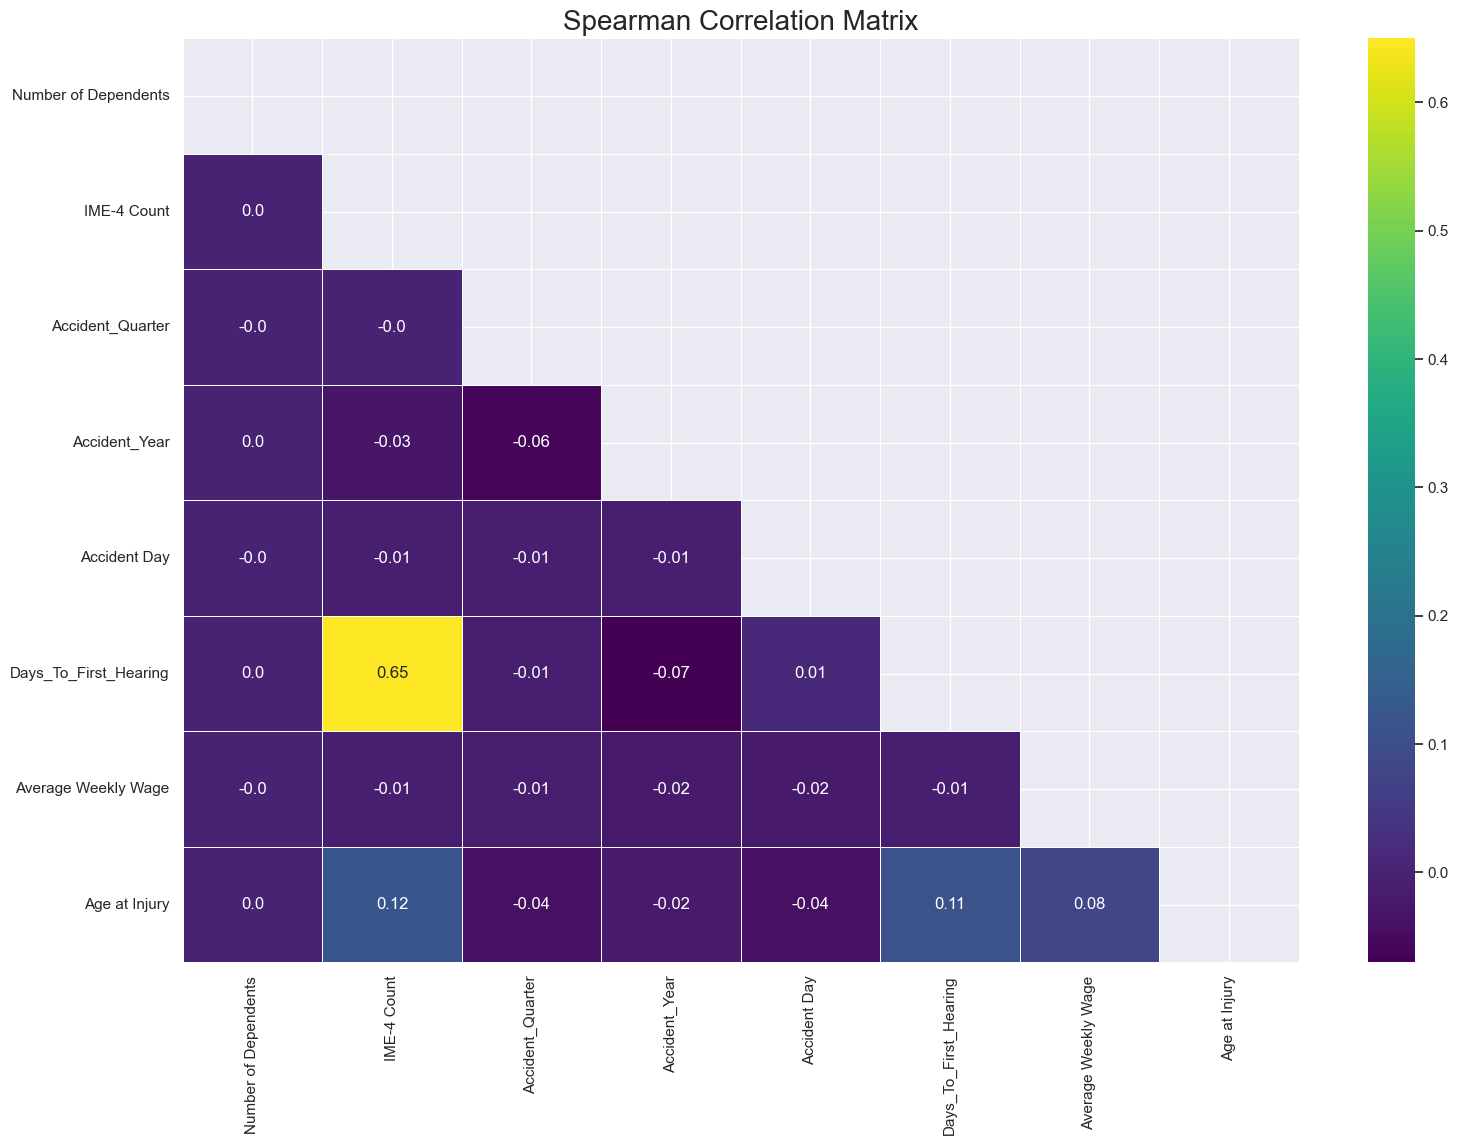

In [180]:
corr_data_numerical = X_train_num_scaled 
cor_spearman = corr_data_numerical.corr(method='spearman')

cor_heatmap(cor_spearman, 'Spearman')

 > ### LASSO Regression <a class="anchor" id="sub_section_4_1_3"></a>

 The LASSO (Least Absolute Shrinkage and Selection Operator) regression is used here for feature selection by fitting a model to the standardized dataset and analyzing the coefficients.

In [181]:
# Fit regression
reg = LassoCV().fit(X_train_num_scaled, y_train)
#get coefficients
coef = pd.Series(reg.coef_, index = X_train_num_scaled.columns)
# Sort coefficients to observe importance
coef.sort_values()

Accident_Quarter         -0.026669
Accident Day             -0.006709
Number of Dependents     -0.002406
Average Weekly Wage       0.000000
Age at Injury             0.296730
Accident_Year             0.595027
Days_To_First_Hearing    14.539121
IME-4 Count              16.108897
dtype: float64

**Observations:**

The LASSO model assigns non-zero coefficients only to the features it considers important.

IME-4 Count has the highest positive coefficient, indicating a strong positive relationship with the target variable, as well as Days_To_First_Hearing


Accident Day and Accident Quarter have smaller negative coefficients, implying a weaker inverse relationship with the target.

Average Weekly Wage and Number of Dependents has close to zero impact, suggesting it may not be a significant predictor in the model.

In [182]:
def plot_importance(coef, name):
    imp_coef = coef.sort_values()
    plt.figure(figsize=(3,5))
    imp_coef.plot(kind="barh", color="c")
    plt.title("Feature importance using " + name + " Model")
    plt.show()

This function generates a horizontal bar plot of the feature importance values derived from the LASSO model, helping to visualize which features are prioritized by the model.

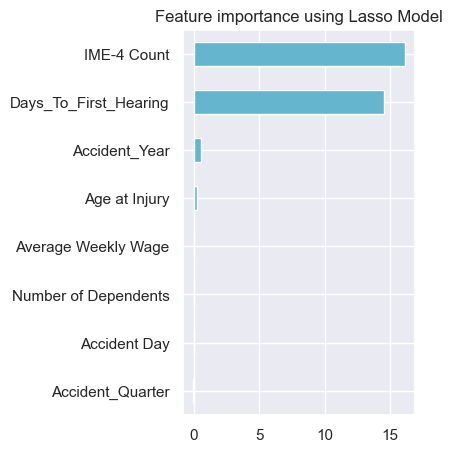

In [183]:
plot_importance(coef,'Lasso')

 > ### Recursive Feature Elimination - RFE <a class="anchor" id="sub_section_4_1_4"></a>

 RFE is employed here to further validate the important features as identified by LASSO. By sequentially removing the least important features, RFE helps to refine the feature set.

In [184]:
# List of columns used in RFE process
X_train_num_scaled.columns

Index(['Number of Dependents', 'IME-4 Count', 'Accident_Quarter',
       'Accident_Year', 'Accident Day', 'Days_To_First_Hearing',
       'Average Weekly Wage', 'Age at Injury'],
      dtype='object')

Observations:
The selected features after RFE likely overlap with those identified by LASSO, suggesting consistency in feature importance.
Using both LASSO and RFE provides a more robust feature selection by cross-validating the importance of individual features.

This block of code performs RFE to identify the best subset of features by iterating over a range of feature numbers. The code aims to maximize model performance on the validation set.

In [185]:
# Number of features
nof_list=np.arange(1,8)            
high_score=0

# Variable to store the optimum features
nof=0           
score_list =[]
for n in range(len(nof_list)):
    model = LogisticRegression()
    rfe = RFE(model,n_features_to_select = nof_list[n])
    X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
    X_val_rfe = rfe.transform(X_val_num_scaled)
    model.fit(X_train_rfe,y_train)
    
    score = model.score(X_val_rfe,y_val)
    score_list.append(score)
    
    if(score>high_score):
        high_score = score
        nof = nof_list[n]
        
print("Optimum number of features: %d" %nof)
print("Score with %d features: %f" % (nof, high_score))

KeyboardInterrupt: 

**Observations:**

The loop evaluates models with 1 to 3 features, tracking the score for each.

The output indicates that 3 features yielded the highest validation score of 0.623391.

### Applying RFE with the Optimal Number of Features
Once the optimal number of features is identified, the RFE model is finalized with this configuration.

In [186]:
#rfscv- to select 1st the number of features we should select
model = LogisticRegression()
rfe = RFE(estimator = model, n_features_to_select = 3)

In [187]:
X_rfe= rfe.fit_transform(X=X_train_num_scaled, y=y_train)

This shows the results of the feature selection process, listing the features selected by RFE. The code snippet confirms which features were selected as relevant by the RFE model and displays them in a boolean Series, where True indicates the feature was selected and False means it was not.

In [188]:
selected_features = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
selected_features

Number of Dependents     False
IME-4 Count               True
Accident_Quarter         False
Accident_Year             True
Accident Day             False
Days_To_First_Hearing     True
Average Weekly Wage      False
Age at Injury            False
dtype: bool

### RFE with SVM will be left to run during days since it takes a lot of time we decided to leave the code and run after

In [189]:
# #no of features
# nof_list=np.arange(1,8)            
# high_score=0
# #Variable to store the optimum features
# nof=0           
# train_score_list =[]
# val_score_list = []

# for n in range(len(nof_list)):
#     #call support vector machines classifier
#     model = SVC(kernel = 'linear')
    
#     #create RFE instance
#     rfe = RFE(estimator = model,n_features_to_select = nof_list[n])
    
#     #fit and transform for training data, transform for val data
#     X_train_rfe = rfe.fit_transform(X_train_num_scaled,y_train)
#     X_val_rfe = rfe.transform(X_val_num_scaled)
    
#     model.fit(X_train_rfe,y_train)
    
#     #storing results on training data
#     train_score = model.score(X_train_rfe,y_train)
#     train_score_list.append(train_score)
    
#     #storing results on training data
#     val_score = model.score(X_val_rfe,y_val)
#     val_score_list.append(val_score)
    
#     #check best score
#     if(val_score > high_score):
#         high_score = val_score
#         nof = nof_list[n]
        
#         #adding mention of variables to keep
#         features_to_select = pd.Series(rfe.support_, index = X_train_num_scaled.columns)
        
# print("Optimum number of features: %d" %nof)
# print("Score with %d features: %f" % (nof, high_score))
# print(f"Features to select: \n{features_to_select}")

## 7.3. Categorical Features</b> <a class="anchor" id="section_7_3"></a>
Chi-squared and MIC for the categorical ones.

 > ### $\chi ^2$ Test for Independence <a class="anchor" id="sub_section_4_2_1"></a>

 We'll apply the Chi-squared test on categorical features to check for independence. This test is suitable for categorical data and helps identify features that have significant associations with the target variable.

In [190]:
binary_columns

['Attorney/Representative', 'COVID-19 Indicator', 'Accident on Weekend']

In [191]:
#To make sure that we keep the preprocessed dataset without the encoded columns
X_train_processed_copy = X_train_processed.copy()
X_val_processed_copy = X_val_processed.copy()
df_test_processed_copy = df_test_processed.copy()

### At first: Encoding Categorical Features with LabelEncoder
We encode categorical features using LabelEncoder, noting that unseen labels in the validation and test sets are replaced with "Unknown." This approach is a compromise to manage high cardinality without drastically increasing feature dimensionality.

In [192]:
# from sklearn.preprocessing import LabelEncoder

# ## for now lets use label encoder but that does not makes much more sense because we dont have an order... we need to use one hot encoder byt it will increase the dimensionality of the data

# # Initialize a LabelEncoder
# label_encoders = {}

# # Apply LabelEncoder to each categorical column in training and then transform validation and test datasets
# for col in categorical_columns:
#     le = LabelEncoder()
    
#     # Fit LabelEncoder on the training data
#     X_train_processed[col] = le.fit_transform(X_train_processed[col])
    
#     # Handle unseen labels in validation and test data
#     # Add an "Unknown" label to classes to handle unseen labels
#     le.classes_ = np.append(le.classes_, 'Unknown')

#     # Replace unseen labels in validation and test data with 'Unknown'
#     X_val_processed[col] = X_val_processed[col].apply(lambda x: x if x in le.classes_ else 'Unknown')
#     df_test_processed[col] = df_test_processed[col].apply(lambda x: x if x in le.classes_ else 'Unknown')

#     # Transform validation and test datasets using the fitted label encoder
#     X_val_processed[col] = le.transform(X_val_processed[col])
#     df_test_processed[col] = le.transform(df_test_processed[col])

#     # Store the label encoder for future use if needed
#     label_encoders[col] = le

### Second approach: Encoding Categorical Features with LabelEncoder, OneHotEncoder and Frequency encoder
As our second approach we decided to perform different type of encoding according with each categorical variable. For ordinal features (those with an inherent order like age groups), Label Encoding is applied to assign each category a unique numerical value. For nominal features with low cardinality (few unique values), One-Hot Encoding is used to create binary columns representing each category. For high-cardinality features (many unique values like zip codes), Frequency Encoding is applied to convert categories to their frequency of occurrence, reducing dimensionality without introducing too many columns.

These encoding methods are used to properly represent categorical features in a numerical format while considering their characteristics (order or cardinality), which helps models interpret them effectively.

In [194]:
# Import necessary libraries
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Example columns to encode
ordinal_features = ['promptness_category', 'promptness_C2_category', 'Age Group', 'Income_Category']
low_cardinality_cols = ['Gender', 'District Name', 'Medical Fee Region']
high_cardinality_cols = ['Carrier_Name_Simplified', 'Zip_Code_Simplified', 'Industry Code', 'County of Injury', 
                         'WCIO Cause of Injury Code', 'WCIO Nature of Injury Code', 'WCIO Part Of Body Code']

# Step 1: Label Encode ordinal features (features that have an intrinsic order)
label_encoder_1 = LabelEncoder()
for col in ordinal_features:
    X_train_processed_copy[col] = label_encoder_1.fit_transform(X_train_processed_copy[col])
    X_val_processed_copy[col] = label_encoder_1.transform(X_val_processed_copy[col])
    df_test_processed_copy[col] = label_encoder_1.transform(df_test_processed_copy[col])

# Step 2: One-Hot Encode low-cardinality nominal features
one_hot_encoder = OneHotEncoder(drop='first', sparse_output=False)  # drop='first' to avoid multicollinearity
one_hot_encoded_train = one_hot_encoder.fit_transform(X_train_processed_copy[low_cardinality_cols])
one_hot_encoded_val = one_hot_encoder.transform(X_val_processed_copy[low_cardinality_cols])
one_hot_encoded_test = one_hot_encoder.transform(df_test_processed_copy[low_cardinality_cols])

# Convert the one-hot encoded arrays back to DataFrame
one_hot_encoded_train_df = pd.DataFrame(one_hot_encoded_train, columns=one_hot_encoder.get_feature_names_out(), index=X_train_processed_copy.index)
one_hot_encoded_val_df = pd.DataFrame(one_hot_encoded_val, columns=one_hot_encoder.get_feature_names_out(), index=X_val_processed_copy.index)
one_hot_encoded_test_df = pd.DataFrame(one_hot_encoded_test, columns=one_hot_encoder.get_feature_names_out(), index=df_test_processed_copy.index)

# Concatenate the original datasets with the one-hot encoded columns
X_train_processed_copy = pd.concat([X_train_processed_copy, one_hot_encoded_train_df], axis=1)
X_val_processed_copy = pd.concat([X_val_processed_copy, one_hot_encoded_val_df], axis=1)
df_test_processed_copy = pd.concat([df_test_processed_copy, one_hot_encoded_test_df], axis=1)

# Drop the original low-cardinality nominal columns after encoding them
X_train_processed_copy.drop(columns=low_cardinality_cols, inplace=True)
X_val_processed_copy.drop(columns=low_cardinality_cols, inplace=True)
df_test_processed_copy.drop(columns=low_cardinality_cols, inplace=True)

# Step 3: Frequency Encoding for high-cardinality nominal features
for col in high_cardinality_cols:
    freq = X_train_processed_copy[col].value_counts()  # Fit on training set only
    X_train_processed_copy[col + '_freq'] = X_train_processed_copy[col].map(freq)
    X_val_processed_copy[col + '_freq'] = X_val_processed_copy[col].map(freq)
    df_test_processed_copy[col + '_freq'] = df_test_processed_copy[col].map(freq)

# Drop the original high-cardinality columns after encoding them
X_train_processed_copy.drop(columns=high_cardinality_cols, inplace=True)
X_val_processed_copy.drop(columns=high_cardinality_cols, inplace=True)
df_test_processed_copy.drop(columns=high_cardinality_cols, inplace=True)

# Final datasets after encoding
X_train_final = X_train_processed_copy
X_val_final = X_val_processed_copy
X_test_final = df_test_processed_copy

# Summary
print("Encoded X_train_final columns:", X_train_final.columns)
print("Encoded X_val_final columns:", X_val_final.columns)
print("Encoded X_test_final columns:", X_test_final.columns)


Encoded X_train_final columns: Index(['Age at Injury', 'Attorney/Representative', 'Average Weekly Wage',
       'Birth Year', 'Carrier Name', 'Carrier Type', 'COVID-19 Indicator',
       'IME-4 Count', 'Zip Code', 'Number of Dependents',
       'Category Combination', 'Carrier_District_Interaction',
       'Income_Category', 'Days_To_First_Hearing', 'Accident_Quarter',
       'Accident_Year', 'Accident Day', 'Accident on Weekend', 'Age Group',
       'promptness_category', 'promptness_C2_category', 'Carrier Type Merged',
       'Body_Part_Category', 'Injury_Nature_Category', 'Injury_Cause_Category',
       'Gender_M', 'Gender_U', 'District Name_BINGHAMTON',
       'District Name_BUFFALO', 'District Name_HAUPPAUGE', 'District Name_NYC',
       'District Name_ROCHESTER', 'District Name_STATEWIDE',
       'District Name_SYRACUSE', 'Medical Fee Region_II',
       'Medical Fee Region_III', 'Medical Fee Region_IV',
       'Medical Fee Region_UK', 'Carrier_Name_Simplified_freq',
       'Zip_C

### Why Are There Missing Values (NaN) in Validation and Test Sets?

During the encoding process, missing values (NaN) may appear in the validation and test sets because certain categories that exist in these sets might not be present in the training set. For instance, during frequency encoding, if a category exists only in the validation or test set but not in the training set, it will result in missing values when encoding those rows.

To address this, we can fill these missing values with a placeholder such as `0`, ensuring consistent feature representation across all datasets, for now. For next deliverable we will try to implement better approaches.

In [195]:
# To handle this, we will fill the missing values with 0 for now.
X_val_final.fillna(0, inplace=True)
X_test_final.fillna(0, inplace=True)

In [196]:
# Step 4: Prepare final dataset for MIC and χ² analysis
# Use only the encoded features for the MIC and chi-squared tests
mic_chi2_features = binary_columns + ordinal_features + list(one_hot_encoded_train_df.columns) + [f"{col}_freq" for col in high_cardinality_cols]
X_train_mic_chi2 = X_train_processed_copy[mic_chi2_features]

In [197]:
len(X_train_mic_chi2.columns)

27

In [198]:
X_train_mic_chi2.columns

Index(['Attorney/Representative', 'COVID-19 Indicator', 'Accident on Weekend',
       'promptness_category', 'promptness_C2_category', 'Age Group',
       'Income_Category', 'Gender_M', 'Gender_U', 'District Name_BINGHAMTON',
       'District Name_BUFFALO', 'District Name_HAUPPAUGE', 'District Name_NYC',
       'District Name_ROCHESTER', 'District Name_STATEWIDE',
       'District Name_SYRACUSE', 'Medical Fee Region_II',
       'Medical Fee Region_III', 'Medical Fee Region_IV',
       'Medical Fee Region_UK', 'Carrier_Name_Simplified_freq',
       'Zip_Code_Simplified_freq', 'Industry Code_freq',
       'County of Injury_freq', 'WCIO Cause of Injury Code_freq',
       'WCIO Nature of Injury Code_freq', 'WCIO Part Of Body Code_freq'],
      dtype='object')

In [199]:
X_train_final.shape

(398994, 45)

In [200]:
X_val_final.shape

(172208, 45)

In [201]:
X_test_final.shape

(387975, 44)

#### Chi-Squared Test for Feature Selection
The Chi-squared test helps us identify the most relevant categorical and binary features by evaluating their independence with the target variable. In this analysis, we set a threshold to keep the 25 most relevant features.

In [202]:
#Chi-square test
threshold = 20 #we want to only keep the 20 most relevant features
high_score_features_chi2 = []
scores = []
names_Chi2 = []

feature_scores = SelectKBest(chi2, k=threshold).fit(X_train_mic_chi2,y_train).scores_

high_score_features = []
for score, f_name in sorted(zip(feature_scores,X_train_mic_chi2.columns), reverse=True)[:threshold]:
        high_score_features_chi2.append(f_name)
        scores.append(score)
        names_Chi2.append(f_name)

In [203]:
names_Chi2
# high_score_features_chi2  # Output the list of selected top features

['WCIO Nature of Injury Code_freq',
 'WCIO Part Of Body Code_freq',
 'WCIO Cause of Injury Code_freq',
 'Zip_Code_Simplified_freq',
 'Carrier_Name_Simplified_freq',
 'Industry Code_freq',
 'County of Injury_freq',
 'Attorney/Representative',
 'Income_Category',
 'promptness_C2_category',
 'promptness_category',
 'Age Group',
 'COVID-19 Indicator',
 'Gender_M',
 'District Name_HAUPPAUGE',
 'District Name_STATEWIDE',
 'District Name_NYC',
 'Medical Fee Region_IV',
 'District Name_BINGHAMTON',
 'District Name_ROCHESTER']

> ### Mutual Information Criterion (MIC) for Feature Selection <a class="anchor" id="sub_section_4_2_2"></a>

The Mutual Information Criterion is used to measure the dependence between each feature and the target variable. By setting a threshold, we retain only the most relevant features.

In [204]:
 #MIC 
# Set the threshold for the top features to select
threshold = 20
high_score_features_MIC = []
scores = []
names_MIC = []

# Apply mutual information criterion
feature_scores = mutual_info_classif(X_train_mic_chi2, y_train, random_state=42)

# Sort and select the top features
for score, f_name in sorted(zip(feature_scores, X_train_mic_chi2.columns), reverse=True)[:threshold]:
    high_score_features_MIC.append(f_name)
    scores.append(score)
    names_MIC.append(f_name)
    
# Display the list of selected top features by MIC
names_MIC

['Attorney/Representative',
 'WCIO Nature of Injury Code_freq',
 'WCIO Part Of Body Code_freq',
 'WCIO Cause of Injury Code_freq',
 'Carrier_Name_Simplified_freq',
 'Industry Code_freq',
 'Income_Category',
 'Zip_Code_Simplified_freq',
 'promptness_C2_category',
 'Gender_M',
 'promptness_category',
 'District Name_NYC',
 'Medical Fee Region_IV',
 'Age Group',
 'County of Injury_freq',
 'COVID-19 Indicator',
 'District Name_BINGHAMTON',
 'District Name_HAUPPAUGE',
 'Accident on Weekend',
 'Medical Fee Region_II']

### Intersection of Selected Features by Chi-squared and MIC
To identify the most relevant categorical features, we take the intersection of features selected by both Chi-squared and MIC methods.

In [205]:
# Find common features between Chi-squared and MIC selections
common_categorical_features = list(set(names_Chi2).intersection(set(names_MIC)))
features_selected = common_categorical_features  # Final list of selected features
features_selected  # Display the list of intersected features

['Zip_Code_Simplified_freq',
 'County of Injury_freq',
 'District Name_BINGHAMTON',
 'Gender_M',
 'Income_Category',
 'Medical Fee Region_IV',
 'District Name_HAUPPAUGE',
 'Age Group',
 'COVID-19 Indicator',
 'WCIO Nature of Injury Code_freq',
 'Carrier_Name_Simplified_freq',
 'Industry Code_freq',
 'promptness_category',
 'promptness_C2_category',
 'WCIO Cause of Injury Code_freq',
 'Attorney/Representative',
 'District Name_NYC',
 'WCIO Part Of Body Code_freq']

## 7.4. Final Features</b> <a class="anchor" id="section_7_4"></a>



| Predictor             | Spearman | Lasso   | RFE LR   | RFE SVM | What to do? (One possible way to "solve")        |
|-----------------------|----------|---------|----------|---------|--------------------------------------------------|
| Number of Dependents  | Discard  | Discard | Discard  |         | Discard                                          |
| IME-4 Count           | Keep     | Keep    | Keep     |         | Include in the model                             |
| Accident_Quarter      | Keep  | Discard | Discard  |         | Discard                                          |
| Accident_Year         | Keep     | Keep    | Keep     |         | Include in the model                             |
| Accident Day          | Keep  | Discard | Discard  |         | Discard                                          |
| Days_To_First_Hearing | Keep     | Keep    | Keep     |         | Include in the model                             |
| Average Weekly Wage   | Keep  | Discard    | Discard  |         | Discard                 |


In [206]:
final_features = [
    # Categorical features selected through MIC and chi2
    'WCIO Cause of Injury Code_freq',
    'County of Injury_freq',
    'District Name_HAUPPAUGE',
    'Zip_Code_Simplified_freq',
    'COVID-19 Indicator',
    'Age Group',
    'WCIO Part Of Body Code_freq',
    'Carrier_Name_Simplified_freq',
    'WCIO Nature of Injury Code_freq',
    'promptness_C2_category',
    'promptness_category',
    'Gender_M',
    'District Name_BINGHAMTON',
    'District Name_NYC',
    'Medical Fee Region_IV',
    'Attorney/Representative',
    'Income_Category',
    'Industry Code_freq',
    # Important numerical features
    'IME-4 Count',
    'Accident_Year',
    'Days_To_First_Hearing'
]


# Extracting the final features from the processed datasets
X_train_final = X_train_processed_copy[final_features]
X_val_final = X_val_processed_copy[final_features]
X_test_final = df_test_processed_copy[final_features]

# Print the shape of the final datasets to confirm consistency
print(f"X_train_final shape: {X_train_final.shape}")
print(f"X_val_final shape: {X_val_final.shape}")
print(f"X_test_final shape: {X_test_final.shape}")

X_train_final shape: (398994, 21)
X_val_final shape: (172208, 21)
X_test_final shape: (387975, 21)


### 4. Build a Simple Model and Assess Performance
#### Problem Type and Model Selection
The problem we are dealing with is a classification problem since our goal is to predict the type of variable claim injury as our target variable. As it is a categorical variable we decided to try algorithms like Logistic Regression, Random Forest, XGBoost and other classification models. To start, a simple logistic regression was built due to its interpretability and ease of use. Moreover, it supports an effective starting point for further analysis and comparison against more complex models.

#### Cross-Validation for Performance Assessment
In order to assess the model’s performance we decided to use cross validation. This technique ensures a reliable evaluation by divding our data into multiple folds and having training/testing the model on different subsets. This really helps to avoid overfitting (which was a problem that from the beginning we identify we had) and provides a comprehensive view of how well the model generalizes to unseen data.

#### Metrics for Evaluation
For model evaluation we look into some metrics like:
Precision, Recall, and F1-Score given that our target variable is claim injury type, and the dataset has an imbalanced class distributions. 
Precision tells us how many of the predicted positive instances are actually positive, while recall shows how many of the actual positives were correctly predicted. **F1 Score* provides a balance between precision and recall, which is crucial when handling imbalanced data.
Even though accuracy can provide a general idea of overall correctness, it is not our main focus due to the class imbalance. Relying solely on accuracy could give misleading insights, as it may be high even if the model is not performing well on minority classes

With these metrics we ensure a global evaluation of the model, especially considering the facts above mentioned such as imbalanced dataset and helps guiding model improvement effectively.


# 8. Modeling <a class="anchor" id="chapter8"></a>

In [207]:
# Define a function to print metrics and plot a colorful confusion matrix
def metrics(y_train, pred_train, y_val, pred_val):
    # Print classification report for training data
    print('___________________________________________________________________________________________________________')
    print('                                                     TRAIN                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_train, pred_train))
    train_cm = confusion_matrix(y_train, pred_train)
    print(train_cm)
    
    # Plot confusion matrix for training data
    plt.figure(figsize=(10, 4))
    plt.subplot(1, 2, 1)
    sns.heatmap(train_cm, annot=True, cmap='Blues', fmt='d', cbar=False)
    plt.title('Training Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Print classification report for validation data
    print('___________________________________________________________________________________________________________')
    print('                                                VALIDATION                                                 ')
    print('-----------------------------------------------------------------------------------------------------------')
    print(classification_report(y_val, pred_val))
    val_cm = confusion_matrix(y_val, pred_val)
    print(val_cm)

    # Plot confusion matrix for validation data
    plt.subplot(1, 2, 2)
    sns.heatmap(val_cm, annot=True, cmap='Oranges', fmt='d', cbar=False)
    plt.title('Validation Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    
    # Show the plots
    plt.tight_layout()
    plt.show()


> ## Logistic Regression

### **Standard Scaler**

Logistic Regression Metrics:
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.48      0.11      0.18      7255
           1       0.69      0.95      0.80    202442
           2       0.33      0.01      0.02     48224
           3       0.54      0.53      0.54    103933
           4       0.42      0.19      0.26     33795
           5       0.14      0.00      0.00      2948
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00       329

    accuracy                           0.64    398994
   macro avg       0.33      0.22      0.23    398994
weighted avg       0.58      0.64      0.57    3989

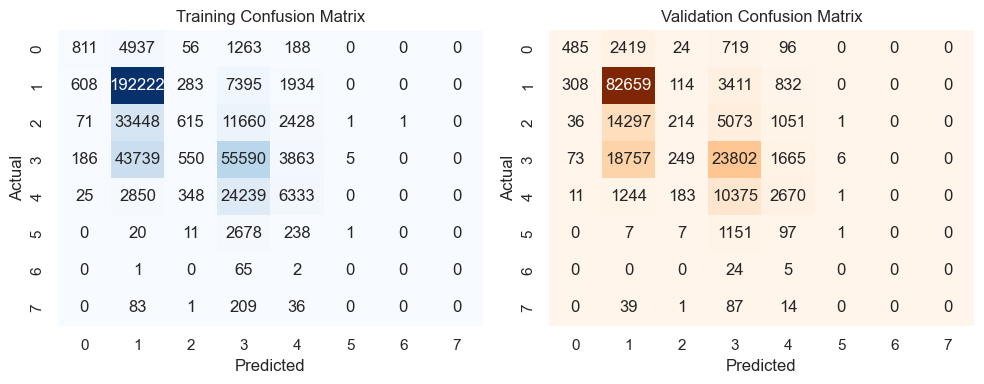

In [240]:
# Scale features
scaler = StandardScaler()
final_features_X_train_scaled_std = scaler.fit_transform(X_train_final)
final_features_X_val_scaled_std = scaler.transform(X_val_final)
final_features_df_test_scaled_std = scaler.transform(X_test_final)

# Logistic Regression Model
log_reg_std = LogisticRegression(max_iter=1000, random_state=42)
log_reg_std.fit(final_features_X_train_scaled_std, y_train)
pred_train_log_final_std = log_reg_std.predict(final_features_X_train_scaled_std)
pred_val_log_final_std = log_reg_std.predict(final_features_X_val_scaled_std)

# Metrics for Logistic Regression
print("Logistic Regression Metrics:")
metrics(y_train, pred_train_log_final_std, y_val, pred_val_log_final_std)

In [209]:
# Predict on the test set with the best model
y_test_pred_best_std = log_reg_std.predict(final_features_df_test_scaled_std)

# Decode the predictions 
y_test_pred_best_decoded_std = label_encoder.inverse_transform(y_test_pred_best_std)

# Prepare the submission DataFrame
test_predictions_df_log_std = pd.DataFrame({
    'Claim Identifier': X_test_final.index, 
    'Claim Injury Type': y_test_pred_best_decoded_std  
})

In [210]:
# Save to CSV for Kaggle
test_predictions_df_log_std.to_csv('kaggle_submission_predictions_log_std.csv', index=False)

### **Min Max Scaler**

Logistic Regression Metrics:
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.52      0.09      0.16      7255
           1       0.69      0.94      0.80    202442
           2       0.32      0.01      0.01     48224
           3       0.53      0.54      0.53    103933
           4       0.41      0.19      0.26     33795
           5       0.00      0.00      0.00      2948
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00       329

    accuracy                           0.64    398994
   macro avg       0.31      0.22      0.22    398994
weighted avg       0.57      0.64      0.57    3989

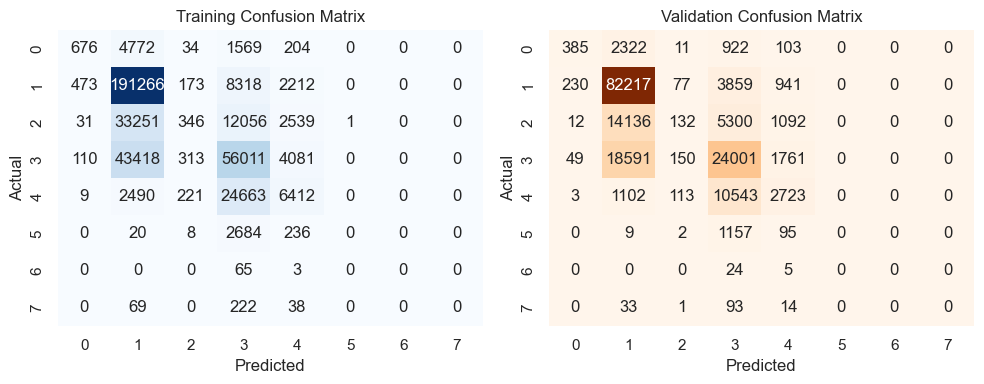

In [211]:
# Scale features
scaler = MinMaxScaler()
final_features_X_train_scaled_minmax = scaler.fit_transform(X_train_final)
final_features_X_val_scaled_minmax = scaler.transform(X_val_final)
final_features_df_test_scaled_minmax = scaler.transform(X_test_final)

# Logistic Regression Model
log_reg_minmax = LogisticRegression(max_iter=1000, random_state=42)
log_reg_minmax.fit(final_features_X_train_scaled_minmax, y_train)
pred_train_log_final_minmax = log_reg_minmax.predict(final_features_X_train_scaled_minmax)
pred_val_log_final_minmax = log_reg_minmax.predict(final_features_X_val_scaled_minmax)

# Metrics for Logistic Regression
print("Logistic Regression Metrics:")
metrics(y_train, pred_train_log_final_minmax, y_val, pred_val_log_final_minmax)

In [212]:
# Predict on the test set with the best model
y_test_pred_best_minmax = log_reg_minmax.predict(final_features_df_test_scaled_minmax)

# Decode the predictions 
y_test_pred_best_decoded_minmax = label_encoder.inverse_transform(y_test_pred_best_minmax)

# Prepare the submission DataFrame
test_predictions_df_log_minmax = pd.DataFrame({
    'Claim Identifier': X_test_final.index, 
    'Claim Injury Type': y_test_pred_best_decoded_minmax  
})

In [213]:
# Save to CSV for Kaggle
test_predictions_df_log_minmax.to_csv('kaggle_submission_predictions_log_minmax.csv', index=False)

### **Robust Scaler**

Logistic Regression Metrics:
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.51      0.09      0.16      7255
           1       0.70      0.95      0.80    202442
           2       0.33      0.01      0.02     48224
           3       0.53      0.54      0.53    103933
           4       0.41      0.19      0.26     33795
           5       0.00      0.00      0.00      2948
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00       329

    accuracy                           0.64    398994
   macro avg       0.31      0.22      0.22    398994
weighted avg       0.58      0.64      0.57    3989

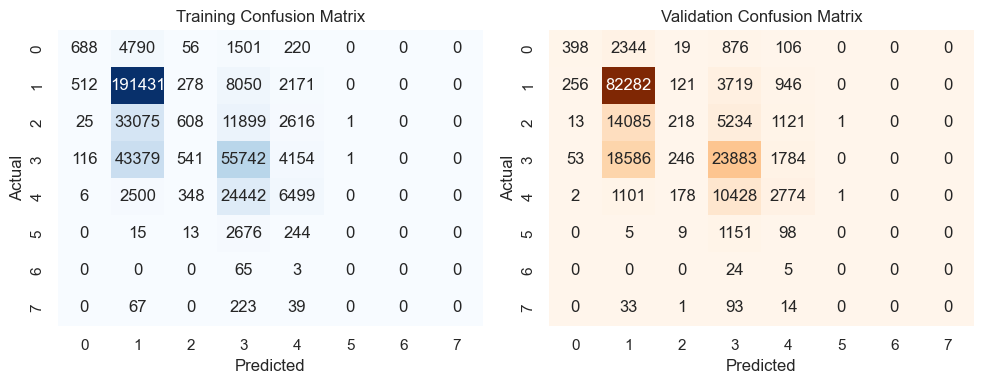

In [214]:
# Scale features
scaler = RobustScaler()
final_features_X_train_scaled_rob = scaler.fit_transform(X_train_final)
final_features_X_val_scaled_rob = scaler.transform(X_val_final)
final_features_df_test_scaled_rob = scaler.transform(X_test_final)

# Logistic Regression Model
log_reg_rob = LogisticRegression(max_iter=1000, random_state=42)
log_reg_rob.fit(final_features_X_train_scaled_rob, y_train)
pred_train_log_final_rob = log_reg_rob.predict(final_features_X_train_scaled_rob)
pred_val_log_final_rob = log_reg_rob.predict(final_features_X_val_scaled_rob)

# Metrics for Logistic Regression
print("Logistic Regression Metrics:")
metrics(y_train, pred_train_log_final_rob, y_val, pred_val_log_final_rob)

In [215]:
# Predict on the test set with the best model
y_test_pred_best_rob = log_reg_rob.predict(final_features_df_test_scaled_rob)

# Decode the predictions 
y_test_pred_best_decoded_rob = label_encoder.inverse_transform(y_test_pred_best_rob)

# Prepare the submission DataFrame
test_predictions_df_log_rob  = pd.DataFrame({
    'Claim Identifier': X_test_final.index, 
    'Claim Injury Type': y_test_pred_best_decoded_rob  
})

In [216]:
# Save to CSV for Kaggle
test_predictions_df_log_rob.to_csv('kaggle_submission_predictions_log_rob.csv', index=False)

##### Train test Split
| Model Name | Scaler | Resampling Technique | F1 Score (Train)| F1 Score (Validation)| Kaggle Score |
|------------|-------------|----------------------|------------------|-----------------------|--------------|
| Logistic Regression | Standard | None  |        0.23       |           0.23          |     0.22619   |
| Logistic Regression | MinMax | None  |         0.22         |          0.22            |     0.21721          |
| Logistic Regression  | Robust | None   |        0.22         |          0.22           |      0.22046      |


> ## KNN
1. Simple KNN Model
### **Standard Scaler**


K-Nearest Neighbors Metrics:
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.38      0.47      7255
           1       0.75      0.95      0.84    202442
           2       0.51      0.18      0.27     48224
           3       0.69      0.63      0.66    103933
           4       0.69      0.51      0.59     33795
           5       0.62      0.03      0.05      2948
           6       0.00      0.00      0.00        68
           7       0.50      0.02      0.04       329

    accuracy                           0.72    398994
   macro avg       0.55      0.34      0.36    398994
weighted avg       0.70      0.72      0.69    398

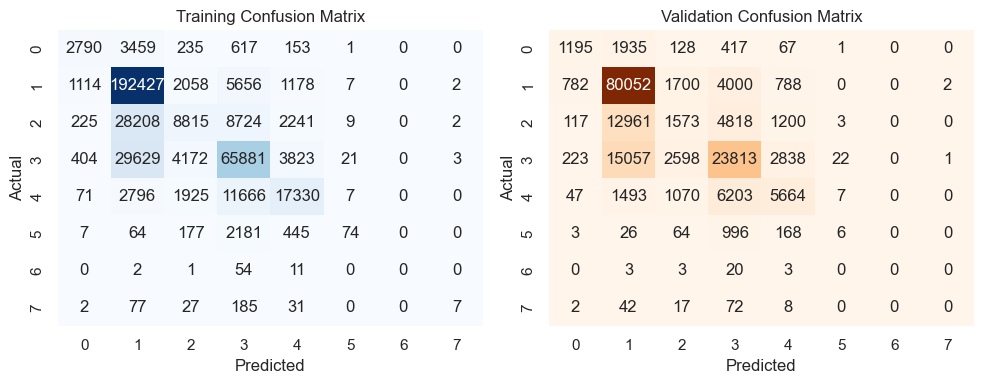

In [217]:
# K-Nearest Neighbors Model
knn_std = KNeighborsClassifier(n_neighbors=6)
knn_std.fit(final_features_X_train_scaled_std, y_train)
pred_train_knn_final_std = knn_std.predict(final_features_X_train_scaled_std)
pred_val_knn_final_std = knn_std.predict(final_features_X_val_scaled_std)

# Metrics for K-Nearest Neighbors
print("\nK-Nearest Neighbors Metrics:")
metrics(y_train, pred_train_knn_final_std, y_val, pred_val_knn_final_std)

In [218]:
# Predict on the test set with the best model
y_test_pred_best_knn_std = knn_std.predict(final_features_df_test_scaled_std)

# Decode the predictions 
y_test_pred_best_decoded_knn_std = label_encoder.inverse_transform(y_test_pred_best_knn_std)

# Prepare the submission DataFrame
test_predictions_knn_std = pd.DataFrame({
    'Claim Identifier': X_test_final.index, 
    'Claim Injury Type': y_test_pred_best_decoded_knn_std 
})

In [219]:
# Save to CSV for Kaggle
test_predictions_knn_std.to_csv('kaggle_submission_predictions_knn_std.csv', index=False)

In [237]:
test_predictions_knn_std.to_csv('/Users/peresgoncalo/Documents/Mestrado/C.U./ML/Project/project_data/SubmissionsGP/kaggle_submission_predictions_knn_std.csv', index=False)


KNN Standard Scaler CV

K-Nearest Neighbors Cross-Validation Scores: [0.64743919 0.65027131 0.64857956 0.65119864 0.65154515]
Mean Cross-Validation Score for K-Nearest Neighbors: 0.6498067683684043

K-Nearest Neighbors Metrics:
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.60      0.38      0.47      7255
           1       0.75      0.95      0.84    202442
           2       0.51      0.18      0.27     48224
           3       0.69      0.63      0.66    103933
           4       0.69      0.51      0.59     33795
           5       0.62      0.03      0.05      2948
           6       0.00      0.00      0.00        68
           7       0.50      0.02      

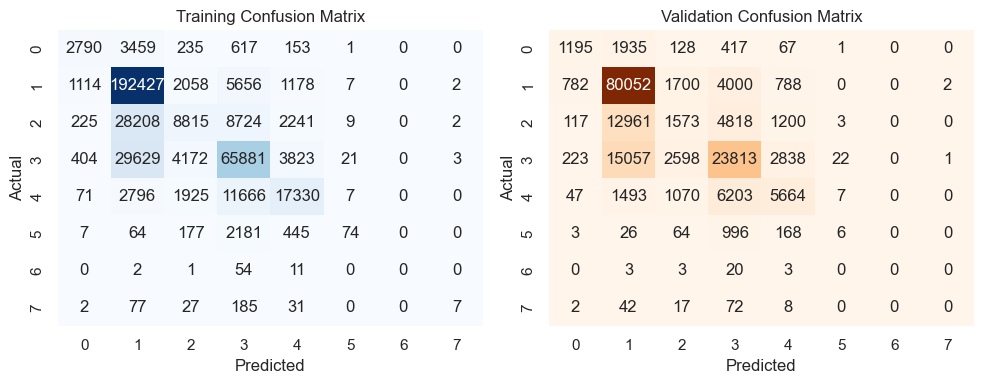

In [244]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score, KFold

# Initialize the KNN model with 6 neighbors
knn_std = KNeighborsClassifier(n_neighbors=6)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation for KNN
cv_scores_knn = cross_val_score(knn_std, final_features_X_train_scaled_std, y_train, cv=kf, scoring='accuracy')

# Print cross-validation results
print("K-Nearest Neighbors Cross-Validation Scores:", cv_scores_knn)
print("Mean Cross-Validation Score for K-Nearest Neighbors:", cv_scores_knn.mean())

# Fit the KNN model on the full training data after cross-validation
knn_std.fit(final_features_X_train_scaled_std, y_train)

# Calculate metrics for training and validation sets
pred_train_knn_final_std = knn_std.predict(final_features_X_train_scaled_std)
pred_val_knn_final_std = knn_std.predict(final_features_X_val_scaled_std)

# Metrics for K-Nearest Neighbors
print("\nK-Nearest Neighbors Metrics:")
metrics(y_train, pred_train_knn_final_std, y_val, pred_val_knn_final_std)

# Predict on the test set with the trained model
y_test_pred_best_knn_std = knn_std.predict(final_features_df_test_scaled_std)

# Decode the predictions
y_test_pred_best_decoded_knn_std = label_encoder.inverse_transform(y_test_pred_best_knn_std)

# Prepare the submission DataFrame
test_predictions_knn_std = pd.DataFrame({
    'Claim Identifier': X_test_final.index, 
    'Claim Injury Type': y_test_pred_best_decoded_knn_std 
})

# Save the submission to a CSV file
test_predictions_knn_std.to_csv('/Users/peresgoncalo/Documents/Mestrado/C.U./ML/Project/project_data/SubmissionsGP/kaggle_submission_predictions_knn_std_cv.csv', index=False)


##### Train test Split
| Model Name | Scaler | Resampling Technique | F1 Score (Train)| F1 Score (Validation)| Kaggle Score |
|------------|-------------|----------------------|------------------|-----------------------|--------------|
| KNN  | Standard | None  |               |                 |        |
| KNN | MinMax | None  |              |                    |      |
| KNN  | Robust | None   |                  |                       |             |

2. KNN with KD-Tree as algorithm


K-Nearest Neighbors (KD-Tree) Metrics:
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7255
           1       1.00      1.00      1.00    202442
           2       1.00      0.99      0.99     48224
           3       1.00      1.00      1.00    103933
           4       1.00      1.00      1.00     33795
           5       1.00      1.00      1.00      2948
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00       329

    accuracy                           1.00    398994
   macro avg       1.00      1.00      1.00    398994
weighted avg       1.00      1.00      1

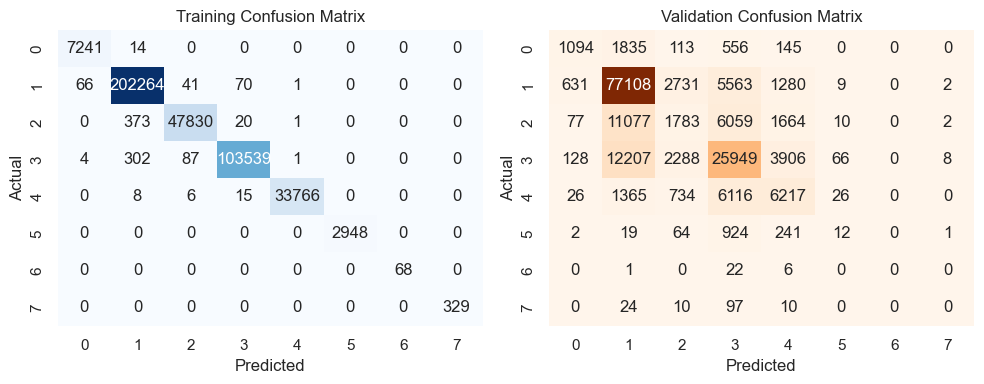

In [242]:
# # K-Nearest Neighbors Model with KD-Tree
knn_kd_tree = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='kd_tree')
knn_kd_tree.fit(final_features_X_train_scaled_rob, y_train)
pred_train_knn_final_kd = knn_kd_tree.predict(final_features_X_train_scaled_rob)
pred_val_knn_final_kd = knn_kd_tree.predict(final_features_X_val_scaled_rob)

# # Metrics for K-Nearest Neighbors using KD-Tree
print("\nK-Nearest Neighbors (KD-Tree) Metrics:")
metrics(y_train, pred_train_knn_final_kd, y_val, pred_val_knn_final_kd)

In [243]:
# Predict on the test set with the best model
y_test_pred_knn_kd_tree = knn_kd_tree.predict(final_features_df_test_scaled_rob) 

# # Decode the predictions if necessary
y_test_pred_knn_kd_tree = label_encoder.inverse_transform(y_test_pred_knn_kd_tree)

# # Prepare the submission DataFrame
test_predictions_knn_kd_tree = pd.DataFrame({
     'Claim Identifier': final_features_df_test_scaled_rob.index, 
     'Claim Injury Type': y_test_pred_knn_kd_tree  
 })

AttributeError: 'numpy.ndarray' object has no attribute 'index'

In [222]:
 test_predictions_knn_kd_tree.head(3)  

In [223]:
# # Save to CSV for Kaggle
 test_predictions_knn_kd_tree.to_csv('/Users/peresgoncalo/Documents/Mestrado/C.U./ML/Project/project_data/SubmissionsGP/predictions_knn_kd_tree.csv', index=False)

3. KNN with Brute as algorithm


K-Nearest Neighbors (KD-Tree) Metrics:
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      7255
           1       1.00      1.00      1.00    202442
           2       1.00      0.99      0.99     48224
           3       1.00      1.00      1.00    103933
           4       1.00      1.00      1.00     33795
           5       1.00      1.00      1.00      2948
           6       1.00      1.00      1.00        68
           7       1.00      1.00      1.00       329

    accuracy                           1.00    398994
   macro avg       1.00      1.00      1.00    398994
weighted avg       1.00      1.00      1

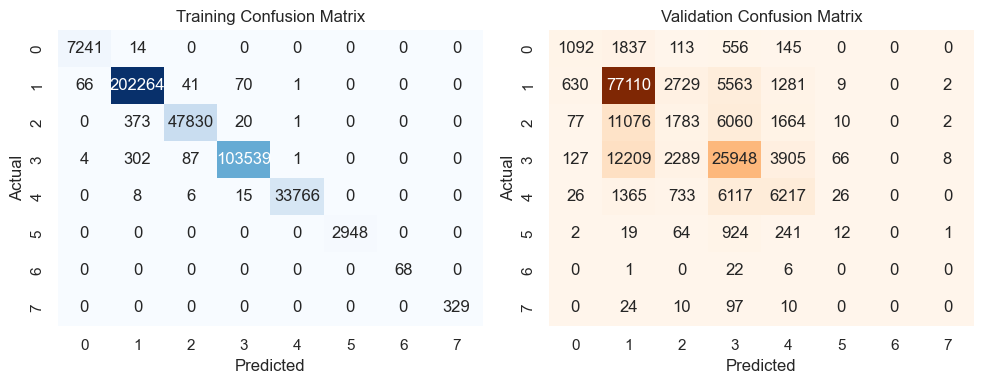

In [245]:
# # K-Nearest Neighbors Model with KD-Tree
knn_brute = KNeighborsClassifier(n_neighbors=7, weights='distance', algorithm='brute')
knn_brute.fit(final_features_X_train_scaled_rob, y_train)
pred_train_knn_final_brute = knn_brute.predict(final_features_X_train_scaled_rob)
pred_val_knn_final_brute = knn_brute.predict(final_features_X_val_scaled_rob)

# # Metrics for K-Nearest Neighbors using KD-Tree
print("\nK-Nearest Neighbors (KD-Tree) Metrics:")
metrics(y_train, pred_train_knn_final_brute, y_val, pred_val_knn_final_brute)

In [225]:
# # Predict on the test set with the best model
y_test_pred_knn_brute = knn_brute.predict(final_features_df_test_scaled_rob) #subs for log_reg_smote

# # Decode the predictions if necessary
y_test_pred_knn_brute = label_encoder.inverse_transform(y_test_pred_knn_brute)

# # Prepare the submission DataFrame
test_predictions_knn_brute = pd.DataFrame({
     'Claim Identifier': final_features_df_test_scaled_rob.index, 
     'Claim Injury Type': y_test_pred_knn_brute  
 })

In [226]:
# Save to CSV for Kaggle
 test_predictions_knn_brute.to_csv('/Users/peresgoncalo/Documents/Mestrado/C.U./ML/Project/project_data/SubmissionsGP/predictions_knn_brute.csv', index=False)

| Model Name               | Split Method     | F1 Score (Train) | F1 Score (Validation) | Kaggle Score |
|--------------------------|------------------|------------------|-----------------------|--------------|
| K-Nearest Neighbors -  kd_tree   | Train-Test Split |             |                  |          |
| K-Nearest Neighbors - brute   | Train-Test Split |             |                  |          |
| K-Nearest Neighbors (KNN)     | Train-Test Split |             |                  |          |


> ### Decision Trees 

In [227]:
# # Decision Tree Model
# dt_std = DecisionTreeClassifier(random_state=42)

# # Fit model with final features
# dt_std.fit(final_features_X_train_scaled_std, y_train)
# y_pred_dt_final = dt_std.predict(final_features_X_val_scaled_std)

# # Metrics for Decision Tree
# dt_std.fit(final_features_X_train_scaled_std, y_train)
# pred_train_dt_final_std = dt_std.predict(final_features_X_train_scaled_std)
# pred_val_dt_final_std = dt_std.predict(final_features_X_val_scaled_std)
# metrics(y_train, pred_train_dt_final_std, y_val, pred_val_dt_final_std)

In [228]:
# # Predict on the test set with the best model
# y_test_pred_best_dt_std = dt_std.predict(final_features_df_test_scaled_std)

# # Decode the predictions if necessary
# y_test_pred_best_decoded_dt_std = label_encoder.inverse_transform(y_test_pred_best_dt_std)

# # Prepare the submission DataFrame
# test_predictions_dt_std = pd.DataFrame({
#     'Claim Identifier': X_test_final.index, 
#     'Claim Injury Type': y_test_pred_best_decoded_dt_std  
# })

In [229]:
# # Save to CSV for Kaggle
# test_predictions_dt_std.to_csv('kaggle_submission_predictions_dt_std.csv', index=False)

Fit Decision Tree model with pruning parameters for final features and potential value features since we have overfitting

In [230]:
# # Pruned Decision Tree Classifier
# pruned_dt_std = DecisionTreeClassifier(random_state=42, max_depth=5, min_samples_split =150, min_samples_leaf=150)

# # Fit pruned Decision Tree model with final features and calculate metrics for training and validation
# pruned_dt_std.fit(final_features_X_train_scaled_std, y_train)
# pred_train_pruned_dt_std = pruned_dt_std.predict(final_features_X_train_scaled_std)
# pred_val_pruned_dt_std = pruned_dt_std.predict(final_features_X_val_scaled_std)
# metrics(y_train, pred_train_pruned_dt_std, y_val, pred_val_pruned_dt_std)

In [231]:
# # Predict on the test set with the best model
# y_test_pred_pruned_dt_std = dt_std.predict(final_features_df_test_scaled_std)

# # Decode the predictions if necessary
# y_test_pred_best_decoded_pruned_dt_std = label_encoder.inverse_transform(y_test_pred_pruned_dt_std)

# # Prepare the submission DataFrame
# test_predictions_pruned_dt_std = pd.DataFrame({
#     'Claim Identifier': final_features_df_test.index, 
#     'Claim Injury Type': y_test_pred_best_decoded_pruned_dt_std  
# })

In [232]:
# # Save to CSV for Kaggle
# test_predictions_pruned_dt_std.to_csv('kaggle_submission_predictions_pruned_dt_std.csv', index=False)

| Model Name | Scaler | Resampling Technique | F1 Score (Train)| F1 Score (Validation)| Kaggle Score |
|------------|-------------|----------------------|------------------|-----------------------|--------------|
| Decision Tree  | Standard | None  |             |               |        |
| Pruned Decision Tree | Standard | None  |              |                    |      |


> ## Random forest

Cross-validation scores: [0.64845424 0.65451948 0.65362974 0.65276507 0.6541768 ]
Mean cross-validation score: 0.6527090669727601
___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7255
           1       0.69      0.96      0.80    202442
           2       0.00      0.00      0.00     48224
           3       0.55      0.57      0.56    103933
           4       0.81      0.18      0.30     33795
           5       0.00      0.00      0.00      2948
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00       329

    accuracy                           0.65    398994
   m

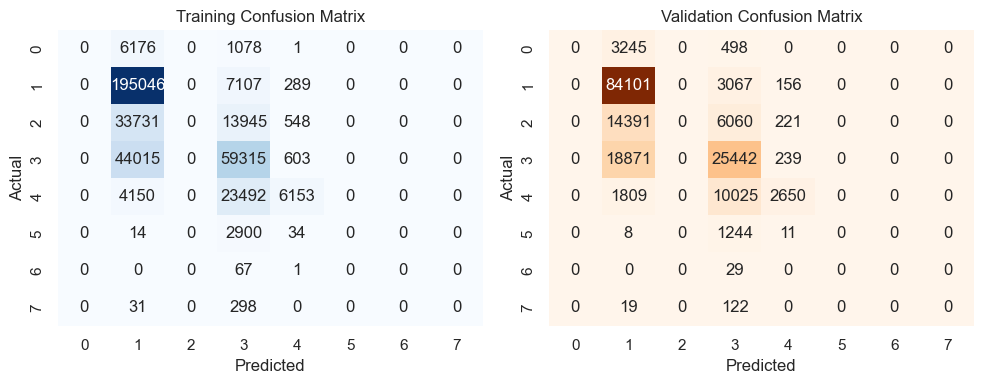

In [238]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, KFold

# Initialize the Random Forest model
rf_std = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Define K-Fold cross-validation
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation
cv_scores = cross_val_score(rf_std, final_features_X_train_scaled_std, y_train, cv=kf, scoring='accuracy')

# Print cross-validation results
print("Cross-validation scores:", cv_scores)
print("Mean cross-validation score:", cv_scores.mean())

# After cross-validation, fit the model on the full training data
rf_std.fit(final_features_X_train_scaled_std, y_train)

# Calculate metrics for training and validation sets
pred_train_rf_std = rf_std.predict(final_features_X_train_scaled_std)
pred_val_rf_std = rf_std.predict(final_features_X_val_scaled_std)
metrics(y_train, pred_train_rf_std, y_val, pred_val_rf_std)

# Predict on the test set with the trained model
y_test_pred_rf_std = rf_std.predict(final_features_df_test_scaled_std)

# Decode predictions if necessary
y_test_pred_best_decoded_rf_std = label_encoder.inverse_transform(y_test_pred_rf_std)

# Prepare the submission DataFrame
test_predictions_rf_std = pd.DataFrame({
    'Claim Identifier': X_test_final.index, 
    'Claim Injury Type': y_test_pred_best_decoded_rf_std  
})


___________________________________________________________________________________________________________
                                                     TRAIN                                                 
-----------------------------------------------------------------------------------------------------------
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7255
           1       0.69      0.96      0.80    202442
           2       0.00      0.00      0.00     48224
           3       0.55      0.57      0.56    103933
           4       0.81      0.18      0.30     33795
           5       0.00      0.00      0.00      2948
           6       0.00      0.00      0.00        68
           7       0.00      0.00      0.00       329

    accuracy                           0.65    398994
   macro avg       0.26      0.21      0.21    398994
weighted avg       0.56      0.65      0.58    398994

[[     0   6176      0   

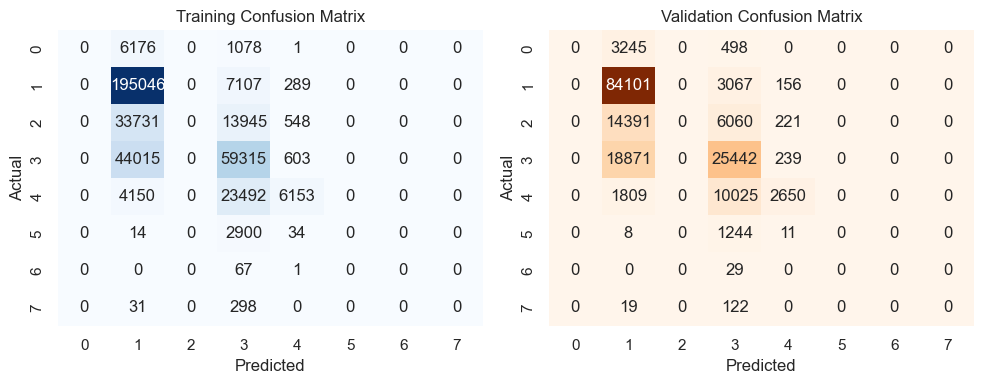

In [233]:
# Fit Random Forest model with final features and potential value features
#from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier
#rf_std = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)

# Fit Random Forest model with final features and calculate metrics for training and validation
#rf_std.fit(final_features_X_train_scaled_std, y_train)
#pred_train_rf_std= rf_std.predict(final_features_X_train_scaled_std)
#pred_val_rf_std = rf_std.predict(final_features_X_val_scaled_std)
#metrics(y_train, pred_train_rf_std, y_val, pred_val_rf_std)

In [234]:
# Predict on the test set with the best model
#y_test_pred_rf_std = rf_std.predict(final_features_df_test_scaled_std)

# Decode the predictions if necessary
#y_test_pred_best_decoded_rf_std= label_encoder.inverse_transform(y_test_pred_rf_std)

# Prepare the submission DataFrame
#test_predictions_rf_std = pd.DataFrame({
#    'Claim Identifier': X_test_final.index, 
#    'Claim Injury Type': y_test_pred_best_decoded_rf_std  
#})

In [235]:
# Save to CSV for Kaggle
test_predictions_rf_std.to_csv('kaggle_submission_predictions_rf_std.csv', index=False)

| Model Name | Scaler | Resampling Technique | F1 Score (Train)| F1 Score (Validation)| Kaggle Score |
|------------|-------------|----------------------|------------------|-----------------------|--------------|
| Random Forest  | Standard | None  |      0.22       |      0.22         |   0.21453     |

> ## XGBoost

In [236]:
# # Fit XGBoost model with final features and potential value features
# from xgboost import XGBClassifier

# # XGBoost Classifier
# xgb_std = XGBClassifier(n_estimators=100, max_depth=5, random_state=42, use_label_encoder=False, eval_metric='mlogloss')

# # Fit XGBoost model with final features and calculate metrics for training and validation
# xgb_std.fit(final_features_X_train_scaled_std, y_train)
# pred_train_xgb_std = xgb_std.predict(final_features_X_train_scaled_std)
# pred_val_xgb_std = xgb_std.predict(final_features_X_val_scaled_std)

# metrics(y_train, pred_train_xgb_std, y_val, pred_val_xgb_std)